<a id='top'></a>

# TransferRoom Data Task
##### Data analysis notebook to produce player recommendations for two example club ads for [TransferRoom](https://www.transferroom.com/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 04/01/2022<br>
Notebook last updated: 06/01/2022

![TransferRoom](../../../img/logos/transfer-room-logo.jpeg)

Click [here](#section8) to jump straight to the Recruitment Analysis section and skip the [Notebook Brief](#section2), [Data Sources](#section3), and [Data Engineering](#section4). Or skip straight to the [Summary](#section6).

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook is an case study of how to use data analysis to produce player recommendations for two example club ads for [TransferRoom](https://www.transferroom.com/). The findings are to be present in a presentation. The data is analysed using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames and [matplotlib](https://matplotlib.org/stable/index.html) for data visualisation.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/); and
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster).

The GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics), a static version of this notebook can be found [here](https://nbviewer.org/github/eddwebster/football_analytics/blob/master/notebooks/5_data_analysis_and_projects/transfer_room/TransferRoom%20Data%20Task.ipynb), and an accompanying slide deck can be found [here](https://docs.google.com/presentation/d/1P8Ae7Bcv3VxXEC-serbn3qCLuprZ0UDfhFxqWeO_3eo/edit?usp=sharing).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [About This Notebook](#section2)<br>
      1.    [Instructions](#section2.1)<br>
      2.    [Further Information of the Dataset](#section2.2)<br>
      3.    [Notebook Conventions](#section2.2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Import Excel File as pandas DataFrames](#section3.1)<br>
      2.    [Preliminary Data Handling](#section3.2)<br>
            1.    [Players DataFrame](#section3.3.1)<br>
            2.    [Transfer Paths DataFrame](#section3.3.2)<br>
4.    [Data Engineering](#section4)<br>
      1.    [Assign Raw DataFrame to a New DataFrame for Engineering](#section4.1)<br>
      2.    [Convert Euros to Local Currencies](#section4.2)<br>
            1.    [Convert Euros to Dollars](#section4.2.1)<br>
            2.    [Convert Euros to Pounds](#section4.2.2)<br>
      3.    [Derive New Metrics](#section4.3)<br>
            1.    [Create 'Per 90' Playing Metrics](#section4.3.1)<br>
            2.    [Create 'Monthly Loan Budget' Metric](#section4.3.2)<br>
            3.    ['Per Shot' Metrics](#section4.3.2)<br> 
5.    [Recruitment Analysis](#section5)<br>
      1.    [Ad 1: Barnsley](#section5.1)<br>
            1.    [Requirement Filtration](#section5.1.1)<br>
            2.    [Transfer Path Analysis](#section5.1.2)<br>
            3.    [Performance Metrics Selection](#section5.1.3)<br>
            4.    [Data Deep Dive of Shortlisted Players (3)](#section5.1.4)<br>
                  1.    [Brendan Galloway](#section5.1.4.1)<br>
                  2.    [Lucas Woudenberg](#section5.1.4.2)<br>
                  3.    [Sebastián Prieto](#section5.1.4.3)<br>
            5.    [Shortlisted Players](#section5.1.5)<br>
      2.    [Ad 2: D.C. United](#section5.2)<br>
            1.    [Requirement Filtration](#section5.2.1)<br>
            2.    [Transfer Path Analysis](#section5.2.2)<br>
            3.    [Performance Metrics Selection](#section5.2.3)<br>
            4.    [Data Deep Dive of Shortlisted Players (3)](#section5.2.4)<br>
                  1.    [Mimoun Mahi](#section5.2.4.1)<br>
                  2.    [Romell Quioto](#section5.2.4.2)<br>
                  3.    [Michael McKenna](#section5.2.4.3)<br>
            5.    [Shortlisted Players](#section5.2.5)<br>      
6.    [Export Final Dataset](#section6)<br>      
7.    [Summary](#section7)<br>
8.    [Next Steps](#section8)<br>
9.    [References](#section9)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno
import soccerplots
from soccerplots.radar_chart import Radar   # for custom radar visuals

# Progress Bar
from tqdm import tqdm

# Currency Conversion
from currency_converter import CurrencyConverter

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Print Statement
print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.20.3
pandas: 1.3.2
matplotlib: 3.4.2


### Define Filepaths

In [3]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_tr = os.path.join(base_dir, 'data', 'transferroom')
data_dir_export = os.path.join(base_dir, 'data', 'export')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')

### Defined Variables

In [4]:
# Defined Variables

## Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Custom Functions

In [5]:
# Define function determining the percentile rank of metrics of interest
def percentile_rank_metrics(df, lst_metrics):
    
    """
    Function to determine the percentile rank of selected metrics in a DataFrame
    """
    
    # Percentile Rank columns of interest

    ## For loop of columns available
    for col in df.columns:

        ### If column is in the list of metrics of interest
        if col in lst_metrics:

            #### Create 'percentile rank' column for metrics of interest
            df[col+'_pr'] = df[col].rank(pct=True)

    ## 
    lst_pr_cols = []

    ## For loop of columns available
    for col in df.columns:

        ###
        if '_pr' in col:

            ####
            lst_pr_cols.append(col)


    ##
    df['sum_pr'] = df[lst_pr_cols].sum(axis=1)

    ## Sort DataFrame
    df = df.sort_values(by=['sum_pr'], ascending=[False])

    ## Reset index
    df = df.reset_index(drop=True)

    ## 
    return df

In [6]:
## Define function for creating Percentile Rank DataFrame
def create_player_df(df, player_name):
    
    """
    Function to create a 12-metric percentile rank bar chart for 
    an individual player.
    """

    ## Filter dataset for player
    df = df[(df['ShortName'] == player_name)]

    return df

In [7]:
## Define function for creating Percentile Rank horizontal bar charts
def create_pr_bar_chart(df, player_name, player_colour, position, total_players):
    
    """
    Function to create a 12-metric percentile rank bar chart for 
    an individual player.
    """
    
    # Create list of Percentile Rank metrics

    ## Create empty list
    lst_pr_metrics = []

    ## For loop of columns available
    for col in df.columns:

        ### If column contains '_pr' for percentile rank, append to list
        if '_pr' in col:

            #### Append column to list of percentile rank columns
            lst_pr_metrics.append(col)

    ## Drop the 'sum' column      
    lst_pr_metrics.remove('sum_pr')

    ## Filter dataset for player
    df = df[(df['ShortName'] == player_name)]

    ## Select columns of interest
    df = df[lst_pr_metrics]

    # Reset index
    df = df.reset_index(drop=True)

    # Transpose DataFrame
    df = df.T

    # Reset index
    df = df.reset_index(drop=False)

    # Rename Columns
    df.columns = ['Metric', 'PR']

    # Replace values in the pandas DataFrame
    df['Metric'] = df['Metric'].str.replace('_', ' ').str.replace('pr', '')

    # Percentile Rank Bar Chart

    ## Define fonts and colours
    #title_font = 'Alegreya Sans'
    #main_font = 'Open Sans'
    background='#f7f7f7'    #'#313233'
    title_colour='black'
    text_colour='black'
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['xtick.color'] = text_colour
    mpl.rcParams['ytick.color'] = text_colour
    mpl.rcParams.update({'font.size': 18})

    # Define labels and metrics
    metric = df['Metric']
    pr = df['PR']

    ## Create figure 
    fig, ax = plt.subplots(figsize =(16, 16))
    fig.set_facecolor(background)
    ax.patch.set_facecolor(background)

    # Create Horizontal Bar Plot
    ax.barh(metric,
            pr,
            color=player_colour,
            alpha=0.75
           )

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=2)
    ax.yaxis.set_tick_params(pad=20)

    # Add X, Y gridlines
    ax.grid(b=True,
            color='grey',
            linestyle='-.',
            linewidth=0.5,
            alpha=0.2
           )

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.015, i.get_y()+0.4,
                 str(round((100* i.get_width()), 1)) + '%',
                 fontsize=18,
                 fontweight='regular',
                 color ='black'
                )

    # Add Plot Title
    fig.text(0.05,
             1,
             f'How Does {player_name} Compare Against Fellow {position}s?',
             fontsize=35,
             fontweight='bold',
            #fontfamily='DejaVu Sans', 
             color=text_colour
            )

    # Add Plot Subtitle
    fig.text(0.05,
             0.975,
             f'Percentile rank of metrics against all {position}s in the filtered dataset of {total_players} players.',
             fontsize=25,
             fontweight='regular',
            #fontfamily='DejaVu Sans',
             color=text_colour
            )

    # Verticle line
    ax.axvline(0.5,
               0,
               0.952,
               color='#FFD200',
               linestyle='--',
               linewidth=3
              )

    """
    # Add Text watermark
    fig.text(0.9,
             0.15,
             '@eddwebster',
             fontsize=12,
             color='grey',
             ha='right',
             va='bottom',
             alpha=0.7
            )
    """

    # Footnote
    plt.figtext(0.05,
                -0.075,
                f'Created by Edd Webster / @eddwebster. Data provided by TransferRoom. Metrics standardised per 90 minutes.\n',
                ha="left",
                fontsize=20
               )

    # Convert X axis to percentages
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

    ## Save figure
    plt.savefig(fig_dir + f'/{player_name}_pr.png', bbox_inches='tight', dpi=300)

    ## Show plt
    plt.tight_layout()
    plt.show()

In [8]:
# Define function for creating a two player radar
def create_2p_radar(df, lst_metrics, player_name, player_colour, player_average_name, player_average_colour='red'):
    
    """
    Function to create a two player radar, based on the soccerplots
    library, a Python package that can be used for making visualisations 
    for football analytics by Anmol Durgapal (@slothfulwave612).
    """   

    ## Add on name and season to the list of metrics
    lst_metrics.insert(0, 'ShortName')
    lst_metrics.insert(1, 'season')

    ## Select only the players we wish to compare
    lst_players = [player_name, player_average_name]


    ## Filter DataFrame to only have the two players of interest

    ### Player 1 
    df_radar_player_1 = df[(df['ShortName'] == player_name)]

    ### Mean Player

    ####
    df_radar_player_average = df.copy()

    #### Select columns of interest
    df_radar_player_average = df_radar_player_average[lst_metrics]

    #### 
    df_radar_player_average.loc['mean'] = df_radar_player_average.mean()

    ####
    df_radar_player_average = df_radar_player_average.iloc[-1:]

    #### Reset index
    df_radar_player_average = df_radar_player_average.reset_index(drop=True)

    #### Replace values in the pandas DataFrame
    df_radar_player_average['ShortName'] = df_radar_player_average['ShortName'].fillna('Average')
    df_radar_player_average['season'] = df_radar_player_average['season'].fillna('2021/2022')


    ### Union two DataFrames together
    df_radar = pd.concat([df_radar_player_1, df_radar_player_average])


    ## Select only columns of interest for radar
    df_radar = df_radar[lst_metrics]


    """
    ## Rename columns
    df_radar.columns=['ShortName',
                      'Season',
                      'Completed Passes',
                      'Progressive Passes',
                      'Pass Completion%',
                      'Pressured Passes',
                      'Carries',
                      'Progressive Carry Distance',
                      'Total Carry Distance',
                      'npxG',
                      'xA',
                      'Shot Creating Actions',
                      'Dribblers Tackled%',
                      'Aerial Win%'
                     ] 
    """

    ## Reset index
    df_radar = df_radar.reset_index(drop=True)

    ## Radar visualisation

    ### Get parameters
    params = list(df_radar.columns)
    params = params[2:]

    ### Add ranges to list of tuple pairs
    ranges = []
    a_values = []
    b_values = []

    ###
    for x in params:
        a = min(df_radar[params][x])
        a = a - (a*.25)

        b = max(df_radar[params][x])
        b = b + (b*.25)

        ranges.append((a, b))

    ###
    for x in range(len(df_radar['ShortName'])):
        if df_radar['ShortName'][x] == player_name:
            a_values = df_radar.iloc[x].values.tolist()
        if df_radar['ShortName'][x] == player_average_name:
            b_values = df_radar.iloc[x].values.tolist()

    ###
    a_values = a_values[2:]
    b_values = b_values[2:]

    ###
    values = [a_values, b_values]

    ###
    title = dict(title_name = player_name,
                 title_color = player_colour,
                #subtitle_name = player_name,
                #subtitle_color = player_colour,
                 title_name_2 = player_average_name,
                 title_color_2 = player_average_colour,
                #subtitle_name_2 = player_average_name,
                #subtitle_color_2 = player_average_colour,
                 title_fontsize = 18,
                 subtitle_fontsize=15
                )

    ### End note
    endnote = 'Created by Edd Webster / @eddwebster. Data provided by TransferRoom.'

    ### Define fonts and colours
    background='#f7f7f7'    #'#313233'
    mpl.rcParams.update(mpl.rcParamsDefault)

    ###
    radar = Radar()

    ### Create figure
    fig, ax = radar.plot_radar(ranges=ranges,
                               params=params,
                               values=values,
                               radar_color=[player_colour, player_average_colour],
                               alphas=[0.5, 0.5],
                               title=title,
                               endnote=endnote,
                               compare=True
                              )

    ### Change background colour
    fig.set_facecolor(background)

### Notebook Settings

In [9]:
# Display all columns of pandas DataFrames
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. About This Notebook</a>

<a id='section2.1'></a>

### <a id='#section2.1'>2.1. Instructions</a>
The emailed brief for this task is as follows:
>[TransferRoom](https://www.transferroom.com/) is football's number one market place.
>
>Clubs can create ads for the players they are looking for in the upcoming transfer window. 
>
>Ads allow clubs to share requirements in terms of position, age, fees and salary limits.
>
>What we want you to do is to find 3 players that are the best recommendations for the following 2 ads, which we would then automatically suggest on the platform
>
>It's important to think about what factors make a good recommendation for the buying club
>
>It's also important to consider and explain how your approach could be scaled to work practically for hundreds or even thousands of adverts. We cannot spend hours looking at a certain advert in granular detail.
>
>**Ad 1**<br>
>*    Team: Barnsley FC<br>
>*    Type: Loan<br>
>*    Position: Left Back<br>
>*    Monthly loan budget including gross salary: 500,000 GBP<br>
>*    Age: any<br>
>
>**Ad 2**<br>
>*    Team: D.C. United<br>
>*    Type: 	Buy <br>
>*    Position: Forward<br>
>*    Transfer Fee (Annual Gross Salary): 5,000,000 USD (salary 2,000,000 USD)<br>
>*    Age:		20-30<br>
>
>We then want you to create and give a 5-10 minute presentation explaining your approach and findings.
>Please email your completed presentation to jess@transferroom.com prior to your interview.

<a id='section2.2'></a>

### <a id='#section2.2'>2.2. Further Information of the Dataset</a>
>The players tab contains information on a selection of players - covering basic information, plus estimations of transfer fee and wages (where available),  and the percentage of possible minutes they've played recently.
>
>For every player you also have performance data on the most recent season in which they played more than 1000 minutes
>
>The transfer paths tab contains information on which leagues a league typical signs players from, as a percentage of their total transfers.
>
>For example, row 2 shows that 20% of transfers into Serie A are loan deals also from Serie A, and row 7 shows that 2.6% of transfers into Serie and permanent deals from the Premier League.

<a id='section2.3'></a>

### <a id='#section2.3'>2.3. Notebook Conventions</a>
*    Variables that refer a `DataFrame` object are prefixed with `df_`.
*    Variables that refer to a collection of `DataFrame` objects (e.g., a list, a set or a dict) are prefixed with `dfs_`.

---

<a id='section3'></a>

## <a id='#section3'>3. Data Sources</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Import Excel File as pandas DataFrames</a>
Using the [`read.excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) method

In [10]:
# Import Excel files as a pandas DataFrame
df_players_raw = pd.read_excel(os.path.join(data_dir_tr, 'original', 'TransferRoom Data Task.xlsx'), sheet_name='Players', header=1, index_col=0).reset_index()
df_transfers_raw = pd.read_excel(os.path.join(data_dir_tr, 'original', 'TransferRoom Data Task.xlsx'), sheet_name='transfer paths', header=0, index_col=0).reset_index()  

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Preliminary Data Handling</a>

<a id='section3.2.1'></a>

#### <a id='#section3.2.1'>3.2.1. Players DataFrame</a>
First check the quality of the dataset by looking first and last rows in pandas using the [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [11]:
# Display the first five rows of the raw DataFrame, df_players_raw
df_players_raw.head()

playerid          ShortName  age  nationality first_position  \
0      1686    Gonzalo Higuaín   34    Argentina        Forward   
1      1688    Cristián Zapata   35     Colombia    Centre Back   
2      1689         Pepe Reina   39        Spain     Goalkeeper   
3      1690               Suso   28        Spain         Winger   
4      1691  Ricardo Rodríguez   29  Switzerland      Left Back   

        second_position preferred_foot  expected_transfer_cost_euros  \
0                   NaN          right                       1400000   
1            Right Back          right                        300000   
2                   NaN          right                        200000   
3  Attacking Midfielder           left                      21000000   
4           Centre Back           left                       4800000   

   est_weekly_wages_euro                          parent_squad  \
0               150000.0                        Inter Miami CF   
1                50000.0  Club Atlético San Lorenzo de Almagro   
2                90000.0                              SS Lazio   
3                70000.0                            Sevilla FC   
4                70000.0                             Torino FC   

                          current_squad  recent_mins_played_percentage  \
0                        Inter Miami CF                       0.816476   
1  Club Atlético San Lorenzo de Almagro                       0.703433   
2                              SS Lazio                       0.732357   
3                            Sevilla FC                       0.328284   
4                             Torino FC                       0.677572   

      season  StartDate    EndDate competition        country  \
0       2021 2021-04-17 2021-12-11         MLS  United States   
1       2021 2021-02-12 2021-12-14   Superliga      Argentina   
2  2021/2022 2021-08-21 2022-05-22     Serie A          Italy   
3  2020/2021 2020-09-12 2021-06-01     La Liga          Spain   
4  2020/2021 2020-09-19 2021-06-01     Serie A          Italy   

   TotalMinutesOnField  TotalGoals  TotalAssists  TotalShots  totalheadshots  \
0                 2536          12             7          79               3   
1                 1501           1             1          11               9   
2                 1452           0             1           0               0   
3                 2217           3             4          43               0   
4                 1310           0             0          12               0   

   TotalDuels  TotalDuelsWon  TotalDefensiveDuels  TotalDefensiveDuelsWon  \
0         468            182                   89                      47   
1         265            171                  103                      73   
2           9              6                    4                       2   
3         297            135                   86                      30   
4         129             83                  101                      69   

   TotalAerialDuels  TotalAerialDuelsWon  TotalPasses  TotalSuccessfulPasses  \
0                35                   11          650                    511   
1                89                   59          641                    556   
2                 4                    3          375                    334   
3                32                    7         1184                    984   
4                35                   21          716                    624   

   TotalPassesToFinalThird  TotalSuccessfulPassesToFinalThird  TotalCrosses  \
0                      105                                 64            17   
1                       52                                 32             3   
2                       21                                 11             0   
3                      650                                493            74   
4                      172                                130            20   

   TotalSuccessfulCrosses  TotalDr

In [12]:
# Display the last five rows of the raw DataFrame, df_players_raw
df_players_raw.tail()

playerid         ShortName  age nationality      first_position  \
25322    557305     Sergio Castel   26       Spain             Forward   
25323    558160  Luifer Hernández   20   Venezuela  Central Midfielder   
25324    558164      Miguel Silva   21   Venezuela          Goalkeeper   
25325    558337     Yerson Chacón   18   Venezuela              Winger   
25326    558344      Emerson Ruíz   18   Venezuela         Centre Back   

      second_position preferred_foot  expected_transfer_cost_euros  \
25322             NaN          right                        950000   
25323             NaN           both                        350000   
25324             NaN          right                        150000   
25325             NaN          right                       1400000   
25326             NaN          right                        150000   

       est_weekly_wages_euro             parent_squad  \
25322                    NaN                 UD Ibiza   
25323                    NaN  Academia Puerto Cabello   
25324                    NaN  Academia Puerto Cabello   
25325                    NaN     Deportivo Táchira FC   
25326                    NaN    AC Mineros de Guayana   

                 current_squad  recent_mins_played_percentage     season  \
25322                 UD Ibiza                       0.508591  2021/2022   
25323  Academia Puerto Cabello                       0.522080       2021   
25324  Academia Puerto Cabello                       0.143775       2021   
25325     Deportivo Táchira FC                       0.593901       2021   
25326    AC Mineros de Guayana                       0.059672       2021   

       StartDate    EndDate       competition    country  TotalMinutesOnField  \
25322 2021-08-13 2022-05-29         La Liga 2      Spain                 1595   
25323 2021-04-11 2021-12-11  Primera División  Venezuela                 1719   
25324 2021-04-11 2021-12-11  Primera División  Venezuela                 1280   
25325 2021-04-11 2021-12-11  Primera División  Venezuela                 2359   
25326 2021-04-11 2021-12-11  Primera División  Venezuela                 1215   

       TotalGoals  TotalAssists  TotalShots  totalheadshots  TotalDuels  \
25322           4             1          40              12         504   
25323           6             1          51               6         417   
25324           0             0           0               0          21   
25325           8             7          61               7         505   
25326           0             0          13               0         234   

       TotalDuelsWon  TotalDefensiveDuels  TotalDefensiveDuelsWon  \
25322            189                   86                      52   
25323            155                   71                      41   
25324             18                    1                       0   
25325            206                  139                      77   
25326            110                  105                      59   

       TotalAerialDuels  TotalAerialDuelsWon  TotalPasses  \
25322                88                   31          247   
25323               108                   37          397   
25324                14                   14          222   
25325                35                   10          975   
25326                19                    8          412   

       TotalSuccessfulPasses  TotalPassesToFinalThird  \
25322                    180                       16   
25323                    304                       57   
25324                    179                       42   
25325                    802                      107   
25326                    348                       68   

       TotalSuccessfulPassesToFinalThird  TotalCrosses  \
25322                                 10            40   
25323                                 40            23   
25324                                 24             0   
25325                                 79      

The unique number of players in the dataset:

In [13]:
len(df_players_raw['ShortName'].unique().tolist())

24895

The number of players that can player Left Back in the dataset, where either their first or second position is 'Left Back':

In [14]:
# Filter the DataFrame
df_players_raw_lb = df_players_raw[(df_players_raw['first_position'] == 'Left Back') | (df_players_raw['second_position']  == 'Left Back')]

# Display the DataFrame
df_players_raw_lb.head(10)

playerid            ShortName  age  nationality first_position  \
4       1691    Ricardo Rodríguez   29  Switzerland      Left Back   
11      1702         Diego Laxalt   28      Uruguay      Left Back   
14      1706    Alessio Romagnoli   26        Italy    Centre Back   
15      1708      Davide Calabria   25        Italy     Right Back   
33      1749    Mattia De Sciglio   29        Italy     Right Back   
35      1753    Giorgio Chiellini   37        Italy    Centre Back   
39      1759          Alex Sandro   30       Brazil      Left Back   
44      1764  Leonardo Spinazzola   28        Italy      Left Back   
61      1792    Riccardo Gagliolo   31       Sweden    Centre Back   
62      1793     Federico Dimarco   24        Italy      Left Back   

         second_position preferred_foot  expected_transfer_cost_euros  \
4            Centre Back           left                       4800000   
11                Winger           left                       4200000   
14             Left Back           left                      12000000   
15             Left Back          right                      27000000   
33             Left Back          right                       3700000   
35             Left Back           left                        550000   
39                Winger           left                      14000000   
44            Right Back          right                      21000000   
61             Left Back           left                       1500000   
62  Attacking Midfielder           left                      13000000   

    est_weekly_wages_euro         parent_squad        current_squad  \
4                 70000.0            Torino FC            Torino FC   
11                80000.0        Dynamo Moscow        Dynamo Moscow   
14               150000.0             AC Milan             AC Milan   
15                90000.0             AC Milan             AC Milan   
33               150000.0          Juventus FC          Juventus FC   
35               150000.0          Juventus FC          Juventus FC   
39               250000.0          Juventus FC          Juventus FC   
44               150000.0              AS Roma              AS Roma   
61                20000.0  US Salernitana 1919  US Salernitana 1919   
62                10000.0          Inter Milan          Inter Milan   

    recent_mins_played_percentage     season  StartDate    EndDate  \
4                        0.677572  2020/2021 2020-09-19 2021-06-01   
11                       0.527395  2020/2021 2020-08-01 2021-06-01   
14                       0.663138  2020/2021 2020-09-19 2021-06-01   
15                       0.939181  2020/2021 2020-09-19 2021-06-01   
33                       0.234978  2020/2021 2020-08-21 2021-06-01   
35                       0.494251  2020/2021 2020-09-19 2021-06-01   
39                       0.706963  2021/2022 2021-08-21 2022-05-22   
44                       0.856332  2020/2021 2020-09-19 2021-06-01   
61                       0.666343  2020/2021 2020-09-19 2021-06-01   
62                       0.497428  2020/2021 2020-09-19 2021-06-01   

    competition   country  TotalMinutesOnField  TotalGoals  TotalAssists  \
4       Serie A     Italy                 1310           0             0   
11  Premiership  Scotland                 1293           1             0   
14      Serie A     Italy                 2033           1             1   
15      Serie A     Italy                 2807           2             1   
33      Ligue 1    France                 1571           0             1   
35      Serie A     Italy                 1471           0             1   
39      Serie A     Italy                 1045           0             0   
44      Serie A     Italy                 2244           2             4   
61      Serie A     Italy                 2076           2             2   
62      Serie A     Italy                 2670           5             3   

    TotalShots  totalheadshots  TotalDu

In [15]:
# Number of players that can play left back
len(df_players_raw_lb['ShortName'].unique().tolist())

3571

[`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [16]:
# Print the shape of the raw DataFrame, df_players_raw
print(df_players_raw.shape)

(25327, 42)


[`columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [17]:
# Features (column names) of the raw DataFrame, df_players_raw
df_players_raw.columns

Index(['playerid', 'ShortName', 'age', 'nationality', 'first_position',
       'second_position', 'preferred_foot', 'expected_transfer_cost_euros',
       'est_weekly_wages_euro', 'parent_squad', 'current_squad',
       'recent_mins_played_percentage', 'season', 'StartDate', 'EndDate',
       'competition', 'country', 'TotalMinutesOnField', 'TotalGoals',
       'TotalAssists', 'TotalShots', 'totalheadshots', 'TotalDuels',
       'TotalDuelsWon', 'TotalDefensiveDuels', 'TotalDefensiveDuelsWon',
       'TotalAerialDuels', 'TotalAerialDuelsWon', 'TotalPasses',
       'TotalSuccessfulPasses', 'TotalPassesToFinalThird',
       'TotalSuccessfulPassesToFinalThird', 'TotalCrosses',
       'TotalSuccessfulCrosses', 'TotalDribbles', 'TotalSuccessfulDribbles',
       'TotalInterceptions', 'TotalShotAssists', 'TotalRecoveries',
       'TotalOpponentHalfRecoveries', 'totalxG', 'totalxA'],
      dtype='object')

The [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [18]:
# Displays all columns and dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_players_raw.dtypes)

playerid                                      int64
ShortName                                    object
age                                           int64
nationality                                  object
first_position                               object
second_position                              object
preferred_foot                               object
expected_transfer_cost_euros                  int64
est_weekly_wages_euro                       float64
parent_squad                                 object
current_squad                                object
recent_mins_played_percentage               float64
season                                       object
StartDate                            datetime64[ns]
EndDate                              datetime64[ns]
competition                                  object
country                                      object
TotalMinutesOnField                           int64
TotalGoals                                    int64
TotalAssists

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [19]:
# Info for the raw DataFrame, df_players_raw
df_players_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25327 entries, 0 to 25326
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   playerid                           25327 non-null  int64         
 1   ShortName                          25327 non-null  object        
 2   age                                25327 non-null  int64         
 3   nationality                        25327 non-null  object        
 4   first_position                     25327 non-null  object        
 5   second_position                    16241 non-null  object        
 6   preferred_foot                     25327 non-null  object        
 7   expected_transfer_cost_euros       25327 non-null  int64         
 8   est_weekly_wages_euro              6378 non-null   float64       
 9   parent_squad                       25327 non-null  object        
 10  current_squad                     

The [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [20]:
# Description of the raw DataFrame, df_players_raw, showing some summary statistics for each numberical column in the DataFrame
df_players_raw.describe()

playerid           age  expected_transfer_cost_euros  \
count   25327.000000  25327.000000                  2.532700e+04   
mean   222551.735026     26.734394                  1.620147e+06   
std    160781.741690      4.433324                  5.833663e+06   
min      1686.000000     17.000000                  0.000000e+00   
25%     93849.000000     23.000000                  1.000000e+05   
50%    181774.000000     26.000000                  2.500000e+05   
75%    290375.500000     30.000000                  7.500000e+05   
max    558344.000000     44.000000                  1.400000e+08   

       est_weekly_wages_euro  recent_mins_played_percentage  \
count           6.378000e+03                   24967.000000   
mean            2.962684e+04                       0.578990   
std             5.556489e+04                       0.278263   
min             1.000000e+04                       0.000000   
25%             1.000000e+04                       0.375682   
50%             1.000000e+04                       0.621699   
75%             3.000000e+04                       0.807717   
max             1.400000e+06                       1.018543   

       TotalMinutesOnField    TotalGoals  TotalAssists    TotalShots  \
count         25327.000000  25327.000000  25327.000000  25327.000000   
mean           1667.847278      2.129506      1.307853     18.214633   
std             561.728027      3.047631      1.726304     17.217589   
min            1000.000000      0.000000      0.000000      0.000000   
25%            1235.000000      0.000000      0.000000      6.000000   
50%            1512.000000      1.000000      1.000000     13.000000   
75%            1962.000000      3.000000      2.000000     26.000000   
max            4679.000000     28.000000     17.000000    150.000000   

       totalheadshots    TotalDuels  TotalDuelsWon  TotalDefensiveDuels  \
count    25327.000000  25327.000000   25327.000000         25327.000000   
mean         1.897698    302.803569     149.303747           110.762151   
std          3.470513    158.928725      76.111574            69.559594   
min          0.000000      0.000000       0.000000             0.000000   
25%          0.000000    212.000000     106.000000            68.000000   
50%          0.000000    287.000000     142.000000           101.000000   
75%          2.000000    384.000000     189.000000           144.000000   
max         42.000000   1475.000000     749.000000           847.000000   

       TotalDefensiveDuelsWon  TotalAerialDuels  TotalAerialDuelsWon  \
count            25327.000000      25327.000000         25327.000000   
mean                64.611995         66.921625            32.856675   
std                 44.907981         56.141882            30.479427   
min                  0.000000          0.000000             0.000000   
25%                 35.000000         31.000000            12.000000   
50%                 58.000000         53.000000            24.000000   
75%                 85.000000         86.000000            43.000000   
max                621.000000        944.000000           439.000000   

        TotalPasses  TotalSuccessfulPasses  TotalPassesToFinalThird  \
count  25327.000000           25327.000000             25327.000000   
mean     660.019386             534.489991               135.431081   
std      350.825411             306.807831               123.966335   
min       86.000000              51.000000                 2.000000   
25%      413.000000             317.000000                55.000000   
50%      580.000000             462.000000                96.000000   
75%      824.000000             675.000000               173.000000   
max     2766.000000            2593.000000              1132.000000   

       TotalSuccessfulPassesToFinalThird  TotalCrosses  \
count                       25327.000000  25327.000000   
mean                           89.713073     22.362814   
std                            86.028039   

Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [`missingno`](https://pypi.org/project/missingno/) library (pip install missingno).

<AxesSubplot:>

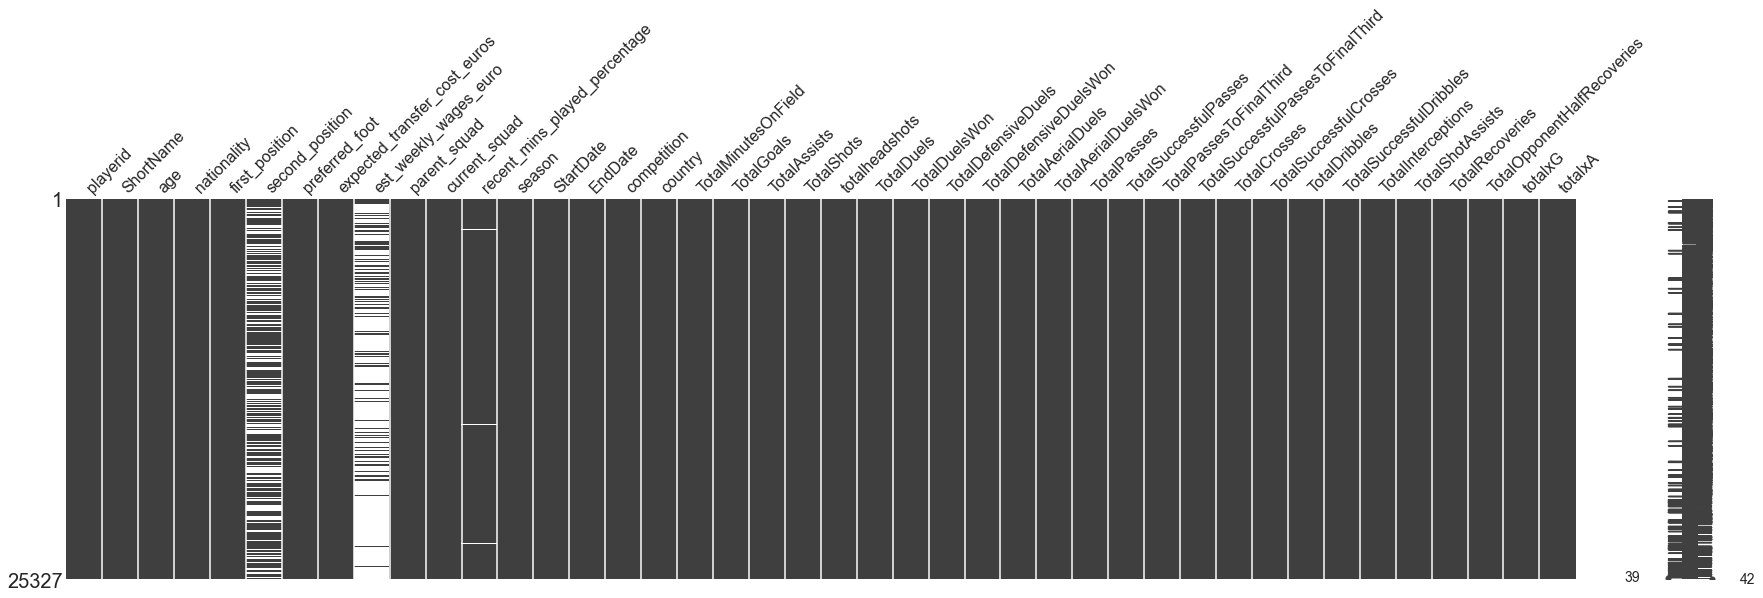

In [21]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_players_raw
msno.matrix(df_players_raw, figsize = (30, 7))

In [22]:
# Counts of missing values
null_value_stats = df_players_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

second_position                   9086
est_weekly_wages_euro            18949
recent_mins_played_percentage      360
dtype: int64

The visualisation shows us very quickly that there are missing values in the dataset for three columns: `second_position`,  `est_weekly_wages_euro`, and `recent_mins_played_percentage`. This columns may be treated in the Data Engineering stage, if required for the data challenge.

<a id='section3.2.2'></a>

#### <a id='#section3.2.2'>3.2.2. Transfer Paths DataFrame</a>

In [23]:
# Display the first five rows of the raw DataFrame, df_transfers_raw
df_transfers_raw.head()

from_country        from_competition  from_divisionlevel to_country  \
0        Italy                 Serie A                   1      Italy   
1        Italy                 Serie A                   1      Italy   
2        Italy  Campionato Primavera 1                   6      Italy   
3        Italy                 Serie C                   3      Italy   
4        Italy                 Serie B                   2      Italy   

  to_competition  to_division_level transfer_type  \
0        Serie A                  1          Loan   
1        Serie A                  1      Transfer   
2        Serie A                  1      Transfer   
3        Serie A                  1      Transfer   
4        Serie A                  1      Transfer   

   perc_of_to_comp_total_transfers  
0                         0.202738  
1                         0.188520  
2                         0.078989  
3                         0.068457  
4                         0.053712

In [24]:
# Display the last five rows of the raw DataFrame, df_transfers_raw
df_transfers_raw.tail()

from_country       from_competition  from_divisionlevel  \
18993  United States                    MLS                   1   
18994          Spain                La Liga                   1   
18995        Bolivia                   LFPB                   1   
18996        England  National League N / S                   6   
18997     Azerbaijan           Premyer Liqa                   1   

          to_country to_competition  to_division_level transfer_type  \
18993  United States           NISA                  0          Loan   
18994  United States           NISA                  0      Transfer   
18995  United States           NISA                  0          Loan   
18996  United States           NISA                  0      Transfer   
18997  United States           NISA                  0      Transfer   

       perc_of_to_comp_total_transfers  
18993                         0.025641  
18994                         0.025641  
18995                         0.025641  
18996                         0.025641  
18997                         0.025641

In [25]:
# Print the shape of the raw DataFrame, df_transfers_raw
print(df_transfers_raw.shape)

(18998, 8)


In [26]:
# Features (column names) of the raw DataFrame, df_transfers_raw
df_transfers_raw.columns

Index(['from_country', 'from_competition', 'from_divisionlevel', 'to_country',
       'to_competition', 'to_division_level', 'transfer_type',
       'perc_of_to_comp_total_transfers'],
      dtype='object')

In [27]:
# Displays all columns and dtypes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_transfers_raw.dtypes)

from_country                        object
from_competition                    object
from_divisionlevel                   int64
to_country                          object
to_competition                      object
to_division_level                    int64
transfer_type                       object
perc_of_to_comp_total_transfers    float64
dtype: object


In [28]:
# Info for the raw DataFrame, df_transfers_raw
df_transfers_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18998 entries, 0 to 18997
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   from_country                     18998 non-null  object 
 1   from_competition                 18998 non-null  object 
 2   from_divisionlevel               18998 non-null  int64  
 3   to_country                       18998 non-null  object 
 4   to_competition                   18998 non-null  object 
 5   to_division_level                18998 non-null  int64  
 6   transfer_type                    18998 non-null  object 
 7   perc_of_to_comp_total_transfers  18998 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


In [29]:
# Description of the raw DataFrame, df_transfers_raw, showing some summary statistics for each numberical column in the DataFrame
df_transfers_raw.describe()

from_divisionlevel  to_division_level  perc_of_to_comp_total_transfers
count        18998.000000       18998.000000                     18998.000000
mean             1.887093           1.847194                         0.022897
std              1.666751           1.448079                         0.081682
min              0.000000           0.000000                         0.000128
25%              1.000000           1.000000                         0.001143
50%              1.000000           1.000000                         0.002309
75%              2.000000           2.000000                         0.007353
max              9.000000           9.000000                         1.000000

<AxesSubplot:>

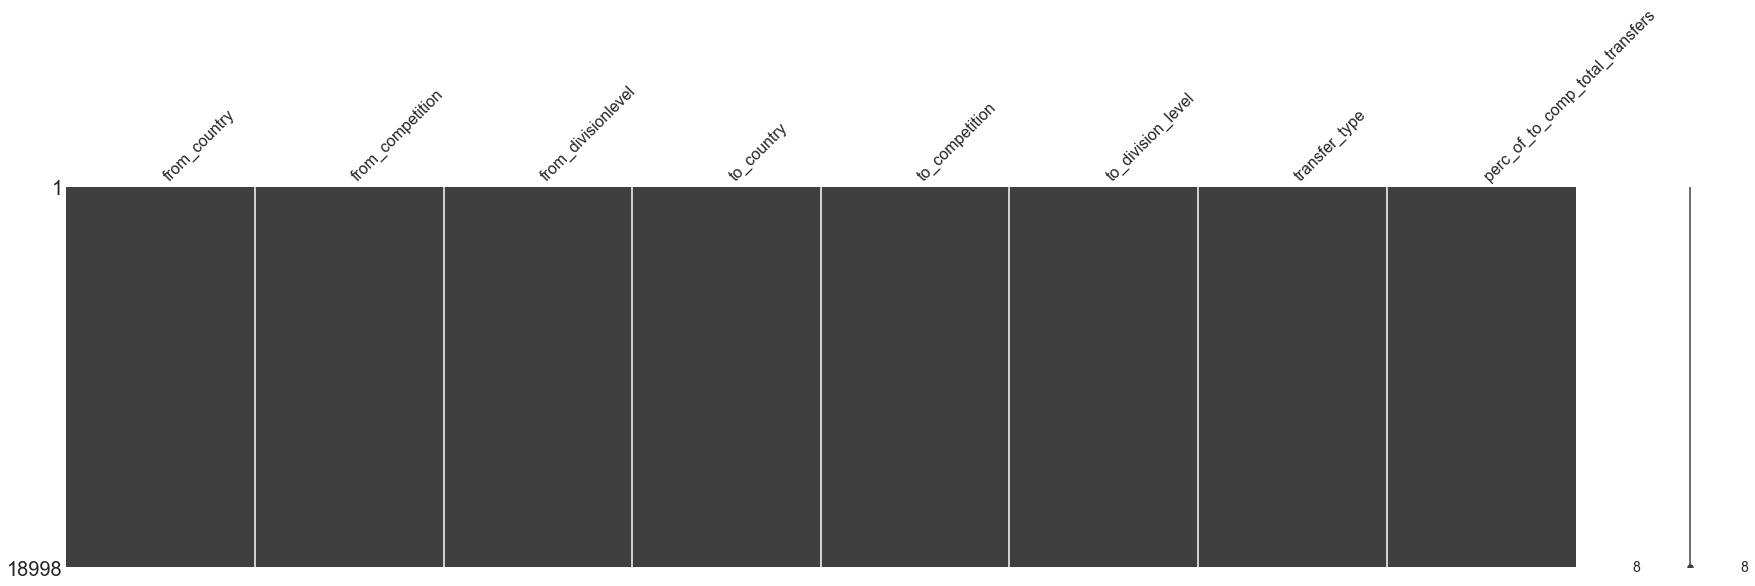

In [30]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_transfers_raw
msno.matrix(df_transfers_raw, figsize = (30, 7))

In [31]:
# Counts of missing values
null_value_stats = df_transfers_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

---

<a id='section4'></a>

## <a id='#section4'>4. Data Engineering</a>
Data Analysis, the first step is to clean and wrangle the dataset to a form that meet our needs.

<a id='section4.1'></a>

### <a id='#section4.1'>4.1. Assign Raw DataFrame to a New DataFrame for Engineering</a>

In [32]:
# Assign raw DataFrames to a new DataFrames for engineering
df_players = df_players_raw
df_transfers = df_transfers_raw

<a id='section4.2'></a>

### <a id='#section4.2'>4.2. Convert Euros to Local Currencies</a>

In [33]:
# Create he currency converter object:
c = CurrencyConverter()

<a id='section4.2.1'></a>

#### <a id='#section4.2.1'>4.2.1. Convert Euros to Dollars</a>

In [34]:
# Define conversion rate - USD to EUR
rate_conversion_usd_eur = c.convert(1, 'USD', 'EUR')

# Print conversion rate
print(rate_conversion_usd_eur)

0.8582217645039478


In [35]:
# Convert Euros to Dollars
df_players['expected_transfer_cost_usd'] = df_players['expected_transfer_cost_euros'] * rate_conversion_usd_eur
df_players['est_weekly_wages_usd'] = df_players['est_weekly_wages_euro'] * rate_conversion_usd_eur

In [36]:
# Round figures
df_players['expected_transfer_cost_usd'] = df_players['expected_transfer_cost_usd'].round()
df_players['est_weekly_wages_usd'] = df_players['est_weekly_wages_usd'].round()

<a id='section4.2.2'></a>

#### <a id='#section4.2.2'>4.2.2. Convert Euros to Pounds</a>

In [37]:
# Define conversion rate - USD to GBP
rate_conversion_usd_gbp = c.convert(1, 'USD', 'GBP')

# Print conversion rate
print(rate_conversion_usd_gbp)

0.7728544455887402


In [38]:
# Convert Euros to Pounds
df_players['expected_transfer_cost_gbp'] = df_players['expected_transfer_cost_euros'] * rate_conversion_usd_gbp
df_players['est_weekly_wages_gbp'] = df_players['est_weekly_wages_euro'] * rate_conversion_usd_gbp

In [39]:
# Round figures
df_players['expected_transfer_cost_gbp'] = df_players['expected_transfer_cost_gbp'].round()
df_players['est_weekly_wages_gbp'] = df_players['est_weekly_wages_gbp'].round()

<a id='section4.3'></a>

### <a id='#section4.3'>4.3. Derive New Metrics</a>

<a id='section4.3.1'></a>

#### <a id='#section4.3.1'>4.3.1. Create 'Per 90' Playing Metrics</a>
Standardise the playing metrics. Ideally for defensive metrics, a possession adjsutment (PAdj) would be applied. However, this is not available in the dataset provided

In [40]:
# Display columns available in the DataFrame
df_players.columns

Index(['playerid', 'ShortName', 'age', 'nationality', 'first_position',
       'second_position', 'preferred_foot', 'expected_transfer_cost_euros',
       'est_weekly_wages_euro', 'parent_squad', 'current_squad',
       'recent_mins_played_percentage', 'season', 'StartDate', 'EndDate',
       'competition', 'country', 'TotalMinutesOnField', 'TotalGoals',
       'TotalAssists', 'TotalShots', 'totalheadshots', 'TotalDuels',
       'TotalDuelsWon', 'TotalDefensiveDuels', 'TotalDefensiveDuelsWon',
       'TotalAerialDuels', 'TotalAerialDuelsWon', 'TotalPasses',
       'TotalSuccessfulPasses', 'TotalPassesToFinalThird',
       'TotalSuccessfulPassesToFinalThird', 'TotalCrosses',
       'TotalSuccessfulCrosses', 'TotalDribbles', 'TotalSuccessfulDribbles',
       'TotalInterceptions', 'TotalShotAssists', 'TotalRecoveries',
       'TotalOpponentHalfRecoveries', 'totalxG', 'totalxA',
       'expected_transfer_cost_usd', 'est_weekly_wages_usd',
       'expected_transfer_cost_gbp', 'est_weekly_wa

Select the features in the DataFrame that are playing metrics:

In [41]:
# Select playing metrics
lst_metrics = ['TotalGoals',
               'TotalAssists',
               'TotalShots',
               'totalheadshots',
               'TotalDuels',
               'TotalDuelsWon',
               'TotalDefensiveDuels',
               'TotalDefensiveDuelsWon',
               'TotalAerialDuels',
               'TotalAerialDuelsWon',
               'TotalPasses',
               'TotalSuccessfulPasses',
               'TotalPassesToFinalThird',
               'TotalSuccessfulPassesToFinalThird',
               'TotalCrosses',
               'TotalSuccessfulCrosses',
               'TotalDribbles',
               'TotalSuccessfulDribbles',
               'TotalInterceptions',
               'TotalShotAssists',
               'TotalRecoveries',
               'TotalOpponentHalfRecoveries',
               'totalxG',
               'totalxA'
              ]

In [42]:
# For loop of columns available
for col in df_players.columns:
    
    ## If column is in the list of metrics
    if col in lst_metrics:
        
        ### Create 'p90' column by dividing the total of the metric by per 90 minutes placed (total minutes divided by 90)
        df_players[col+'_p90'] = (df_players[col] / (df_players['TotalMinutesOnField'] / 90)).round(3)

<a id='section4.3.2'></a>

#### <a id='#section4.3.2'>4.3.2. Create 'Monthly Loan Budget' Metric</a>

In [43]:
df_players['expected_transfer_cost_gbp_pm'] = df_players['expected_transfer_cost_gbp']
df_players['est_weekly_wages_gbp_pm'] = df_players['est_weekly_wages_gbp']

df_players['expected_transfer_cost_gbp_pm'] = df_players['expected_transfer_cost_gbp_pm'].fillna(0)
df_players['est_weekly_wages_gbp_pm'] = df_players['est_weekly_wages_gbp_pm'].fillna(0)

df_players['expected_transfer_cost_gbp_pm'] = df_players['expected_transfer_cost_gbp_pm'] / 12
df_players['est_weekly_wages_gbp_pm'] = (df_players['est_weekly_wages_gbp_pm'] * 52) / 12

df_players['monthly_loan_budget_gbp'] = df_players['expected_transfer_cost_gbp_pm'] + df_players['est_weekly_wages_gbp_pm']

<a id='section4.3.3'></a>

#### <a id='#section4.3.3'>4.3.3. 'Per Shot' Metrics</a>

In [44]:
df_players['xG/Shot'] = df_players['totalxG'] / df_players['TotalShots']

---

<a id='section5'></a>

## <a id='#section5'>5. Recruitment Analysis</a>

The following section is split into two subsections for each ad - (1) Barnsley F.C. and (2) D.C. United.

Each subsection is then broken down into the following points:
*    **Requirement Filtration** - as per position, transfer type, age, transfer fee, salary, and playing time requirements
*    **Transfer Path Analysis** - trends and historical analysis of the leagues in which incoming players tend to come from
*    **Performance Metrics Selection** - selection of metric suitable to measure the performance of the filtered players, bespoke to each position
*    **Data Deep Dive of Shortlisted Players (3)** - analysis of the best-performing players remaining, in terms of data points

<a id='section5.1'></a>

### <a id='#section5.1'>5.1. Ad 1: Barnsley</a>
Look for a player that meets the following requirements:

*    **Team:** Barnsley FC<br>
*    **Type:** Loan<br>
*    **Position:** Left Back<br>
*    **Monthly loan budget including gross salary:** 500,000 GBP<br>
*    **Age:** any<br>

<a id='section5.1.1'></a>

#### <a id='#section5.1.1'>5.1.1. Requirement Filtration</a>
Players that are left backs, available for loan and have a monthly loan budget including gross salary of 500,000 GBP. No age requirements.

In [45]:
# Define position
position = 'Left Back'

# Filter the DataFrame
df_players_lb = df_players[(df_players['first_position'] == position) | (df_players['second_position']  == position)]

# Display the DataFrame
df_players_lb.head(10)

playerid            ShortName  age  nationality first_position  \
4       1691    Ricardo Rodríguez   29  Switzerland      Left Back   
11      1702         Diego Laxalt   28      Uruguay      Left Back   
14      1706    Alessio Romagnoli   26        Italy    Centre Back   
15      1708      Davide Calabria   25        Italy     Right Back   
33      1749    Mattia De Sciglio   29        Italy     Right Back   
35      1753    Giorgio Chiellini   37        Italy    Centre Back   
39      1759          Alex Sandro   30       Brazil      Left Back   
44      1764  Leonardo Spinazzola   28        Italy      Left Back   
61      1792    Riccardo Gagliolo   31       Sweden    Centre Back   
62      1793     Federico Dimarco   24        Italy      Left Back   

         second_position preferred_foot  expected_transfer_cost_euros  \
4            Centre Back           left                       4800000   
11                Winger           left                       4200000   
14             Left Back           left                      12000000   
15             Left Back          right                      27000000   
33             Left Back          right                       3700000   
35             Left Back           left                        550000   
39                Winger           left                      14000000   
44            Right Back          right                      21000000   
61             Left Back           left                       1500000   
62  Attacking Midfielder           left                      13000000   

    est_weekly_wages_euro         parent_squad        current_squad  \
4                 70000.0            Torino FC            Torino FC   
11                80000.0        Dynamo Moscow        Dynamo Moscow   
14               150000.0             AC Milan             AC Milan   
15                90000.0             AC Milan             AC Milan   
33               150000.0          Juventus FC          Juventus FC   
35               150000.0          Juventus FC          Juventus FC   
39               250000.0          Juventus FC          Juventus FC   
44               150000.0              AS Roma              AS Roma   
61                20000.0  US Salernitana 1919  US Salernitana 1919   
62                10000.0          Inter Milan          Inter Milan   

    recent_mins_played_percentage     season  StartDate    EndDate  \
4                        0.677572  2020/2021 2020-09-19 2021-06-01   
11                       0.527395  2020/2021 2020-08-01 2021-06-01   
14                       0.663138  2020/2021 2020-09-19 2021-06-01   
15                       0.939181  2020/2021 2020-09-19 2021-06-01   
33                       0.234978  2020/2021 2020-08-21 2021-06-01   
35                       0.494251  2020/2021 2020-09-19 2021-06-01   
39                       0.706963  2021/2022 2021-08-21 2022-05-22   
44                       0.856332  2020/2021 2020-09-19 2021-06-01   
61                       0.666343  2020/2021 2020-09-19 2021-06-01   
62                       0.497428  2020/2021 2020-09-19 2021-06-01   

    competition   country  TotalMinutesOnField  TotalGoals  TotalAssists  \
4       Serie A     Italy                 1310           0             0   
11  Premiership  Scotland                 1293           1             0   
14      Serie A     Italy                 2033           1             1   
15      Serie A     Italy                 2807           2             1   
33      Ligue 1    France                 1571           0             1   
35      Serie A     Italy                 1471           0             1   
39      Serie A     Italy                 1045           0             0   
44      Serie A     Italy                 2244           2             4   
61      Serie A     Italy                 2076           2             2   
62      Serie A     Italy                 2670           5             3   

    TotalShots  totalheadshots  TotalDu

The number of players that can play as a Left Back in the dataset, where either their first or second position is 'Left Back':

In [46]:
len(df_players_lb)

3581

Next filter for transfer fee and salary restrictions:

In [47]:
# Filter the DataFrame
df_players_lb_budget = df_players[ ((df_players['first_position'] == position) | (df_players['second_position']  == position)) &
                                    ((df_players['expected_transfer_cost_gbp'] == 0) | (df_players['expected_transfer_cost_gbp'].isnull())) &
                                  ((((df_players['est_weekly_wages_gbp'] * 52) / 12) <= 500_000)) #| (df_players['est_weekly_wages_gbp'].isnull()))
                                 ]

# Display the DataFrame
df_players_lb_budget.head(10)

playerid         ShortName  age  nationality first_position  \
375       2729  Yusuke Maruhashi   31        Japan      Left Back   
446       4112     Dave Bulthuis   31  Netherlands    Centre Back   
1114     18308    Diego Palacios   22      Ecuador      Left Back   
1151     19116            Egídio   35       Brazil      Left Back   
1863     34572  Antonio Rukavina   37       Serbia     Right Back   
2296     43505        Reo Hatate   24        Japan      Left Back   
2474     47520   Rodrigo Moreira   25    Argentina    Centre Back   
2840     55876      Gotoku Sakai   30        Japan      Left Back   
2924     56016  Thomas Vermaelen   36      Belgium    Centre Back   
3267     56487  Brendan Galloway   25     Zimbabwe      Left Back   

           second_position preferred_foot  expected_transfer_cost_euros  \
375   Attacking Midfielder           left                             0   
446              Left Back           left                             0   
1114                Winger           left                             0   
1151  Attacking Midfielder           left                             0   
1863             Left Back          right                             0   
2296                Winger          right                             0   
2474             Left Back          right                             0   
2840  Attacking Midfielder          right                             0   
2924             Left Back           left                             0   
3267           Centre Back           left                             0   

      est_weekly_wages_euro              parent_squad  \
375                 10000.0              Cerezo Osaka   
446                 10000.0             Ulsan Hyundai   
1114                10000.0            Los Angeles FC   
1151                10000.0  Fluminense Football Club   
1863                20000.0                 FC Astana   
2296                10000.0         Kawasaki Frontale   
2474                10000.0     Quilmes Atlético Club   
2840                10000.0               Vissel Kobe   
2924                10000.0               Vissel Kobe   
3267                10000.0           Plymouth Argyle   

                 current_squad  recent_mins_played_percentage     season  \
375               Cerezo Osaka                       0.739218       2021   
446              Ulsan Hyundai                       0.654131       2021   
1114            Los Angeles FC                       0.641941       2021   
1151  Fluminense Football Club                       0.000000       2021   
1863                 FC Astana                       0.702785       2021   
2296         Kawasaki Frontale                       0.777585       2021   
2474     Quilmes Atlético Club                       0.325107       2021   
2840               Vissel Kobe                       0.996800       2021   
2924               Vissel Kobe                       0.868559       2021   
3267           Plymouth Argyle                       0.384883  2021/2022   

      StartDate    EndDate      competition         country  \
375  2021-02-26 2021-12-04        J1 League           Japan   
446  2021-02-27 2021-12-05       K League 1  Korea Republic   
1114 2021-04-17 2021-12-11              MLS   United States   
1151 2021-05-30 2021-12-10          Serie A          Brazil   
1863 2021-03-13 2021-10-30   Premier League      Kazakhstan   
2296 2021-02-26 2021-12-04        J1 League           Japan   
2474 2021-03-12 2021-12-14  Prim B Nacional       Argentina   
2840 2021-02-26 2021-12-04        J1 League           Japan   
2924 2021-02-26 2021-12-04        J1 League           Japan   
3267 2021-08-07 2022-04-30       League One         England   

      TotalMinutesOnField  TotalGoals  TotalAssists  TotalShots  \
375                  3089           1             6          16   
446                  2754           3             0          20   
1114                 1815           0             2         

The number of players in the dataset that can play as a Left Back, that are available for a free transfer and have an estimated monthly loan budget including gross salary of 500,000 GBP.

In [48]:
len(df_players_lb_budget)

59

Finally, the players are filtered for those that are able to play a considerable number of minutes i.e. >= 60% of available minutes per season.

In [49]:
# Filter for players that have a sizeable number of the minutes available to them.

## Define minimum % minutes played
min_mins_perc = 0.6

## Filter the DataFrame
df_players_lb_budget_mins = df_players[   ((df_players['first_position'] == position) | (df_players['second_position']  == position)) &
                                          ((df_players['expected_transfer_cost_gbp'] == 0) | (df_players['expected_transfer_cost_gbp'].isnull())) &
                                       ((((df_players['est_weekly_wages_gbp'] * 52) / 12) <= 500_000)) & #| (df_players['est_weekly_wages_gbp'].isnull()))
                                          (df_players['recent_mins_played_percentage'] >= min_mins_perc)
                                      ]

## Display the DataFrame
df_players_lb_budget_mins.head(10)

playerid         ShortName  age  nationality first_position  \
375       2729  Yusuke Maruhashi   31        Japan      Left Back   
446       4112     Dave Bulthuis   31  Netherlands    Centre Back   
1114     18308    Diego Palacios   22      Ecuador      Left Back   
1863     34572  Antonio Rukavina   37       Serbia     Right Back   
2296     43505        Reo Hatate   24        Japan      Left Back   
2840     55876      Gotoku Sakai   30        Japan      Left Back   
2924     56016  Thomas Vermaelen   36      Belgium    Centre Back   
3308     56546   Christian Fuchs   35      Austria      Left Back   
3663     60502      Marcos López   22         Peru      Left Back   
5018     77051   Zarko Tomasevic   31   Montenegro    Centre Back   

           second_position preferred_foot  expected_transfer_cost_euros  \
375   Attacking Midfielder           left                             0   
446              Left Back           left                             0   
1114                Winger           left                             0   
1863             Left Back          right                             0   
2296                Winger          right                             0   
2840  Attacking Midfielder          right                             0   
2924             Left Back           left                             0   
3308  Attacking Midfielder           left                             0   
3663  Attacking Midfielder           left                             0   
5018             Left Back           left                             0   

      est_weekly_wages_euro            parent_squad           current_squad  \
375                 10000.0            Cerezo Osaka            Cerezo Osaka   
446                 10000.0           Ulsan Hyundai           Ulsan Hyundai   
1114                10000.0          Los Angeles FC          Los Angeles FC   
1863                20000.0               FC Astana               FC Astana   
2296                10000.0       Kawasaki Frontale       Kawasaki Frontale   
2840                10000.0             Vissel Kobe             Vissel Kobe   
2924                10000.0             Vissel Kobe             Vissel Kobe   
3308                60000.0  Charlotte Independence  Charlotte Independence   
3663                10000.0    San Jose Earthquakes    San Jose Earthquakes   
5018                20000.0               FC Astana               FC Astana   

      recent_mins_played_percentage season  StartDate    EndDate  \
375                        0.739218   2021 2021-02-26 2021-12-04   
446                        0.654131   2021 2021-02-27 2021-12-05   
1114                       0.641941   2021 2021-04-17 2021-12-11   
1863                       0.702785   2021 2021-03-13 2021-10-30   
2296                       0.777585   2021 2021-02-26 2021-12-04   
2840                       0.996800   2021 2021-02-26 2021-12-04   
2924                       0.868559   2021 2021-02-26 2021-12-04   
3308                       0.870400   2021 2021-04-24 2021-11-29   
3663                       0.668551   2021 2021-04-17 2021-12-11   
5018                       0.770895   2021 2021-03-13 2021-10-30   

           competition         country  TotalMinutesOnField  TotalGoals  \
375          J1 League           Japan                 3089           1   
446         K League 1  Korea Republic                 2754           3   
1114               MLS   United States                 1815           0   
1863    Premier League      Kazakhstan                 2171           0   
2296         J1 League           Japan                 2668           5   
2840         J1 League           Japan                 3728           1   
2924         J1 League           Japan                 2178           1   
3308  USL Championship   United States                 1622           2   
3663               MLS   United States                 1525           1   
5018    Premier League      Kazakhstan             

The number of players in the dataset that can play as a Left Back, that are available for a free transfer, have an estimated monthly loan budget including gross salary of 500,000 GBP, and played at least 60% of available minutes:

In [50]:
len(df_players_lb_budget_mins)

34

Next, the shortlist will be further filtered for players from suitable leagues through the Transfer Path dataset.

<a id='section5.1.2'></a>

#### <a id='#section5.1.2'>5.1.2. Transfer Path Analysis</a>

In [51]:
# Filter the DataFrame
df_transfers_championship = df_transfers[(df_transfers['to_country'] == 'England') & (df_transfers['to_competition'] == 'Championship')]

# Sort DataFrame
df_transfers_championship = df_transfers_championship.sort_values(by=['perc_of_to_comp_total_transfers'], ascending=[False])

# Display the DataFrame
df_transfers_championship.head(20)

from_country                     from_competition  from_divisionlevel  \
5355      England                         Championship                   2   
5356      England                       Premier League                   1   
5357      England                           League One                   3   
5358      England                       Premier League                   1   
5359      England                         Championship                   2   
5360      England        Premier League 2 Division One                   9   
5361      England        Premier League 2 Division One                   9   
5362      England                           League Two                   4   
5363      England      Professional Development League                   9   
5364     Scotland                          Premiership                   1   
5365      England                      National League                   5   
5367      England  U18 Professional Development League                   0   
5366      England                           League One                   3   
5368      England                       Youth Alliance                   0   
5369      England                   U18 Premier League                   8   
5370       France                              Ligue 1                   1   
5371  Netherlands                           Eredivisie                   1   
5372     Portugal                        Primeira Liga                   1   
5373       France                              Ligue 1                   1   
5374      Belgium                     First Division A                   1   

     to_country to_competition  to_division_level transfer_type  \
5355    England   Championship                  2      Transfer   
5356    England   Championship                  2          Loan   
5357    England   Championship                  2      Transfer   
5358    England   Championship                  2      Transfer   
5359    England   Championship                  2          Loan   
5360    England   Championship                  2      Transfer   
5361    England   Championship                  2          Loan   
5362    England   Championship                  2      Transfer   
5363    England   Championship                  2      Transfer   
5364    England   Championship                  2      Transfer   
5365    England   Championship                  2      Transfer   
5367    England   Championship                  2      Transfer   
5366    England   Championship                  2          Loan   
5368    England   Championship                  2      Transfer   
5369    England   Championship                  2      Transfer   
5370    England   Championship                  2      Transfer   
5371    England   Championship                  2      Transfer   
5372    England   Championship                  2          Loan   
5373    England   Championship                  2          Loan   
5374    England   Championship                  2      Transfer   

      perc_of_to_comp_total_transfers  
5355                         0.151292  
5356                         0.120717  
5357                         0.095414  
5358                         0.089088  
5359                         0.074328  
5360                         0.070638  
5361                         0.060095  
5362                         0.043226  
5363                         0.026885  
5364                         0.017923  
5365                         0.017396  
5367                         0.015287  
5366                         0.015287  
5368                         0.011070  
5369                         0.010543  
5370                         0.009489  
5371                         0.008962  
5372                         0.007380  
5373                         0.006853  
5374                         0.006853

Number of leagues from which players have transferred to the Championship:

In [52]:
len(df_transfers_championship)

98

There are 175 combinations of countries and competitions from which players have transferred to the MLS, the majority (32.2%) being from the MLS itself and the next biggest being the USL Championship (9.8%). 3rd is the Argentina Superliga (3.0%), followed by Liga MX in Mexico (2.6%).

The next stage will filter the DataFrame for only the top 10% of leagues. These leagues will then be used to further filter the players DataFrame.

In [53]:
# Create a DataFrame of the top 10% of MLS Transfers

## Define n %
n = 20

## Copy Transfer MLS DataFrame
df_transfers_championship_top_percentile = df_transfers_championship.copy()

## Filter the DataFrame
df_transfers_championship_top_percentile = df_transfers_championship_top_percentile[((df_transfers_championship_top_percentile['to_country'] == 'England') & (df_transfers_championship_top_percentile['to_competition'] == 'Championship'))]

## Sort DataFrame
df_transfers_championship_top_percentile = df_transfers_championship_top_percentile.sort_values(by=['perc_of_to_comp_total_transfers'], ascending=[False])

## Create 'percentile rank' column of 'perc_of_to_comp_total_transfers' 
df_transfers_championship_top_percentile = df_transfers_championship_top_percentile.head(int((len(df_transfers_championship_top_percentile)*(n/100))))

## Reset index
df_transfers_championship_top_percentile = df_transfers_championship_top_percentile.reset_index(drop=True)

## Display the DataFrame
df_transfers_championship_top_percentile.head(10)

from_country                 from_competition  from_divisionlevel  \
0      England                     Championship                   2   
1      England                   Premier League                   1   
2      England                       League One                   3   
3      England                   Premier League                   1   
4      England                     Championship                   2   
5      England    Premier League 2 Division One                   9   
6      England    Premier League 2 Division One                   9   
7      England                       League Two                   4   
8      England  Professional Development League                   9   
9     Scotland                      Premiership                   1   

  to_country to_competition  to_division_level transfer_type  \
0    England   Championship                  2      Transfer   
1    England   Championship                  2          Loan   
2    England   Championship                  2      Transfer   
3    England   Championship                  2      Transfer   
4    England   Championship                  2          Loan   
5    England   Championship                  2      Transfer   
6    England   Championship                  2          Loan   
7    England   Championship                  2      Transfer   
8    England   Championship                  2      Transfer   
9    England   Championship                  2      Transfer   

   perc_of_to_comp_total_transfers  
0                         0.151292  
1                         0.120717  
2                         0.095414  
3                         0.089088  
4                         0.074328  
5                         0.070638  
6                         0.060095  
7                         0.043226  
8                         0.026885  
9                         0.017923

In [54]:
len(df_transfers_championship_top_percentile)

19

In [55]:
df_transfers_championship_top_percentile.to_csv('championship_tps.csv')

In [56]:
# Create lists from the country and competition columns of the Transfer Paths DataFrame, to filter Players DataFrame
lst_from_country_championship = df_transfers_championship_top_percentile['from_country'].tolist()
lst_from_competition_championship = df_transfers_championship_top_percentile['from_competition'].tolist()

We can see that most players transferred to the Championship are from English divisions, whether professional or development leagues.

In [57]:
# Filter the DataFrame
df_players_lb_budget_tp = df_players_lb_budget[df_players_lb_budget['country'].isin(lst_from_country_championship)]
df_players_lb_budget_tp = df_players_lb_budget_tp[df_players_lb_budget_tp['competition'].isin(lst_from_competition_championship)]

# Display the DataFrame
df_players_lb_budget_tp.head(10)

playerid         ShortName  age  nationality first_position  \
3267      56487  Brendan Galloway   25     Zimbabwe      Left Back   
16225    243174  Lucas Woudenberg   27  Netherlands      Left Back   

      second_position preferred_foot  expected_transfer_cost_euros  \
3267      Centre Back           left                             0   
16225             NaN           left                             0   

       est_weekly_wages_euro     parent_squad    current_squad  \
3267                 10000.0  Plymouth Argyle  Plymouth Argyle   
16225                10000.0    SC Heerenveen    SC Heerenveen   

       recent_mins_played_percentage     season  StartDate    EndDate  \
3267                        0.384883  2021/2022 2021-08-07 2022-04-30   
16225                       0.585912  2020/2021 2020-09-12 2021-06-01   

      competition      country  TotalMinutesOnField  TotalGoals  TotalAssists  \
3267   League One      England                 1149           2             2   
16225  Eredivisie  Netherlands                 2287           1             0   

       TotalShots  totalheadshots  TotalDuels  TotalDuelsWon  \
3267            5               1         255            158   
16225           5               0         279            158   

       TotalDefensiveDuels  TotalDefensiveDuelsWon  TotalAerialDuels  \
3267                   118                      80                44   
16225                  225                     127                50   

       TotalAerialDuelsWon  TotalPasses  TotalSuccessfulPasses  \
3267                    30          488                    407   
16225                   26         1149                    927   

       TotalPassesToFinalThird  TotalSuccessfulPassesToFinalThird  \
3267                        50                                 28   
16225                      291                                194   

       TotalCrosses  TotalSuccessfulCrosses  TotalDribbles  \
3267              4                       1             13   
16225            46                      17             15   

       TotalSuccessfulDribbles  TotalInterceptions  TotalShotAssists  \
3267                        12                  62                 4   
16225                        5                 183                12   

       TotalRecoveries  TotalOpponentHalfRecoveries  totalxG  totalxA  \
3267               130                           21     1.08     0.36   
16225              139                           18     0.58     2.47   

       expected_transfer_cost_usd  est_weekly_wages_usd  \
3267                          0.0                8582.0   
16225                         0.0                8582.0   

       expected_transfer_cost_gbp  est_weekly_wages_gbp  TotalGoals_p90  \
3267                          0.0                7729.0           0.157   
16225                         0.0                7729.0           0.039   

       TotalAssists_p90  TotalShots_p90  totalheadshots_p90  TotalDuels_p90  \
3267              0.157           0.392               0.078          19.974   
16225             0.000           0.197               0.000          10.979   

       TotalDuelsWon_p90  TotalDefensiveDuels_p90  TotalDefensiveDuelsWon_p90  \
3267              12.376                    9.243                       6.266   
16225              6.218                    8.854                       4.998   

       TotalAerialDuels_p90  TotalAerialDuelsWon_p90  TotalPasses_p90  \
3267                  3.446                    2.350           38.225   
16225                 1.968                    1.023           45.216   

       TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
3267                       31.88                        3.916   
16225                      36.48                       11.452   

       TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
3267                                   2.193             0.313   
16225                                  7.634   

<a id='section5.1.3'></a>

#### <a id='#section5.1.3'>5.1.3. Performance Metrics Selection</a>
Depending on the position and the interpretation of a position, the qualities required in a potential recruit need to be carefully selected during the assessment process. 

As part of the recruitment analysis, each of the three shortlisted players are measured with the following twelve attributes, based on the standard StatsBomb Knutson radar for a Left BacK [[link](https://statsbomb.com/2018/08/new-data-new-statsbomb-radars/)].

StatsBomb Full Back:
*    **PAdj Tackles**: Number of tackles adjusted proportionally to the possession volume of a team
*    **PAdj Interceptions**: Number of interceptions adjusted proportionally to the possession volume of a team
*    **Pressures**: The number of times a player pressures an opposition player
*    **Deep Progressions**: Passes and dribbles/carries into the opposition final third
*    **Passing%**: Percentage of all passes attempted that were completed
*    **xGBuildup**: A model that attributes the xG value of the final shot to all players involved in the entire possession. While another metric named xGChain attributes this value to all players involved in the entire possession, xGBuildup omits xG and xG Assisted to focus on possession work prior to the end of the chain
*    **Successful Dribbles**: How often a player successfully dribbles past an opponent
*    **Turnovers**: How often a player loses the ball via a miscontrol or a failed dribble
*    **Aerial Wins**: Number of aerial duels a player wins
*    **Fouls**: How many fouls a player commits
*    **Tack/Dribbled Past%**: Percentage of times a player makes a tackle when going into a duel vs. getting dribbled past

The dataset provided is simpler than the standard Event dataset or aggregated dataset that may be found on FBref, containing 24 metrics. The following 12 metrics have been selected to measure the performance of Left Back:

In [58]:
# 12 select metrics to measure performance of a Full Back
lst_metrics_full_back = ['TotalDuelsWon_p90',
                         'TotalDefensiveDuelsWon_p90',
                         'TotalInterceptions_p90',
                         'TotalRecoveries_p90',
                         'TotalOpponentHalfRecoveries_p90', 
                         'TotalSuccessfulPasses_p90',
                         'totalxA_p90',
                         'TotalAssists_p90',
                         'TotalAerialDuelsWon_p90',
                         'TotalSuccessfulCrosses_p90',
                         'TotalSuccessfulDribbles_p90',
                         'TotalSuccessfulPassesToFinalThird_p90'
                        ]


The next step is to determine the percentile rank of the remaining players for the metrics of interest, to determine the best players.

In [59]:
df_players_lb_budget_tp_pr = percentile_rank_metrics(df_players_lb_budget_tp, lst_metrics_full_back)

df_players_lb_budget_tp_pr.head(20)

playerid         ShortName  age  nationality first_position  \
0     56487  Brendan Galloway   25     Zimbabwe      Left Back   
1    243174  Lucas Woudenberg   27  Netherlands      Left Back   

  second_position preferred_foot  expected_transfer_cost_euros  \
0     Centre Back           left                             0   
1             NaN           left                             0   

   est_weekly_wages_euro     parent_squad    current_squad  \
0                10000.0  Plymouth Argyle  Plymouth Argyle   
1                10000.0    SC Heerenveen    SC Heerenveen   

   recent_mins_played_percentage     season  StartDate    EndDate competition  \
0                       0.384883  2021/2022 2021-08-07 2022-04-30  League One   
1                       0.585912  2020/2021 2020-09-12 2021-06-01  Eredivisie   

       country  TotalMinutesOnField  TotalGoals  TotalAssists  TotalShots  \
0      England                 1149           2             2           5   
1  Netherlands                 2287           1             0           5   

   totalheadshots  TotalDuels  TotalDuelsWon  TotalDefensiveDuels  \
0               1         255            158                  118   
1               0         279            158                  225   

   TotalDefensiveDuelsWon  TotalAerialDuels  TotalAerialDuelsWon  TotalPasses  \
0                      80                44                   30          488   
1                     127                50                   26         1149   

   TotalSuccessfulPasses  TotalPassesToFinalThird  \
0                    407                       50   
1                    927                      291   

   TotalSuccessfulPassesToFinalThird  TotalCrosses  TotalSuccessfulCrosses  \
0                                 28             4                       1   
1                                194            46                      17   

   TotalDribbles  TotalSuccessfulDribbles  TotalInterceptions  \
0             13                       12                  62   
1             15                        5                 183   

   TotalShotAssists  TotalRecoveries  TotalOpponentHalfRecoveries  totalxG  \
0                 4              130                           21     1.08   
1                12              139                           18     0.58   

   totalxA  expected_transfer_cost_usd  est_weekly_wages_usd  \
0     0.36                         0.0                8582.0   
1     2.47                         0.0                8582.0   

   expected_transfer_cost_gbp  est_weekly_wages_gbp  TotalGoals_p90  \
0                         0.0                7729.0           0.157   
1                         0.0                7729.0           0.039   

   TotalAssists_p90  TotalShots_p90  totalheadshots_p90  TotalDuels_p90  \
0             0.157           0.392               0.078          19.974   
1             0.000           0.197               0.000          10.979   

   TotalDuelsWon_p90  TotalDefensiveDuels_p90  TotalDefensiveDuelsWon_p90  \
0             12.376                    9.243                       6.266   
1              6.218                    8.854                       4.998   

   TotalAerialDuels_p90  TotalAerialDuelsWon_p90  TotalPasses_p90  \
0                 3.446                    2.350           38.225   
1                 1.968                    1.023           45.216   

   TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
0                      31.88                        3.916   
1                      36.48                       11.452   

   TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
0                                  2.193             0.313   
1                                  7.634             1.810   

   TotalSuccessfulCrosses_p90  TotalDribbles_p90  TotalSuccessfulDribbles_p90  \
0                       0.078              1.018                        0.940   
1                       0.669              0.590          

In [60]:
len(df_players_lb_budget_tp_pr)

2

A second DataFrame for the percentile rank of the player's performance is determined against all left backs, not just just those in the final filtered dataset. This is the DataFrame used in the visualisations and analysis.

In [61]:
df_players_lb_budget_pr = percentile_rank_metrics(df_players_lb_budget, lst_metrics_full_back)

df_players_lb_budget_pr.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


playerid            ShortName  age nationality first_position  \
0     18308       Diego Palacios   22     Ecuador      Left Back   
1    212282  Luis Carlos Murillo   31    Colombia      Left Back   
2    200823     Sebastián Prieto   28   Argentina      Left Back   
3    204155         Franco Negri   26   Argentina      Left Back   
4    274758  Aleksandar Simcevic   34      Serbia     Right Back   
5     55876         Gotoku Sakai   30       Japan      Left Back   
6    106643      Leonel Vangioni   34   Argentina      Left Back   
7     43505           Reo Hatate   24       Japan      Left Back   
8    200145            Léo Matos   35      Brazil     Right Back   
9     96895               Moisés   26      Brazil      Left Back   

        second_position preferred_foot  expected_transfer_cost_euros  \
0                Winger           left                             0   
1  Attacking Midfielder           left                             0   
2                   NaN           both                             0   
3  Attacking Midfielder           left                             0   
4             Left Back           both                             0   
5  Attacking Midfielder          right                             0   
6           Centre Back           left                             0   
7                Winger          right                             0   
8             Left Back          right                             0   
9  Attacking Midfielder           left                             0   

   est_weekly_wages_euro                     parent_squad  \
0                10000.0                   Los Angeles FC   
1                10000.0                     HJK Helsinki   
2                10000.0              Club Atlético Tigre   
3                10000.0  Club Atlético Newell's Old Boys   
4                10000.0                Ordabasy Shymkent   
5                10000.0                      Vissel Kobe   
6                10000.0                    Club Libertad   
7                10000.0                Kawasaki Frontale   
8                10000.0    Club de Regatas Vasco da Gama   
9                10000.0              Esporte Clube Bahia   

                     current_squad  recent_mins_played_percentage season  \
0                   Los Angeles FC                       0.641941   2021   
1                     HJK Helsinki                       0.709600   2021   
2              Club Atlético Tigre                       0.983345   2021   
3  Club Atlético Newell's Old Boys                       0.374744   2021   
4                Ordabasy Shymkent                       0.734234   2021   
5                      Vissel Kobe                       0.996800   2021   
6                    Club Libertad                       0.684056   2021   
7                Kawasaki Frontale                       0.777585   2021   
8    Club de Regatas Vasco da Gama                       0.433343   2021   
9         Sport Club Internacional                       0.704071   2021   

   StartDate    EndDate           competition        country  \
0 2021-04-17 2021-12-11                   MLS  United States   
1 2021-04-10 2021-10-31         Veikkausliiga        Finland   
2 2021-03-12 2021-12-14       Prim B Nacional      Argentina   
3 2021-02-12 2021-12-14             Superliga      Argentina   
4 2021-03-13 2021-10-30        Premier League     Kazakhstan   
5 2021-02-26 2021-12-04             J1 League          Japan   
6 2021-02-05 2021-12-05  Division Profesional       Paraguay   
7 2021-02-26 2021-12-04             J1 League          Japan   
8 2021-05-28 2021-11-28               Serie B         Brazil   
9 2021-05-30 2021-12-10               Serie A         Brazil   

   TotalMinutesOnField  TotalGoals  TotalAssists  TotalShots  totalheadshots  \
0                 1815           0             2          14               0   
1                 1311           0             2           2               0   
2      

In [62]:
len(df_players_lb_budget_pr)

59

The next section goes into detail for each of the three selected players, looking at key bio, valuation, contractual and salary information, as well as player performance using radars, that are compared to Gerard Piqué. Finally, from a data perspective, the suitability and viability of the candidate is summarised.

Player performance of the analysed players is visualised with the following visuals:
*    **Percentile Rank** - for each player, percentile rank each of the metrics again fellow defenders in the dataset.
*     **Radars** - ...

<a id='section5.1.4'></a>

#### <a id='#section5.1.4'>5.1.4. Data Deep Dive of Shortlisted Players (3)</a>

<a id='section5.1.4.1'></a>

##### <a id='#section5.1.4.1'>5.1.4.1. Brendan Galloway</a>

##### Player data

In [63]:
# Create player DataFrame
create_player_df(df=df_players_lb_budget_pr,
                 player_name='Brendan Galloway',
                )

playerid         ShortName  age nationality first_position  \
10     56487  Brendan Galloway   25    Zimbabwe      Left Back   

   second_position preferred_foot  expected_transfer_cost_euros  \
10     Centre Back           left                             0   

    est_weekly_wages_euro     parent_squad    current_squad  \
10                10000.0  Plymouth Argyle  Plymouth Argyle   

    recent_mins_played_percentage     season  StartDate    EndDate  \
10                       0.384883  2021/2022 2021-08-07 2022-04-30   

   competition  country  TotalMinutesOnField  TotalGoals  TotalAssists  \
10  League One  England                 1149           2             2   

    TotalShots  totalheadshots  TotalDuels  TotalDuelsWon  \
10           5               1         255            158   

    TotalDefensiveDuels  TotalDefensiveDuelsWon  TotalAerialDuels  \
10                  118                      80                44   

    TotalAerialDuelsWon  TotalPasses  TotalSuccessfulPasses  \
10                   30          488                    407   

    TotalPassesToFinalThird  TotalSuccessfulPassesToFinalThird  TotalCrosses  \
10                       50                                 28             4   

    TotalSuccessfulCrosses  TotalDribbles  TotalSuccessfulDribbles  \
10                       1             13                       12   

    TotalInterceptions  TotalShotAssists  TotalRecoveries  \
10                  62                 4              130   

    TotalOpponentHalfRecoveries  totalxG  totalxA  expected_transfer_cost_usd  \
10                           21     1.08     0.36                         0.0   

    est_weekly_wages_usd  expected_transfer_cost_gbp  est_weekly_wages_gbp  \
10                8582.0                         0.0                7729.0   

    TotalGoals_p90  TotalAssists_p90  TotalShots_p90  totalheadshots_p90  \
10           0.157             0.157           0.392               0.078   

    TotalDuels_p90  TotalDuelsWon_p90  TotalDefensiveDuels_p90  \
10          19.974             12.376                    9.243   

    TotalDefensiveDuelsWon_p90  TotalAerialDuels_p90  TotalAerialDuelsWon_p90  \
10                       6.266                 3.446                     2.35   

    TotalPasses_p90  TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
10           38.225                      31.88                        3.916   

    TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
10                                  2.193             0.313   

    TotalSuccessfulCrosses_p90  TotalDribbles_p90  \
10                       0.078              1.018   

    TotalSuccessfulDribbles_p90  TotalInterceptions_p90  TotalShotAssists_p90  \
10                         0.94                   4.856                 0.313   

    TotalRecoveries_p90  TotalOpponentHalfRecoveries_p90  totalxG_p90  \
10               10.183                            1.645        0.085   

    totalxA_p90  expected_transfer_cost_gbp_pm  est_weekly_wages_gbp_pm  \
10        0.028                            0.0             33492.333333   

    monthly_loan_budget_gbp  xG/Shot  TotalAssists_p90_pr  \
10             33492.333333    0.216             0.915254   

    TotalDuelsWon_p90_pr  TotalDefensiveDuelsWon_p90_pr  \
10              0.983051                       0.983051   

    TotalAerialDuelsWon_p90_pr  TotalSuccessfulPasses_p90_pr  \
10                    0.847458                       0.40678   

    TotalSuccessfulPassesToFinalThird_p90_pr  TotalSuccessfulCrosses_p90_pr  \
10                                  0.084746                       0.152542   

    TotalSuccessfulDribbles_p90_pr  TotalInterceptions_p90_pr  \
10                        0.491525                   0.711864   

    TotalRecoveries_p90_pr  TotalOpponentHalfRecoveries_p90_pr  \
10                0.881356                            0.372881   

    totalxA_p90_pr    sum_pr  
10        0.305085  7.135593

*    **Name**: Brendan Galloway
*    **Age**: 25
*    **First Position**: Left Back
*    **Second Position**: Center Back
*    **Team**: Plymouth Argyle
*    **League**: EPL League One
*    **Nationality**: Zimbabwe
*    **Preferred Foot**: Left
*    **Minutes Played**: 1,149 (38.4%)
*    **Expected Transfer Cost**: £0
*    **Estimated Weekly Wages**: £7,729 p.w.

##### Radar

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


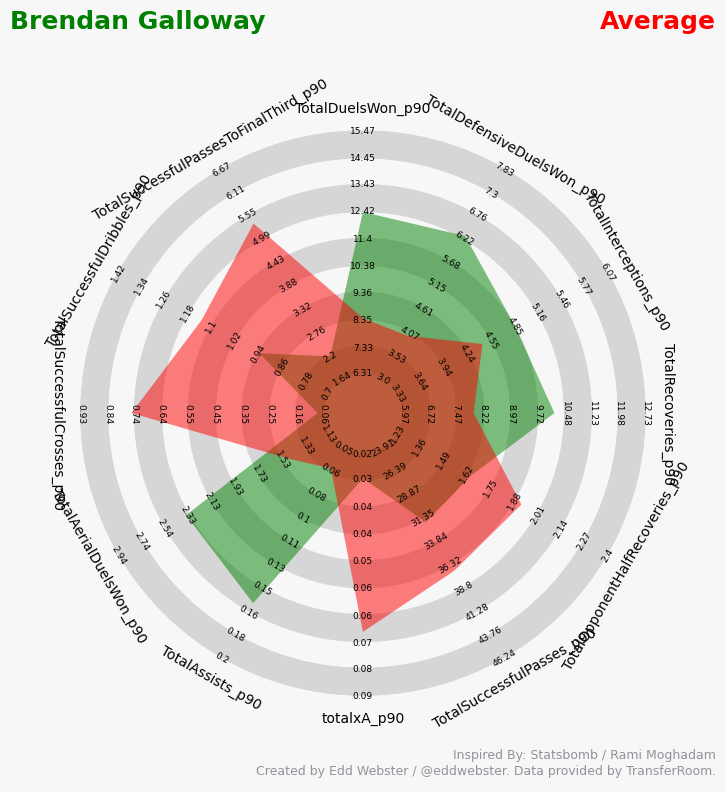

In [64]:
lst_metrics_full_back = ['TotalDuelsWon_p90',
                         'TotalDefensiveDuelsWon_p90',
                         'TotalInterceptions_p90',
                         'TotalRecoveries_p90',
                         'TotalOpponentHalfRecoveries_p90', 
                         'TotalSuccessfulPasses_p90',
                         'totalxA_p90',
                         'TotalAssists_p90',
                         'TotalAerialDuelsWon_p90',
                         'TotalSuccessfulCrosses_p90',
                         'TotalSuccessfulDribbles_p90',
                         'TotalSuccessfulPassesToFinalThird_p90'
                        ]

# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df=df_players_lb_budget_pr,
                lst_metrics=lst_metrics_full_back,
                player_name='Brendan Galloway',
                player_colour='green',
                player_average_name='Average',
                player_average_colour='red'
               )

##### Percentile Rank bar chart

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator


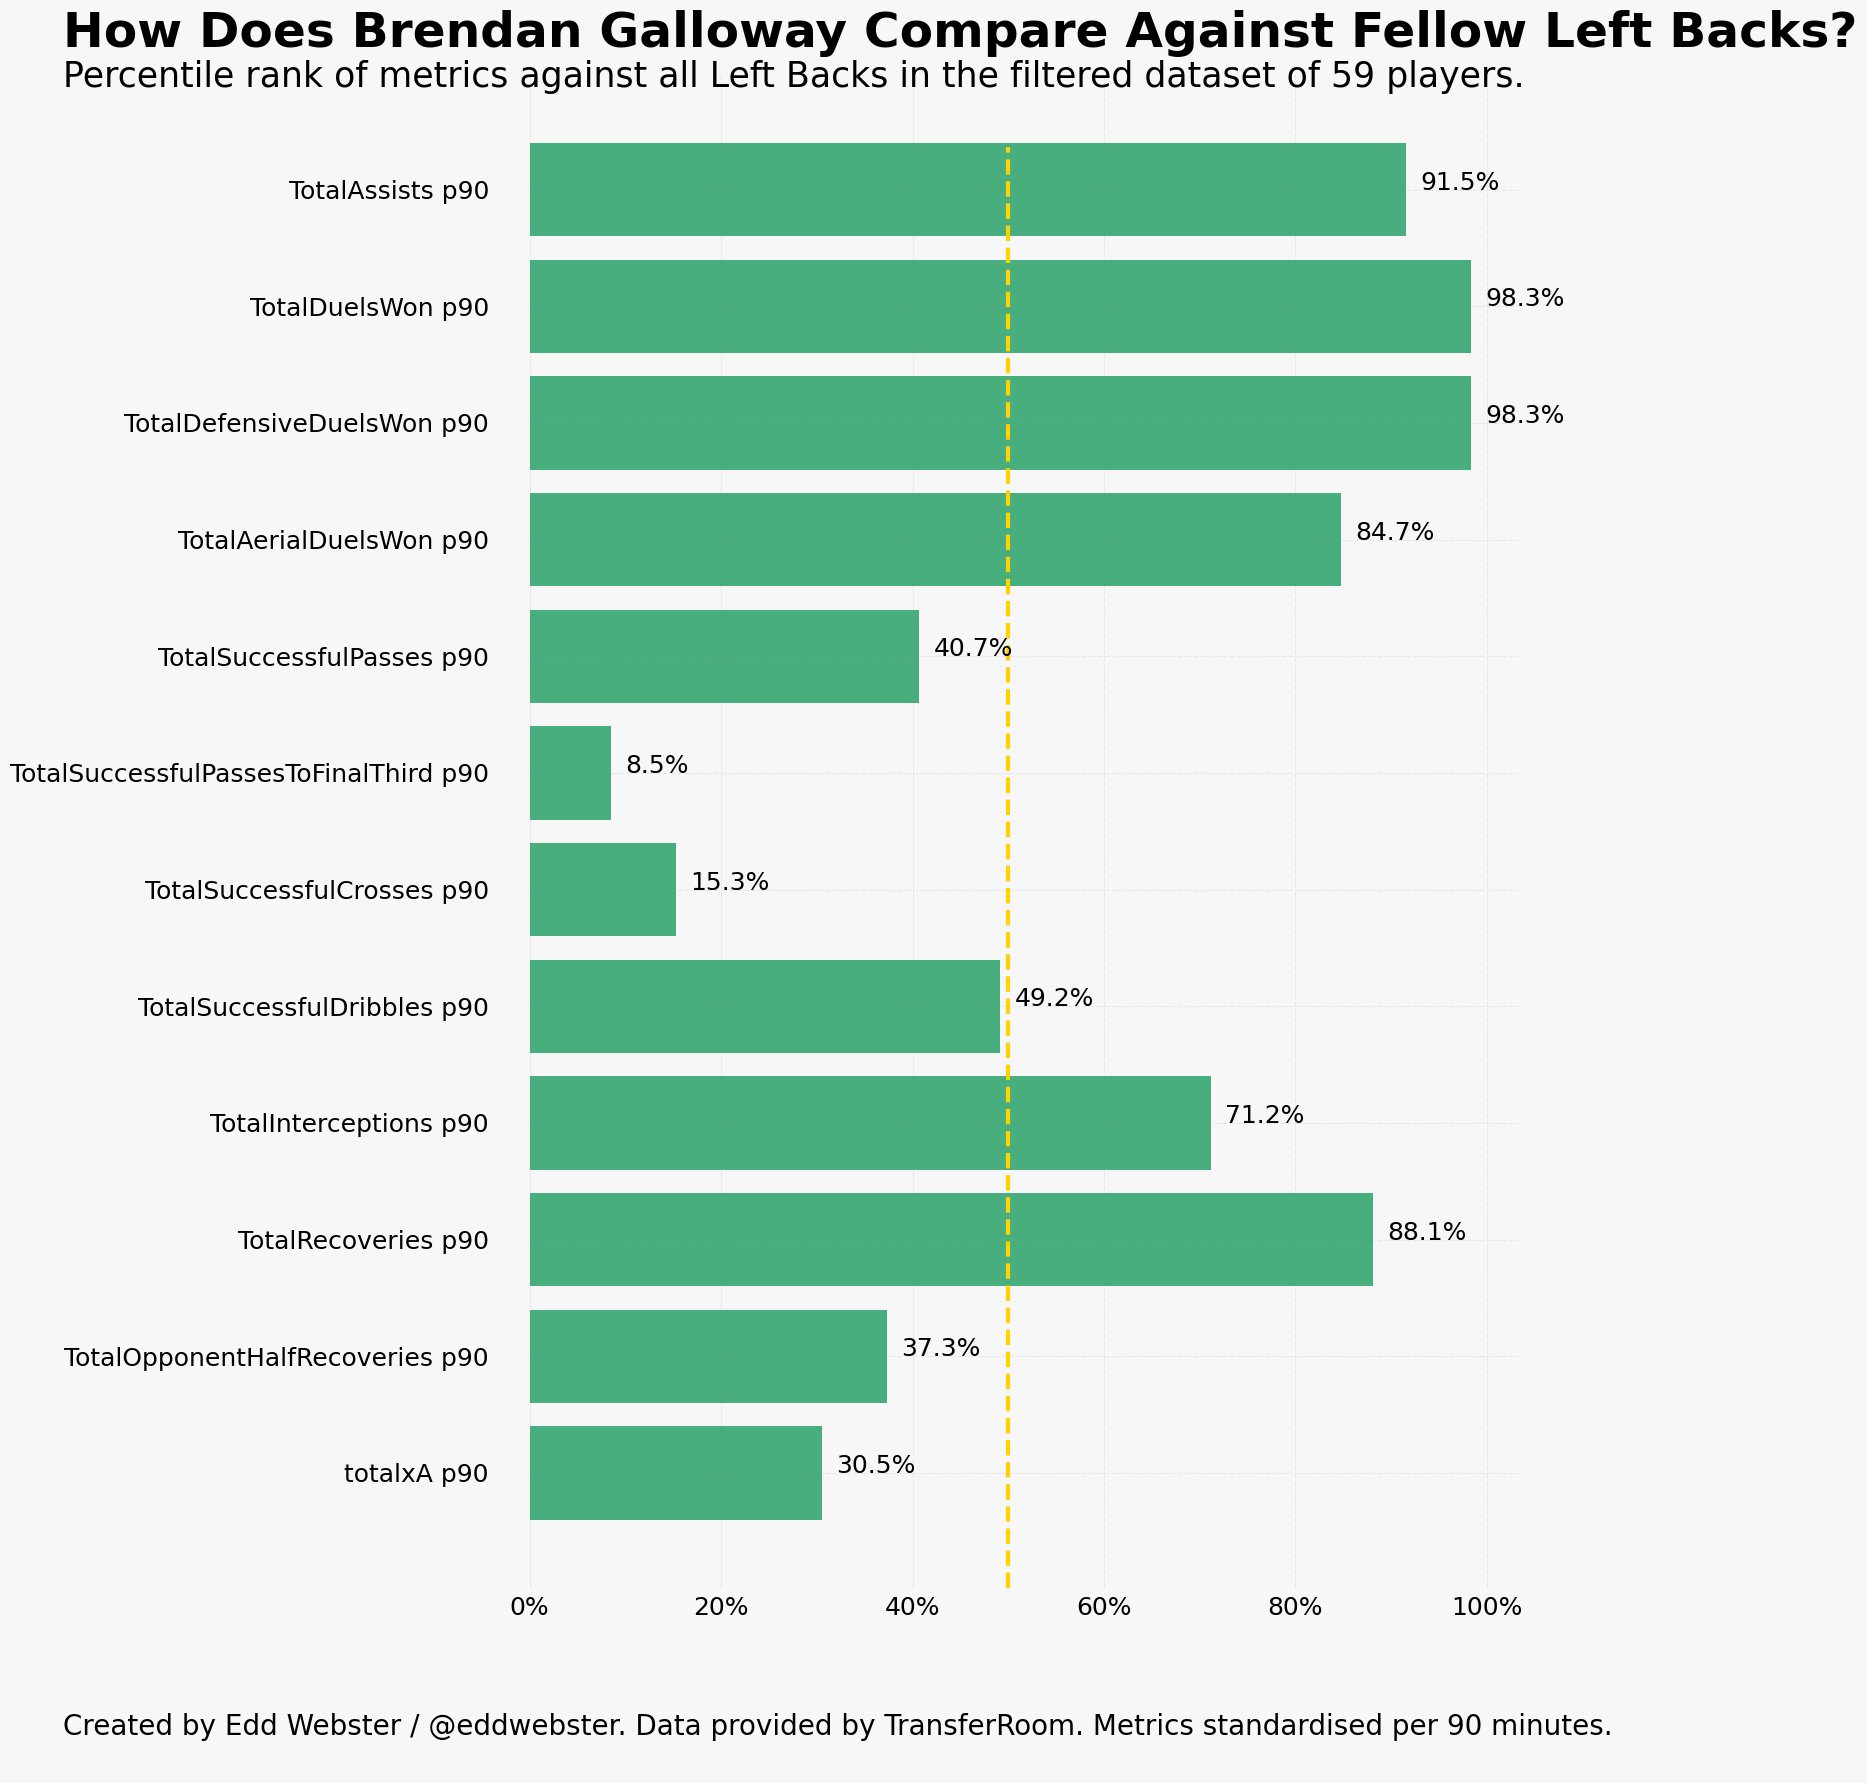

In [65]:
create_pr_bar_chart(df=df_players_lb_budget_pr,
                    player_name='Brendan Galloway',
                    player_colour='#0d9655',
                    position='Left Back',
                    total_players=59
                   )

##### Analysis
*    
*    
*    

<a id='section5.1.4.2'></a>

##### <a id='#section5.1.4.2'>5.1.4.2. Lucas Woudenberg</a>

##### Player data

In [66]:
# Create player DataFrame
create_player_df(df=df_players_lb_budget_pr,
                 player_name='Lucas Woudenberg',
                )

playerid         ShortName  age  nationality first_position  \
39    243174  Lucas Woudenberg   27  Netherlands      Left Back   

   second_position preferred_foot  expected_transfer_cost_euros  \
39             NaN           left                             0   

    est_weekly_wages_euro   parent_squad  current_squad  \
39                10000.0  SC Heerenveen  SC Heerenveen   

    recent_mins_played_percentage     season  StartDate    EndDate  \
39                       0.585912  2020/2021 2020-09-12 2021-06-01   

   competition      country  TotalMinutesOnField  TotalGoals  TotalAssists  \
39  Eredivisie  Netherlands                 2287           1             0   

    TotalShots  totalheadshots  TotalDuels  TotalDuelsWon  \
39           5               0         279            158   

    TotalDefensiveDuels  TotalDefensiveDuelsWon  TotalAerialDuels  \
39                  225                     127                50   

    TotalAerialDuelsWon  TotalPasses  TotalSuccessfulPasses  \
39                   26         1149                    927   

    TotalPassesToFinalThird  TotalSuccessfulPassesToFinalThird  TotalCrosses  \
39                      291                                194            46   

    TotalSuccessfulCrosses  TotalDribbles  TotalSuccessfulDribbles  \
39                      17             15                        5   

    TotalInterceptions  TotalShotAssists  TotalRecoveries  \
39                 183                12              139   

    TotalOpponentHalfRecoveries  totalxG  totalxA  expected_transfer_cost_usd  \
39                           18     0.58     2.47                         0.0   

    est_weekly_wages_usd  expected_transfer_cost_gbp  est_weekly_wages_gbp  \
39                8582.0                         0.0                7729.0   

    TotalGoals_p90  TotalAssists_p90  TotalShots_p90  totalheadshots_p90  \
39           0.039               0.0           0.197                 0.0   

    TotalDuels_p90  TotalDuelsWon_p90  TotalDefensiveDuels_p90  \
39          10.979              6.218                    8.854   

    TotalDefensiveDuelsWon_p90  TotalAerialDuels_p90  TotalAerialDuelsWon_p90  \
39                       4.998                 1.968                    1.023   

    TotalPasses_p90  TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
39           45.216                      36.48                       11.452   

    TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
39                                  7.634              1.81   

    TotalSuccessfulCrosses_p90  TotalDribbles_p90  \
39                       0.669               0.59   

    TotalSuccessfulDribbles_p90  TotalInterceptions_p90  TotalShotAssists_p90  \
39                        0.197                   7.202                 0.472   

    TotalRecoveries_p90  TotalOpponentHalfRecoveries_p90  totalxG_p90  \
39                 5.47                            0.708        0.023   

    totalxA_p90  expected_transfer_cost_gbp_pm  est_weekly_wages_gbp_pm  \
39        0.097                            0.0             33492.333333   

    monthly_loan_budget_gbp  xG/Shot  TotalAssists_p90_pr  \
39             33492.333333    0.116             0.220339   

    TotalDuelsWon_p90_pr  TotalDefensiveDuelsWon_p90_pr  \
39              0.118644                       0.847458   

    TotalAerialDuelsWon_p90_pr  TotalSuccessfulPasses_p90_pr  \
39                    0.347458                      0.542373   

    TotalSuccessfulPassesToFinalThird_p90_pr  TotalSuccessfulCrosses_p90_pr  \
39                                  0.864407                       0.525424   

    TotalSuccessfulDribbles_p90_pr  TotalInterceptions_p90_pr  \
39                        0.101695                        1.0   

    TotalRecoveries_p90_pr  TotalOpponentHalfRecoveries_p90_pr  \
39                0.118644                            0.067797   

    totalxA_p90_pr    sum_pr  
39        0.728814  5.483051

*    **Name**: Lucas Woudenberg
*    **Age**: 27
*    **First Position**: Left Back
*    **Second Position**: N/A
*    **Team**: SC Heerenveen
*    **League**: Eredivisie
*    **Nationality**: Dutch
*    **Preferred Foot**: Left
*    **Minutes Played**: 2,287 (58.6%)
*    **Expected Transfer Cost**: 0
*    **Estimated Weekly Wages**: £7,729 p.w.

##### Radar

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


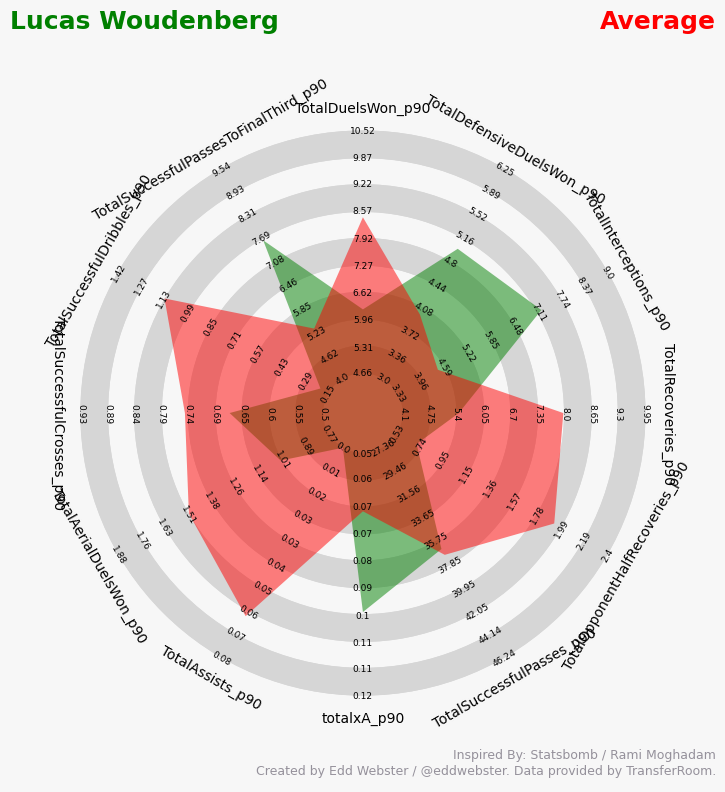

In [67]:
lst_metrics_full_back = ['TotalDuelsWon_p90',
                         'TotalDefensiveDuelsWon_p90',
                         'TotalInterceptions_p90',
                         'TotalRecoveries_p90',
                         'TotalOpponentHalfRecoveries_p90', 
                         'TotalSuccessfulPasses_p90',
                         'totalxA_p90',
                         'TotalAssists_p90',
                         'TotalAerialDuelsWon_p90',
                         'TotalSuccessfulCrosses_p90',
                         'TotalSuccessfulDribbles_p90',
                         'TotalSuccessfulPassesToFinalThird_p90'
                        ]

# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df=df_players_lb_budget_pr,
                lst_metrics=lst_metrics_full_back,
                player_name='Lucas Woudenberg',
                player_colour='green',
                player_average_name='Average',
                player_average_colour='red'
               )

##### Percentile Rank bar chart

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator


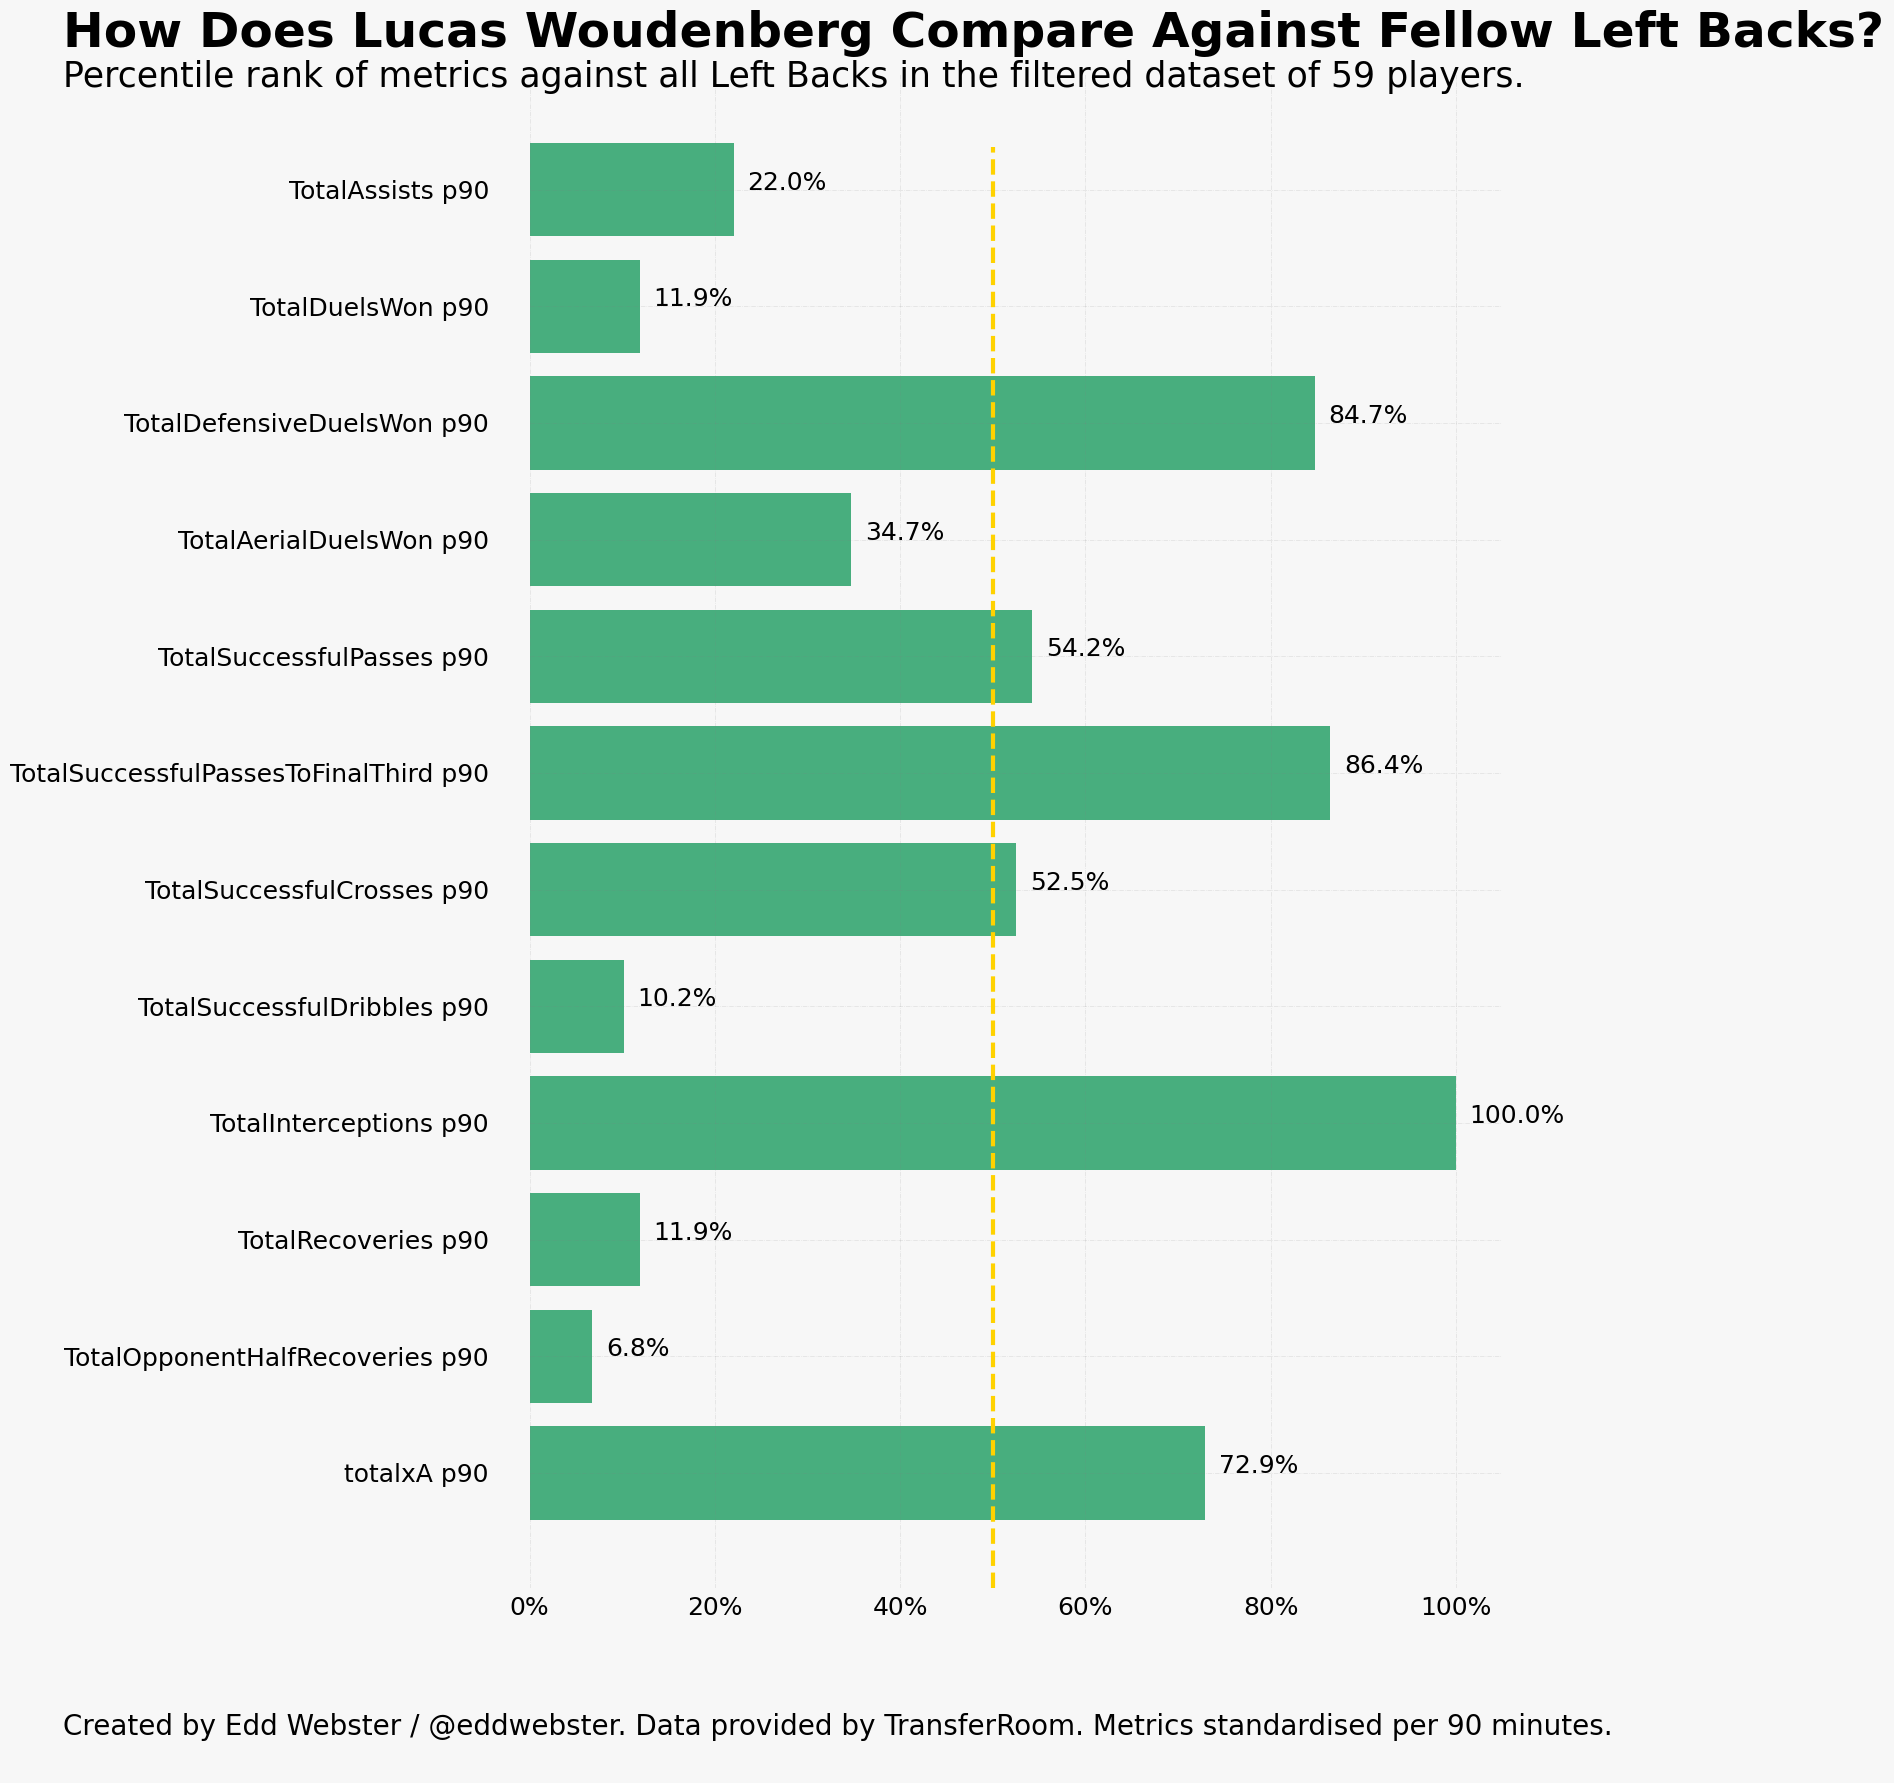

In [68]:
create_pr_bar_chart(df=df_players_lb_budget_pr,
                    player_name='Lucas Woudenberg',
                    player_colour='#0d9655',
                    position='Left Back',
                    total_players=59
                   )

##### Analysis
*    
*    
*    

<a id='section5.1.4.3'></a>

##### <a id='#section5.1.4.3'>5.1.4.3. Sebastián Prieto</a>

##### Player data

In [69]:
# Create player DataFrame
create_player_df(df=df_players_lb_budget_pr,
                 player_name='Sebastián Prieto',
                )

playerid         ShortName  age nationality first_position second_position  \
2    200823  Sebastián Prieto   28   Argentina      Left Back             NaN   

  preferred_foot  expected_transfer_cost_euros  est_weekly_wages_euro  \
2           both                             0                10000.0   

          parent_squad        current_squad  recent_mins_played_percentage  \
2  Club Atlético Tigre  Club Atlético Tigre                       0.983345   

  season  StartDate    EndDate      competition    country  \
2   2021 2021-03-12 2021-12-14  Prim B Nacional  Argentina   

   TotalMinutesOnField  TotalGoals  TotalAssists  TotalShots  totalheadshots  \
2                 2596           3             3          23               0   

   TotalDuels  TotalDuelsWon  TotalDefensiveDuels  TotalDefensiveDuelsWon  \
2         554            303                  254                     174   

   TotalAerialDuels  TotalAerialDuelsWon  TotalPasses  TotalSuccessfulPasses  \
2                57                   26         1178                    883   

   TotalPassesToFinalThird  TotalSuccessfulPassesToFinalThird  TotalCrosses  \
2                      210                                136           107   

   TotalSuccessfulCrosses  TotalDribbles  TotalSuccessfulDribbles  \
2                      38             68                       47   

   TotalInterceptions  TotalShotAssists  TotalRecoveries  \
2                 160                31              266   

   TotalOpponentHalfRecoveries  totalxG  totalxA  expected_transfer_cost_usd  \
2                           97     2.32      3.7                         0.0   

   est_weekly_wages_usd  expected_transfer_cost_gbp  est_weekly_wages_gbp  \
2                8582.0                         0.0                7729.0   

   TotalGoals_p90  TotalAssists_p90  TotalShots_p90  totalheadshots_p90  \
2           0.104             0.104           0.797                 0.0   

   TotalDuels_p90  TotalDuelsWon_p90  TotalDefensiveDuels_p90  \
2          19.206             10.505                    8.806   

   TotalDefensiveDuelsWon_p90  TotalAerialDuels_p90  TotalAerialDuelsWon_p90  \
2                       6.032                 1.976                    0.901   

   TotalPasses_p90  TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
2            40.84                     30.612                         7.28   

   TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
2                                  4.715              3.71   

   TotalSuccessfulCrosses_p90  TotalDribbles_p90  TotalSuccessfulDribbles_p90  \
2                       1.317              2.357                        1.629   

   TotalInterceptions_p90  TotalShotAssists_p90  TotalRecoveries_p90  \
2                   5.547                 1.075                9.222   

   TotalOpponentHalfRecoveries_p90  totalxG_p90  totalxA_p90  \
2                            3.363         0.08        0.128   

   expected_transfer_cost_gbp_pm  est_weekly_wages_gbp_pm  \
2                            0.0             33492.333333   

   monthly_loan_budget_gbp  xG/Shot  TotalAssists_p90_pr  \
2             33492.333333  0.10087             0.728814   

   TotalDuelsWon_p90_pr  TotalDefensiveDuelsWon_p90_pr  \
2              0.864407                       0.940678   

   TotalAerialDuelsWon_p90_pr  TotalSuccessfulPasses_p90_pr  \
2                    0.237288                      0.322034   

   TotalSuccessfulPassesToFinalThird_p90_pr  TotalSuccessfulCrosses_p90_pr  \
2                                  0.491525                       0.847458   

   TotalSuccessfulDribbles_p90_pr  TotalInterceptions_p90_pr  \
2                        0.745763                   0.847458   

   TotalRecoveries_p90_pr  TotalOpponentHalfRecoveries_p90_pr  totalxA_p90_pr  \
2                0.762712                            0.983051        0.898305   

     sum_pr  
2  8.669492

*    **Name**: Sebastián Prieto
*    **Age**: 28
*    **First Position**: Left Back
*    **Second Position**: N/A
*    **Team**: Club Atlético Tigre
*    **League**: Argentina Prim B Nacional
*    **Nationality**: Argentine
*    **Preferred Foot**: Both 
*    **Minutes Played**: 2,596 (98.3%)
*    **Expected Transfer Cost**: 0
*    **Estimated Weekly Wages**: £7,729 p.w.

##### Radar

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


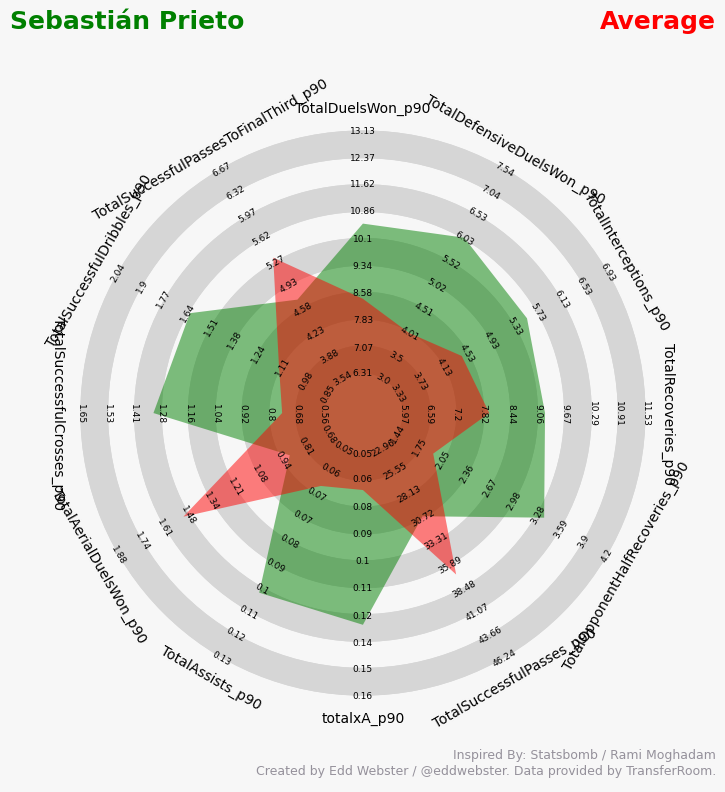

In [70]:
lst_metrics_full_back = ['TotalDuelsWon_p90',
                         'TotalDefensiveDuelsWon_p90',
                         'TotalInterceptions_p90',
                         'TotalRecoveries_p90',
                         'TotalOpponentHalfRecoveries_p90', 
                         'TotalSuccessfulPasses_p90',
                         'totalxA_p90',
                         'TotalAssists_p90',
                         'TotalAerialDuelsWon_p90',
                         'TotalSuccessfulCrosses_p90',
                         'TotalSuccessfulDribbles_p90',
                         'TotalSuccessfulPassesToFinalThird_p90'
                        ]

# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df=df_players_lb_budget_pr,
                lst_metrics=lst_metrics_full_back,
                player_name='Sebastián Prieto',
                player_colour='green',
                player_average_name='Average',
                player_average_colour='red'
               )

##### Percentile Rank bar chart

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator


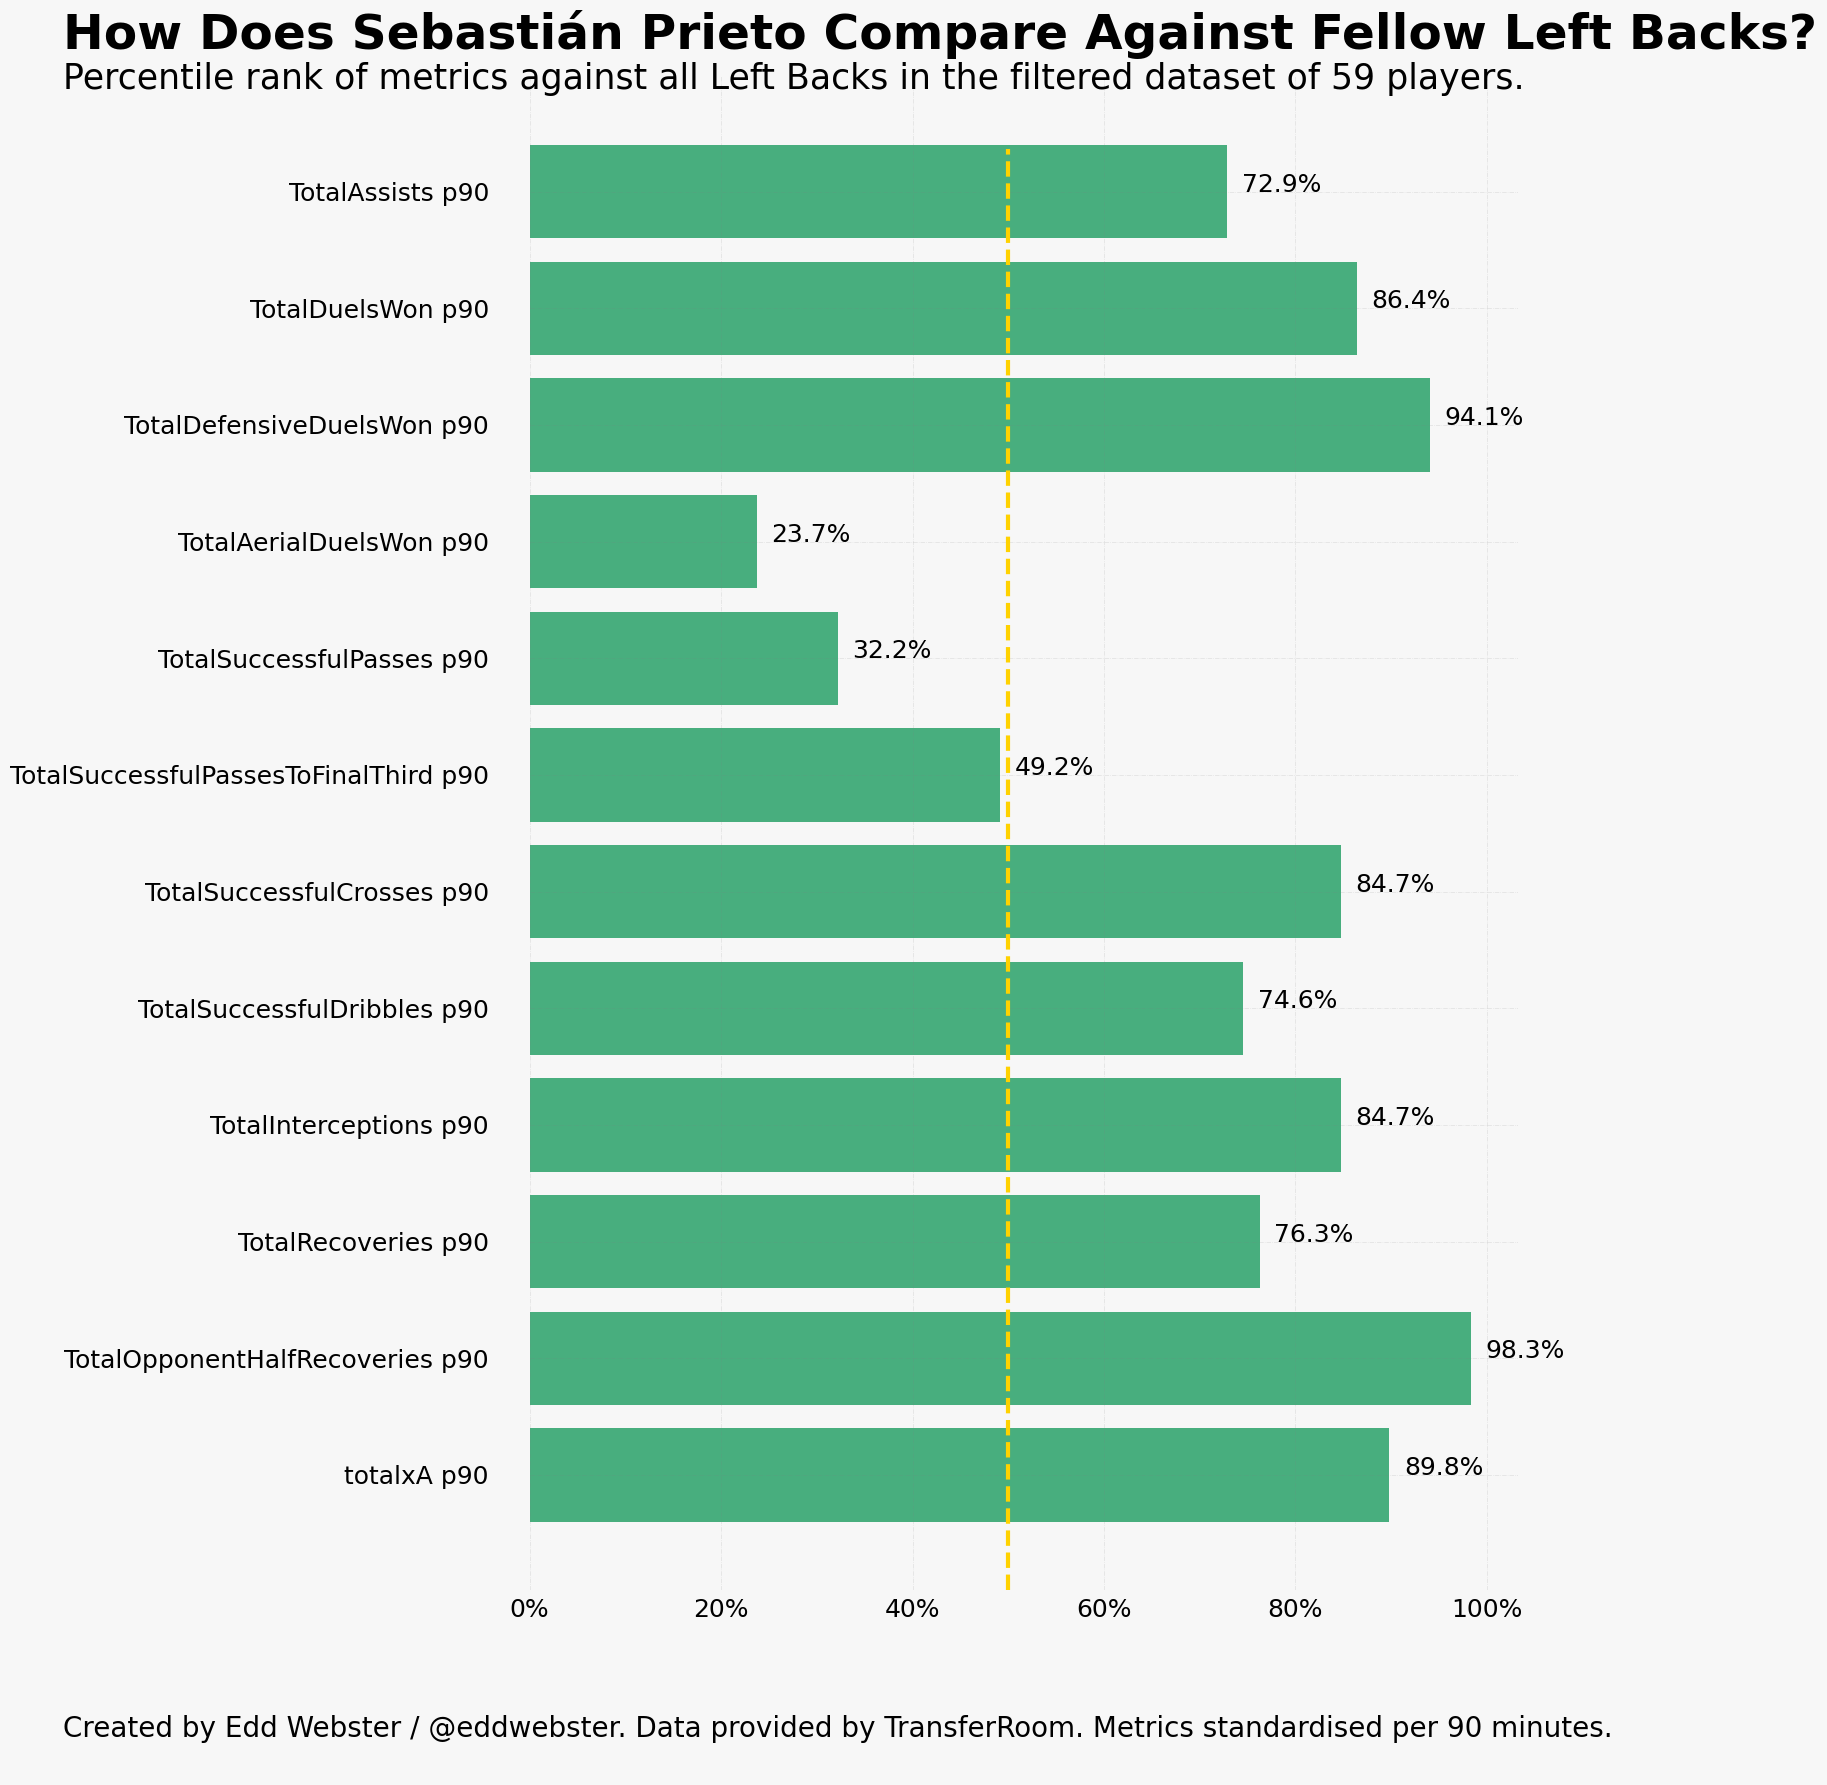

In [71]:
create_pr_bar_chart(df=df_players_lb_budget_pr,
                    player_name='Sebastián Prieto',
                    player_colour='#0d9655',
                    position='Left Back',
                    total_players=59
                   )

##### Analysis
*    Wout Faes' 20/21 performance were the most similar to Piqué's peak performances of the three candidates.
*    He meets the requirements of age and playing time - 22 years old and played 33 in 20/21, totalling 2,899 minutes.
*    Valued at €3.0M in December 2020 as per TransferMarkt, with a weekly salary of €8,077 as per Capology. However, in the last year, this has since increased to €7.0M, potentially pricing himself out Parma's budget.
*    2 years remaining on his contract (as per TransferMarkt), suggesting that he won't be available on a free transfer any time soon.
*    Playing stats reveal strong numbers for Progressive Passes p90, Completed Pass %, Shot Creating Actions p90, Tackles and Interceptions, and Aerial Win %.
*    Playing stats reveal less strong numbers for Completed Passes p90, Pressured Passing p90, Carries p90, Progressive Distance p90, Total Distance p90, npxG+xA, Tackle %.

<a id='section5.1.5'></a>

#### <a id='#section5.1.5'>5.1.5. Shortlisted Players</a>

The resulting filtration of players produces a three man shortlist:
1.    Aleksandar Simcevic [[TransferMarkt](https://www.transfermarkt.co.uk/aleksandar-simcevic/profil/spieler/36847)] [[FotMob](https://www.fotmob.com/players/183238/aleksandar-simcevic)]
2.    Bryan [[TransferMarkt](https://www.transfermarkt.co.uk/bryan/profil/spieler/224863)] [[FotMob](https://www.fotmob.com/players/322667/bryan-garcia)]
3.    Aleksa Amanovic [[TransferMarkt](https://www.transfermarkt.co.uk/aleksa-amanovic/profil/spieler/343355)] [[FotMob](https://www.fotmob.com/players/825010/aleksa-amanovic)]

<a id='section5.2'></a>

### <a id='#section5.2'>5.2. Ad 2: D.C. United</a>
Look for a player that meets the following requirements:

*    **Team:** D.C. United<br>
*    **Type:** Buy<br>
*    **Position:** Forward<br>
*    **Transfer Fee (annual gross salary):** 5,000,000 USD (salary 2,000,000 USD)
<br>
*    **Age:** 20-30<br>

<a id='section5.2.1'></a>

#### <a id='#section5.2.1'>5.2.1. Requirement Filtration</a>
Players that are forwards, available for buy and have a tranfer free (annual gross salary) of 5,000,000 USD (salary 2,000,000 USD), and are ages 20-30.

In [72]:
# Define position
position = 'Forward'

# Filter the DataFrame
df_players_fw = df_players[(df_players['first_position'] == position) | (df_players['second_position']  == position)]

# Display the DataFrame
df_players_fw.head(10)

playerid          ShortName  age         nationality  \
0       1686    Gonzalo Higuaín   34           Argentina   
6       1694       Fabio Borini   30               Italy   
20      1719         Edin Dzeko   35  Bosnia-Herzegovina   
26      1730      Patrik Schick   25      Czech Republic   
30      1745  Cristiano Ronaldo   36            Portugal   
40      1760       Paulo Dybala   28           Argentina   
47      1767         Moise Kean   21               Italy   
55      1784     Fabio Ceravolo   34               Italy   
64      1795    Alessio Da Cruz   24         Netherlands   
79      1818       Mauro Icardi   28           Argentina   

          first_position second_position preferred_foot  \
0                Forward             NaN          right   
6                 Winger         Forward          right   
20               Forward             NaN          right   
26               Forward          Winger           left   
30               Forward          Winger          right   
40  Attacking Midfielder         Forward           left   
47               Forward          Winger          right   
55               Forward          Winger          right   
64               Forward          Winger          right   
79               Forward             NaN          right   

    expected_transfer_cost_euros  est_weekly_wages_euro         parent_squad  \
0                        1400000               150000.0       Inter Miami CF   
6                        2400000                40000.0     Fatih Karagümrük   
20                       1800000               350000.0          Inter Milan   
26                      28000000               100000.0  Bayer 04 Leverkusen   
30                      18000000              1400000.0    Manchester United   
40                      25000000               350000.0          Juventus FC   
47                      55000000                70000.0           Everton FC   
55                        300000                    NaN        Calcio Padova   
64                       3900000                10000.0    Parma Calcio 1913   
79                      49000000               250000.0  Paris Saint-Germain   

          current_squad  recent_mins_played_percentage     season  StartDate  \
0        Inter Miami CF                       0.816476       2021 2021-04-17   
6      Fatih Karagümrük                       0.348948  2020/2021 2020-09-11   
20          Inter Milan                       0.740623  2021/2022 2021-08-21   
26  Bayer 04 Leverkusen                       0.602360  2020/2021 2020-09-18   
30    Manchester United                       0.821250  2021/2022 2021-08-13   
40          Juventus FC                       0.617875  2021/2022 2021-08-21   
47          Juventus FC                       0.266526  2020/2021 2020-08-21   
55        Calcio Padova                       0.748753  2021/2022 2021-08-28   
64        Santos Laguna                       0.405680  2020/2021 2020-09-12   
79  Paris Saint-Germain                       0.300612  2020/2021 2020-08-21   

      EndDate     competition        country  TotalMinutesOnField  TotalGoals  \
0  2021-12-11             MLS  United States                 2536          12   
6  2021-06-01       Süper Lig         Turkey                 1781           9   
20 2022-05-22         Serie A          Italy                 1136           8   
26 2021-06-01      Bundesliga        Germany                 1954           9   
30 2022-05-22  Premier League        England                 1119           7   
40 2022-05-22         Serie A          Italy                 1008           5   
47 2021-06-01         Ligue 1         France                 1772          13   
55 2022-04-24         Serie C          Italy                 1424           8   
64 2021-06-01      Eredivisie    Netherlands                 1637           4   
79 2021-06-01         Ligue 1         France                 1158           7   

    TotalAssists  TotalShots  totalhead

The number of players that can play as a forward in the dataset, where either their first or second position is 'Forward':

In [73]:
len(df_players_fw)

3658

Next filter for age:

In [74]:
# Filter the DataFrame
df_players_fw_age = df_players[((df_players['first_position'] == position) | (df_players['second_position']  == position)) &
                               ((df_players['age'] <= 30) & (df_players['age'] >= 20))
                              ]

# Display the DataFrame
df_players_fw_age.head(10)

playerid         ShortName  age     nationality        first_position  \
6        1694      Fabio Borini   30           Italy                Winger   
26       1730     Patrik Schick   25  Czech Republic               Forward   
40       1760      Paulo Dybala   28       Argentina  Attacking Midfielder   
47       1767        Moise Kean   21           Italy               Forward   
64       1795   Alessio Da Cruz   24     Netherlands               Forward   
79       1818      Mauro Icardi   28       Argentina               Forward   
82       1821       Keita Baldé   26         Senegal               Forward   
83       1823  Lautaro Martínez   24       Argentina               Forward   
108      1872     Darwin Machís   28       Venezuela                Winger   
117      1883     Kevin Lasagna   29           Italy               Forward   

          second_position preferred_foot  expected_transfer_cost_euros  \
6                 Forward          right                       2400000   
26                 Winger           left                      28000000   
40                Forward           left                      25000000   
47                 Winger          right                      55000000   
64                 Winger          right                       3900000   
79                    NaN          right                      49000000   
82                 Winger           both                       7500000   
83                    NaN          right                      80000000   
108               Forward          right                       5600000   
117  Attacking Midfielder           left                       3800000   

     est_weekly_wages_euro         parent_squad        current_squad  \
6                  40000.0     Fatih Karagümrük     Fatih Karagümrük   
26                100000.0  Bayer 04 Leverkusen  Bayer 04 Leverkusen   
40                350000.0          Juventus FC          Juventus FC   
47                 70000.0           Everton FC          Juventus FC   
64                 10000.0    Parma Calcio 1913        Santos Laguna   
79                250000.0  Paris Saint-Germain  Paris Saint-Germain   
82                100000.0      Cagliari Calcio      Cagliari Calcio   
83                100000.0          Inter Milan          Inter Milan   
108                10000.0           Granada CF           Granada CF   
117                30000.0       Udinese Calcio        Hellas Verona   

     recent_mins_played_percentage     season  StartDate    EndDate  \
6                         0.348948  2020/2021 2020-09-11 2021-06-01   
26                        0.602360  2020/2021 2020-09-18 2021-06-01   
40                        0.617875  2021/2022 2021-08-21 2022-05-22   
47                        0.266526  2020/2021 2020-08-21 2021-06-01   
64                        0.405680  2020/2021 2020-09-12 2021-06-01   
79                        0.300612  2020/2021 2020-08-21 2021-06-01   
82                        0.450836  2020/2021 2020-09-19 2021-06-01   
83                        0.725959  2021/2022 2021-08-21 2022-05-22   
108                       0.408632  2020/2021 2020-09-12 2021-06-01   
117                       0.204594  2020/2021 2020-09-19 2021-06-01   

    competition      country  TotalMinutesOnField  TotalGoals  TotalAssists  \
6     Süper Lig       Turkey                 1781           9             1   
26   Bundesliga      Germany                 1954           9             1   
40      Serie A        Italy                 1008           5             2   
47      Ligue 1       France                 1772          13             0   
64   Eredivisie  Netherlands                 1637           4             3   
79      Ligue 1       France                 1158           7             3   
82      Serie A        Italy                 1260           7             1   
83      Serie A        Italy                 1007          10             2   
108     La Liga        Spain                 

The number of players in the dataset that can play as a forward and are between 20 and 30:

In [75]:
len(df_players_fw_age)

2735

Next filter for transfer fee and salary restrictions:

In [76]:
# Filter the DataFrame
df_players_fw_age_budget = df_players[((df_players['first_position'] == position) | (df_players['second_position']  == position)) &
                                      ((df_players['age'] <= 30) & (df_players['age'] >= 20)) &
                                      ((df_players['expected_transfer_cost_usd'] <= 5_000_000) | (df_players['expected_transfer_cost_usd'].isnull())) &
                                      (((df_players['est_weekly_wages_usd'] * 52) <= 2_000_000) | (df_players['est_weekly_wages_usd'].isnull()))   
                                     ]

# Display the DataFrame
df_players_fw_age_budget.head(10)

playerid          ShortName  age  nationality first_position  \
6        1694       Fabio Borini   30        Italy         Winger   
64       1795    Alessio Da Cruz   24  Netherlands        Forward   
108      1872      Darwin Machís   28    Venezuela         Winger   
117      1883      Kevin Lasagna   29        Italy        Forward   
136      1910     Dawid Kownacki   24       Poland        Forward   
149      1940  Mariusz Stepinski   26       Poland        Forward   
151      1942           Ali Sowe   27       Gambia        Forward   
159      1961      Mattia Destro   30        Italy        Forward   
238      2088        Samuel Mraz   24     Slovakia        Forward   
336      2240    Joaquí‎n Ardaiz   22      Uruguay        Forward   

          second_position preferred_foot  expected_transfer_cost_euros  \
6                 Forward          right                       2400000   
64                 Winger          right                       3900000   
108               Forward          right                       5600000   
117  Attacking Midfielder           left                       3800000   
136                Winger          right                       4300000   
149  Attacking Midfielder          right                       2500000   
151  Attacking Midfielder          right                       3600000   
159                   NaN          right                       1400000   
238                Winger          right                       1600000   
336                   NaN           left                       1000000   

     est_weekly_wages_euro        parent_squad       current_squad  \
6                  40000.0    Fatih Karagümrük    Fatih Karagümrük   
64                 10000.0   Parma Calcio 1913       Santos Laguna   
108                10000.0          Granada CF          Granada CF   
117                30000.0      Udinese Calcio       Hellas Verona   
136                20000.0  Fortuna Düsseldorf  Fortuna Düsseldorf   
149                20000.0       Hellas Verona    Aris FC Limassol   
151                10000.0           FK Rostov           FK Rostov   
159                20000.0           Genoa CFC           Genoa CFC   
238                10000.0       Spezia Calcio   Slovan Bratislava   
336                    NaN     FC Schaffhausen     FC Schaffhausen   

     recent_mins_played_percentage     season  StartDate    EndDate  \
6                         0.348948  2020/2021 2020-09-11 2021-06-01   
64                        0.405680  2020/2021 2020-09-12 2021-06-01   
108                       0.408632  2020/2021 2020-09-12 2021-06-01   
117                       0.204594  2020/2021 2020-09-19 2021-06-01   
136                       0.121928  2020/2021 2020-09-18 2021-06-01   
149                       0.387907  2021/2022 2021-08-20 2022-05-29   
151                       0.763746  2020/2021 2020-08-08 2021-06-01   
159                       0.506181  2020/2021 2020-09-19 2021-06-01   
238                       0.459607  2020/2021 2020-08-21 2021-06-01   
336                       0.830320  2021/2022 2021-07-23 2022-05-21   

          competition      country  TotalMinutesOnField  TotalGoals  \
6           Süper Lig       Turkey                 1781           9   
64         Eredivisie  Netherlands                 1637           4   
108           La Liga        Spain                 2142           4   
117           Serie A        Italy                 2491           4   
136     2. Bundesliga      Germany                 1458           7   
149       1. Division       Cyprus                 1086           5   
151    Premier League       Russia                 1063           3   
159           Serie A        Italy                 1679          11   
238       Ekstraklasa       Poland                 1187           2   
336  Challenge League  Switzerland                 1376           6   

     TotalAssists  TotalShots  totalheadshots  TotalDuels  TotalDuelsWon  \
6               1  

The number of players in the dataset that can play as a forward, that are between 20 and 30, and have a tranfer free (annual gross salary) of 5,000,000 USD and a salary 2,000,000 USD:

In [77]:
len(df_players_fw_age_budget)

2489

Finally, the players are filtered for those that are able to play a considerable number of minutes i.e. >= 60% of available minutes per season.

In [78]:
# Filter for players that have a sizeable number of the minutes available to them.

## Define minimum % minutes played
min_mins_perc = 0.6

## Filter the DataFrame
df_players_fw_age_budget_mins = df_players[((df_players['first_position'] == position) | (df_players['second_position']  == position)) &
                                           ((df_players['age'] <= 30) & (df_players['age'] >= 20)) &
                                           ((df_players['expected_transfer_cost_usd'] <= 5_000_000) | (df_players['expected_transfer_cost_usd'].isnull())) &
                                           (((df_players['est_weekly_wages_usd'] * 52) <= 2_000_000) | (df_players['est_weekly_wages_usd'].isnull())) &
                                           (df_players['recent_mins_played_percentage'] >= min_mins_perc)
                                          ]

## Display the DataFrame
df_players_fw_age_budget_mins.head(10)

playerid              ShortName  age       nationality first_position  \
151      1942               Ali Sowe   27            Gambia        Forward   
336      2240        Joaquí‎n Ardaiz   22           Uruguay        Forward   
350      2263           Jens Odgaard   22           Denmark        Forward   
379      2804        Matthew Shevlin   23  Northern Ireland        Forward   
409      3309          Milan Makaric   26            Serbia        Forward   
430      3843          Adrián Balboa   27           Uruguay        Forward   
489      5003           Robert Tambe   27          Cameroon        Forward   
497      5168  Allahyar Sayyadmanesh   20              Iran        Forward   
525      5673        Ernesto Starita   25             Italy         Winger   
540      5924         Jairo da Silva   29            Brazil         Winger   

          second_position preferred_foot  expected_transfer_cost_euros  \
151  Attacking Midfielder          right                       3600000   
336                   NaN           left                       1000000   
350                Winger           left                       1400000   
379                   NaN           both                        350000   
409  Attacking Midfielder           both                        800000   
430  Attacking Midfielder          right                        500000   
489                Winger           left                        800000   
497                Winger          right                       4800000   
525               Forward          right                        350000   
540               Forward          right                        550000   

     est_weekly_wages_euro               parent_squad  \
151                10000.0                  FK Rostov   
336                    NaN            FC Schaffhausen   
350                    NaN                US Sassuolo   
379                    NaN               Coleraine FC   
409                    NaN                 Aalborg BK   
430                10000.0     Club Atlético Belgrano   
489                20000.0  Shaanxi Chang'an Athletic   
497                10000.0              Fenerbahce SK   
525                    NaN           SS Monopoli 1966   
540                10000.0                   Pafos FC   

                 current_squad  recent_mins_played_percentage     season  \
151                  FK Rostov                       0.763746  2020/2021   
336            FC Schaffhausen                       0.830320  2021/2022   
350               RKC Waalwijk                       0.855439  2021/2022   
379               Coleraine FC                       0.915206  2021/2022   
409                 Aalborg BK                       0.734163  2021/2022   
430     Club Atlético Belgrano                       0.678170       2021   
489  Shaanxi Chang'an Athletic                       0.606425       2021   
497              Zorya Lugansk                       0.802646  2021/2022   
525           SS Monopoli 1966                       0.758855  2021/2022   
540                   Pafos FC                       0.758635  2021/2022   

     StartDate    EndDate       competition           country  \
151 2020-08-08 2021-06-01    Premier League            Russia   
336 2021-07-23 2022-05-21  Challenge League       Switzerland   
350 2021-08-13 2022-05-31        Eredivisie       Netherlands   
379 2021-08-27 2022-05-31       Premiership  Northern Ireland   
409 2021-07-16 2022-04-30         Superliga           Denmark   
430 2021-03-12 2021-12-14   Prim B Nacional         Argentina   
489 2021-04-24 2021-10-05  China League One          China PR   
497 2021-07-23 2022-05-21    Premier League           Ukraine   
525 2021-08-28 2022-04-24           Serie C             Italy   
540 2021-08-20 2022-05-29       1. Division            Cyprus   

     TotalMinutesOnField  TotalGoals  TotalAssists  TotalShots  \
151                 1063           3             0          19   
336               

The number of players in the dataset that can play as a forward, that are between 20 and 30, have a tranfer free (annual gross salary) of 5,000,000 USD and a salary 2,000,000 USD, and played at least 60% of available minutes:

In [79]:
len(df_players_fw_age_budget_mins)

1057

Next, the shortlist will be further filtered for players from suitable leagues through the Transfer Path dataset.

<a id='section5.2.2'></a>

#### <a id='#section5.2.2'>5.2.2. Transfer Path Analysis</a>

In [80]:
# Filter the DataFrame
df_transfers_mls = df_transfers[(df_transfers['to_country'] == 'United States') & (df_transfers['to_competition'] == 'MLS')]

# Sort DataFrame
df_transfers_mls = df_transfers_mls.sort_values(by=['perc_of_to_comp_total_transfers'], ascending=[False])

# Display the DataFrame
df_transfers_mls.head(20)

from_country  from_competition  from_divisionlevel     to_country  \
16746  United States               MLS                   1  United States   
16747  United States  USL Championship                   2  United States   
16748      Argentina         Superliga                   1  United States   
16749         Mexico           Liga MX                   1  United States   
16750  United States      USL League 1                   3  United States   
16751  United States  USL Championship                   2  United States   
16752  United States               MLS                   1  United States   
16753        England      Championship                   2  United States   
16754       Colombia         Primera A                   1  United States   
16755      Argentina         Superliga                   1  United States   
16756         Mexico           Liga MX                   1  United States   
16757    Netherlands        Eredivisie                   1  United States   
16758       Scotland       Premiership                   1  United States   
16759      Venezuela  Primera División                   1  United States   
16760     Costa Rica  Primera División                   1  United States   
16761         Brazil           Serie A                   1  United States   
16762         France           Ligue 1                   1  United States   
16763         Sweden       Allsvenskan                   1  United States   
16764        Germany     2. Bundesliga                   2  United States   
16765    Switzerland      Super League                   1  United States   

      to_competition  to_division_level transfer_type  \
16746            MLS                  1      Transfer   
16747            MLS                  1      Transfer   
16748            MLS                  1      Transfer   
16749            MLS                  1      Transfer   
16750            MLS                  1      Transfer   
16751            MLS                  1          Loan   
16752            MLS                  1          Loan   
16753            MLS                  1      Transfer   
16754            MLS                  1      Transfer   
16755            MLS                  1          Loan   
16756            MLS                  1          Loan   
16757            MLS                  1      Transfer   
16758            MLS                  1      Transfer   
16759            MLS                  1      Transfer   
16760            MLS                  1      Transfer   
16761            MLS                  1      Transfer   
16762            MLS                  1      Transfer   
16763            MLS                  1      Transfer   
16764            MLS                  1      Transfer   
16765            MLS                  1      Transfer   

       perc_of_to_comp_total_transfers  
16746                         0.322245  
16747                         0.098406  
16748                         0.029799  
16749                         0.025641  
16750                         0.024255  
16751                         0.021483  
16752                         0.013860  
16753                         0.013860  
16754                         0.012474  
16755                         0.011781  
16756                         0.011781  
16757                         0.011088  
16758                         0.010395  
16759                         0.010395  
16760                         0.010395  
16761                         0.009702  
16762                         0.009702  
16763                         0.009702  
16764                         0.009702  
16765                         0.008316

Number of leagues from which players have transferred to the MLS:

In [81]:
len(df_transfers_mls)

175

There are 175 combinations of countries and competitions from which players have transferred to the MLS, the majority (32.2%) being from the MLS itself and the next biggest being the USL Championship (9.8%). 3rd is the Argentina Superliga (3.0%), followed by Liga MX in Mexico (2.6%).

The next stage will filter the DataFrame for only the top 10% of leagues. These leagues will then be used to further filter the players DataFrame.

In [82]:
# Create a DataFrame of the top 10% of MLS Transfers

## Define n %
n = 10

## Copy Transfer MLS DataFrame
df_transfers_mls_top_percentile = df_transfers_mls.copy()

## Filter the DataFrame
df_transfers_mls_top_percentile = df_transfers_mls_top_percentile[((df_transfers_mls_top_percentile['to_country'] == 'United States') & (df_transfers_mls_top_percentile['to_competition'] == 'MLS'))]

## Sort DataFrame
df_transfers_mls_top_percentile = df_transfers_mls_top_percentile.sort_values(by=['perc_of_to_comp_total_transfers'], ascending=[False])

## Create 'percentile rank' column of 'perc_of_to_comp_total_transfers' 
df_transfers_mls_top_percentile = df_transfers_mls_top_percentile.head(int((len(df_transfers_mls_top_percentile)*(n/100))))

## Reset index
df_transfers_mls_top_percentile = df_transfers_mls_top_percentile.reset_index(drop=True)

## Display the DataFrame
df_transfers_mls_top_percentile

from_country  from_competition  from_divisionlevel     to_country  \
0   United States               MLS                   1  United States   
1   United States  USL Championship                   2  United States   
2       Argentina         Superliga                   1  United States   
3          Mexico           Liga MX                   1  United States   
4   United States      USL League 1                   3  United States   
5   United States  USL Championship                   2  United States   
6   United States               MLS                   1  United States   
7         England      Championship                   2  United States   
8        Colombia         Primera A                   1  United States   
9       Argentina         Superliga                   1  United States   
10         Mexico           Liga MX                   1  United States   
11    Netherlands        Eredivisie                   1  United States   
12       Scotland       Premiership                   1  United States   
13      Venezuela  Primera División                   1  United States   
14     Costa Rica  Primera División                   1  United States   
15         Brazil           Serie A                   1  United States   
16         France           Ligue 1                   1  United States   

   to_competition  to_division_level transfer_type  \
0             MLS                  1      Transfer   
1             MLS                  1      Transfer   
2             MLS                  1      Transfer   
3             MLS                  1      Transfer   
4             MLS                  1      Transfer   
5             MLS                  1          Loan   
6             MLS                  1          Loan   
7             MLS                  1      Transfer   
8             MLS                  1      Transfer   
9             MLS                  1          Loan   
10            MLS                  1          Loan   
11            MLS                  1      Transfer   
12            MLS                  1      Transfer   
13            MLS                  1      Transfer   
14            MLS                  1      Transfer   
15            MLS                  1      Transfer   
16            MLS                  1      Transfer   

    perc_of_to_comp_total_transfers  
0                          0.322245  
1                          0.098406  
2                          0.029799  
3                          0.025641  
4                          0.024255  
5                          0.021483  
6                          0.013860  
7                          0.013860  
8                          0.012474  
9                          0.011781  
10                         0.011781  
11                         0.011088  
12                         0.010395  
13                         0.010395  
14                         0.010395  
15                         0.009702  
16                         0.009702

In [83]:
len(df_transfers_mls_top_percentile)

17

In [84]:
df_transfers_mls_top_percentile.to_csv('mls_tps.csv')

In [85]:
# Create lists from the country and competition columns of the Transfer Paths DataFrame, to filter Players DataFrame
lst_from_country_mls = df_transfers_mls_top_percentile['from_country'].tolist()
lst_from_competition_mls = df_transfers_mls_top_percentile['from_competition'].tolist()

In [86]:
# Filter the DataFrame
df_players_fw_age_budget_tp = df_players_fw_age_budget[df_players_fw_age_budget['country'].isin(lst_from_country_mls)]
df_players_fw_age_budget_tp = df_players_fw_age_budget_tp[df_players_fw_age_budget_tp['competition'].isin(lst_from_competition_mls)]

# Display the DataFrame
df_players_fw_age_budget_tp.head(50)

playerid            ShortName  age  nationality        first_position  \
64        1795      Alessio Da Cruz   24  Netherlands               Forward   
350       2263         Jens Odgaard   22      Denmark               Forward   
447       4130         Mario Engels   28      Germany                Winger   
461       4455          Ray Vanegas   28     Colombia                Winger   
491       5021              Perotti   24       Brazil               Forward   
513       5482         Marc McNulty   29     Scotland               Forward   
584       6942      Andreas Weimann   30      Austria               Forward   
587       6982           Danny Ward   30      England               Forward   
601       7364      Eduardo Aguirre   23       Mexico               Forward   
612       7643      Jonathan Torres   24    Argentina               Forward   
630       8005          Jacob Brown   23     Scotland               Forward   
635       8036          Chuba Akpom   26      England               Forward   
698       9416            Tony Watt   27     Scotland               Forward   
1025     16480      Carlos González   28     Paraguay               Forward   
1129     18524     Miguel Merentiel   25      Uruguay               Forward   
1405     24626         Miguel Borja   28     Colombia               Forward   
1459     25685        Jack Hamilton   21     Scotland               Forward   
1507     26630     Aaron Leya Iseka   24      Belgium               Forward   
1545     27790        Conor Chaplin   24      England               Forward   
1569     28168    Juan Ferney Otero   26     Colombia               Forward   
1572     28219    Nicolás Fernández   25    Argentina               Forward   
1586     28482  Nicolas de Préville   30       France               Forward   
1611     29003           David Moyo   26     Zimbabwe               Forward   
1803     33326   Rogelio Funes Mori   30       Mexico               Forward   
1944     36327        Romell Quioto   30     Honduras                Winger   
1995     37134   Jonathan Rodríguez   28      Uruguay               Forward   
2019     37587        André‎s Amaya   20     Colombia                Winger   
2102     39252        Carlos Auzqui   30    Argentina                Winger   
2128     39769        Irvin Cardona   24       France               Forward   
2145     40109   Emiliano Marcondes   26      Denmark  Attacking Midfielder   
2379     45474           Chris Kane   27     Scotland               Forward   
2403     45925     André‎s Rentería   28     Colombia               Forward   
2417     46231          Nicky Clark   30     Scotland               Forward   
2641     51602     Kacper Przybylko   28       Poland               Forward   
2805     55802        Moussa Konaté   28      Senegal               Forward   
2829     55855        Saman Ghoddos   28         Iran  Attacking Midfielder   
2883     55957    Nicolai Jörgensen   30      Denmark               Forward   
2992     56108  Jón Dadi Bödvarsson   29      Iceland               Forward   
3150     56320       Ángel Zaldívar   27       Mexico               Forward   
3241     56455       Cauley Woodrow   27      England               Forward   
3387     56679         Isaac Mbenza   25      Belgium                Winger   
3398     56736         Danny Mullen   26     Scotland               Forward   
3422     57220         Junior Arias   28      Uruguay               Forward   
3595     59151         Lee Connelly   22     Scotland               Forward   
3712     61031          Benik Afobe   28     Congo DR               Forward   
3792     61668  Anastasios Douvikas   22       Greece               Forward   
3823     62323        Renaud Ripart   28       France               Forward   
3855     62701       Mats Seuntjens   29  Netherlands  Attacking Midfielder   
4066     64851       Jonathan Okita   25     Congo DR                Winger   
4095     65303          Joë‎l Piroe   22  Netherlands   

This leaves the following players for analysis:

In [87]:
len(df_players_fw_age_budget_tp)

316

<a id='section5.2.3'></a>

#### <a id='#section5.2.3'>5.2.3. Performance Metrics Selection</a>
Depending on the position and the interpretation of a position, the qualities required in a potential recruit need to be carefully selected during the assessment process. 

As part of the recruitment analysis, each of the three shortlisted players are measured with the following twelve attributes, based on the standard StatsBomb Knutson radar for a Full Back [[link](https://statsbomb.com/2018/08/new-data-new-statsbomb-radars/)], amended with some more ball-playing metrics. These are then visualised as radars.

StatsBomb Striker Radar
*    **xG**: Non-penalty expected goals
*    **Shots**: Number of non-penalty shots a player takes
*    **Touches in Box**: Successful footed touches inside the box (including shots)
*    **Shot Touch%**: The amount of shots a player takes as a proportion of their touches of the ball
*    **xG Assisted**: This is calculated from the expected goal value of the assisted shot
*    **Pressure Regains**: Times a player’s team won the ball back within 5 seconds of the player pressuring an opponent
*    **Pressures**: The number of times a player pressures an opposition player
*    **Aerial Wins**: Number of aerial duels a player wins
*    **Turnovers**: How often a player loses the ball via a miscontrol or a failed dribble
*    **Successful Dribbles**: How often a player successfully dribbles past an opponent
*    **xG/Shot**: A measure of shot quality, this looks at the average non-penalty expected goal value per shot a player takes

The dataset provided is simpler than the standard Event dataset or aggregated dataset that may be found on FBref, containing 24 metrics. The following 12 metrics have been selected to measure the performance of Forwards:

In [88]:
# 12 select metrics to measure performance of a Forward
lst_metrics_forward = ['totalxG_p90',
                       'TotalGoals_p90',
                       'TotalShots_p90',
                       'totalxA_p90',
                       'TotalAssists_p90',
                       'TotalShotAssists_p90',
                       'TotalAerialDuelsWon_p90',
                       'TotalSuccessfulPasses_p90',
                       'TotalSuccessfulCrosses_p90',
                       'TotalSuccessfulDribbles_p90',
                       'TotalSuccessfulPassesToFinalThird_p90',
                       'xG/Shot'
                      ]

df_players_fw_budget_tp_pr = percentile_rank_metrics(df_players_fw_age_budget_tp, lst_metrics_forward)

df_players_fw_budget_tp_pr.head(10)

playerid           ShortName  age    nationality        first_position  \
0     84786         Mimoun Mahi   27        Morocco               Forward   
1     36327       Romell Quioto   30       Honduras                Winger   
2    284373     Michael McKenna   30       Scotland  Attacking Midfielder   
3    433818         Hadji Barry   29         Guinea               Forward   
4     56736        Danny Mullen   26       Scotland               Forward   
5    277702      Zakaria Labyad   28        Morocco  Attacking Midfielder   
6    212283      Jason Cummings   26       Scotland               Forward   
7    433770    Russell Cicerone   27  United States                Winger   
8     37134  Jonathan Rodríguez   28        Uruguay               Forward   
9    270027          Javon East   26        Jamaica               Forward   

        second_position preferred_foot  expected_transfer_cost_euros  \
0                Winger          right                       1600000   
1               Forward          right                       1800000   
2               Forward          right                             0   
3                Winger           both                        400000   
4                Winger          right                             0   
5               Forward           both                       2000000   
6  Attacking Midfielder           left                             0   
7               Forward           both                        250000   
8                Winger          right                       5300000   
9  Attacking Midfielder           left                        450000   

   est_weekly_wages_euro                     parent_squad  \
0                10000.0                       FC Utrecht   
1                20000.0            Club de Foot Montréal   
2                    NaN                      Arbroath FC   
3                    NaN  Colorado Springs Switchbacks FC   
4                    NaN                        Dundee FC   
5                20000.0                   Ajax Amsterdam   
6                    NaN                        Dundee FC   
7                    NaN        Pittsburgh Riverhounds FC   
8                20000.0                     CD Cruz Azul   
9                    NaN            Santos de Guápiles FC   

                     current_squad  recent_mins_played_percentage     season  \
0                       FC Utrecht                       0.349238  2020/2021   
1            Club de Foot Montréal                       0.775245       2021   
2                      Arbroath FC                       0.959829  2021/2022   
3  Colorado Springs Switchbacks FC                       0.992750       2021   
4                        Dundee FC                       0.250311  2020/2021   
5                   Ajax Amsterdam                       0.017933  2020/2021   
6                        Dundee FC                       0.426681  2020/2021   
7        Pittsburgh Riverhounds FC                       0.889517       2021   
8                     CD Cruz Azul                       0.453786       2021   
9            Santos de Guápiles FC                       0.878147  2021/2022   

   StartDate    EndDate       competition        country  TotalMinutesOnField  \
0 2020-09-12 2021-06-01        Eredivisie    Netherlands                 1466   
1 2021-04-17 2021-12-11               MLS  United States                 1161   
2 2021-07-31 2022-04-30      Championship       Scotland                 1594   
3 2021-04-24 2021-11-29  USL Championship  United States                 3102   
4 2020-10-16 2021-06-01      Championship       Scotland                 1435   
5 2020-09-12 2021-06-01        Eredivisie    Netherlands                 1016   
6 2020-10-16 2021-06-01      Championship       Scotland                 1046   
7 2021-04-24 2021-11-29  USL Championship  United States                 2341   
8 2021-01-09 2021-12-01           Liga MX         Mexico                 1241   

In [89]:
len(df_players_fw_budget_tp_pr)

316

A second DataFrame for the percentile rank of the player's performance is determined against all left backs, not just just those in the final filtered dataset. This is the DataFrame used in the visualisations and analysis.

In [90]:
# 12 select metrics to measure performance of a Forward
lst_metrics_forward = ['totalxG_p90',
                       'TotalGoals_p90',
                       'TotalShots_p90',
                       'totalxA_p90',
                       'TotalAssists_p90',
                       'TotalShotAssists_p90',
                       'TotalAerialDuelsWon_p90',
                       'TotalSuccessfulPasses_p90',
                       'TotalSuccessfulCrosses_p90',
                       'TotalSuccessfulDribbles_p90',
                       'TotalSuccessfulPassesToFinalThird_p90',
                       'xG/Shot'
                      ]

df_players_fw_pr = percentile_rank_metrics(df_players_fw, lst_metrics_forward)

df_players_fw_pr.head(10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


playerid             ShortName  age nationality first_position  \
0     56373           Luis Muriel   30    Colombia        Forward   
1    256906         Gerard Moreno   29       Spain        Forward   
2    271723        Bruno Petkovic   27     Croatia        Forward   
3     56184        Alexis Sánchez   32       Chile        Forward   
4    178929          Rafael Ratão   26      Brazil        Forward   
5      7727  Dennis Eckert Ayensa   24     Germany        Forward   
6    225129     Baghdad Bounedjah   30     Algeria        Forward   
7     84786           Mimoun Mahi   27     Morocco        Forward   
8      1993          Duván Zapata   30    Colombia        Forward   
9    143781           Deniz Undav   25     Germany        Forward   

        second_position preferred_foot  expected_transfer_cost_euros  \
0                Winger          right                      35000000   
1                Winger           left                      39000000   
2                   NaN          right                      12000000   
3  Attacking Midfielder          right                       3200000   
4                Winger          right                       1500000   
5                Winger          right                        950000   
6                   NaN          right                       6900000   
7                Winger          right                       1600000   
8                   NaN          right                      33000000   
9  Attacking Midfielder          right                       2900000   

   est_weekly_wages_euro                 parent_squad  \
0                80000.0                  Atalanta BC   
1                70000.0                Villarreal CF   
2                20000.0            GNK Dinamo Zagreb   
3               250000.0                  Inter Milan   
4                    NaN                  FC Toulouse   
5                10000.0             FC Ingolstadt 04   
6                50000.0                   Al-Sadd SC   
7                10000.0                   FC Utrecht   
8                80000.0                  Atalanta BC   
9                    NaN  Royale Union Saint Gilloise   

                 current_squad  recent_mins_played_percentage     season  \
0                  Atalanta BC                       0.338590  2020/2021   
1                Villarreal CF                       0.616731  2020/2021   
2            GNK Dinamo Zagreb                       0.694684  2020/2021   
3                  Inter Milan                       0.215559  2020/2021   
4                  FC Toulouse                       0.163579  2020/2021   
5             FC Ingolstadt 04                       0.775074  2020/2021   
6                   Al-Sadd SC                       0.786315  2020/2021   
7                   FC Utrecht                       0.349238  2020/2021   
8                  Atalanta BC                       0.793639  2021/2022   
9  Royale Union Saint Gilloise                       0.944541  2021/2022   

   StartDate    EndDate       competition      country  TotalMinutesOnField  \
0 2020-09-19 2021-06-01           Serie A        Italy                 1527   
1 2020-09-12 2021-06-01           La Liga        Spain                 2820   
2 2020-08-14 2021-06-01            1. HNL      Croatia                 1792   
3 2020-09-19 2021-06-01           Serie A        Italy                 1224   
4 2020-08-08 2021-05-28        Super Liga     Slovakia                 1798   
5 2020-09-18 2021-06-01           3. Liga      Germany                 1342   
6 2020-09-03 2021-04-10  QNB Stars League        Qatar                 1615   
7 2020-09-12 2021-06-01        Eredivisie  Netherlands                 1466   
8 2021-08-21 2022-05-22           Serie A        Italy                 1116   
9 2021-07-23 2022-05-21  First Division A      Belgium                 1649   

   TotalGoals  TotalAssists  TotalShots  totalheadshots  TotalDuels  \
0          22             8          83     

In [91]:
len(df_players_fw_pr)

3658

<a id='section5.2.4'></a>

#### <a id='#section5.2.4'>5.2.4. Data Deep Dive of Shortlisted Players (3)</a>

<a id='section5.2.4.1'></a>

##### <a id='#section5.2.4.1'>5.2.4.1. Jort van der Sande</a>

##### Player data

In [92]:
create_player_df(df=df_players_fw_age_budget_tp,
                 player_name='Mimoun Mahi',
                )

playerid    ShortName  age nationality first_position second_position  \
5639     84786  Mimoun Mahi   27     Morocco        Forward          Winger   

     preferred_foot  expected_transfer_cost_euros  est_weekly_wages_euro  \
5639          right                       1600000                10000.0   

     parent_squad current_squad  recent_mins_played_percentage     season  \
5639   FC Utrecht    FC Utrecht                       0.349238  2020/2021   

      StartDate    EndDate competition      country  TotalMinutesOnField  \
5639 2020-09-12 2021-06-01  Eredivisie  Netherlands                 1466   

      TotalGoals  TotalAssists  TotalShots  totalheadshots  TotalDuels  \
5639           7             3          61               0         302   

      TotalDuelsWon  TotalDefensiveDuels  TotalDefensiveDuelsWon  \
5639            121                   75                      26   

      TotalAerialDuels  TotalAerialDuelsWon  TotalPasses  \
5639                82                   32          403   

      TotalSuccessfulPasses  TotalPassesToFinalThird  \
5639                    293                      260   

      TotalSuccessfulPassesToFinalThird  TotalCrosses  TotalSuccessfulCrosses  \
5639                                182            34                       5   

      TotalDribbles  TotalSuccessfulDribbles  TotalInterceptions  \
5639             70                       32                  31   

      TotalShotAssists  TotalRecoveries  TotalOpponentHalfRecoveries  totalxG  \
5639                20               17                            7    14.93   

      totalxA  expected_transfer_cost_usd  est_weekly_wages_usd  \
5639     7.95                   1373155.0                8582.0   

      expected_transfer_cost_gbp  est_weekly_wages_gbp  TotalGoals_p90  \
5639                   1236567.0                7729.0            0.43   

      TotalAssists_p90  TotalShots_p90  totalheadshots_p90  TotalDuels_p90  \
5639             0.184           3.745                 0.0           18.54   

      TotalDuelsWon_p90  TotalDefensiveDuels_p90  TotalDefensiveDuelsWon_p90  \
5639              7.428                    4.604                       1.596   

      TotalAerialDuels_p90  TotalAerialDuelsWon_p90  TotalPasses_p90  \
5639                 5.034                    1.965           24.741   

      TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
5639                     17.988                       15.962   

      TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
5639                                 11.173             2.087   

      TotalSuccessfulCrosses_p90  TotalDribbles_p90  \
5639                       0.307              4.297   

      TotalSuccessfulDribbles_p90  TotalInterceptions_p90  \
5639                        1.965                   1.903   

      TotalShotAssists_p90  TotalRecoveries_p90  \
5639                 1.228                1.044   

      TotalOpponentHalfRecoveries_p90  totalxG_p90  totalxA_p90  \
5639                             0.43        0.917        0.488   

      expected_transfer_cost_gbp_pm  est_weekly_wages_gbp_pm  \
5639                      103047.25             33492.333333   

      monthly_loan_budget_gbp   xG/Shot  TotalGoals_p90_pr  \
5639            136539.583333  0.244754           0.765823   

      TotalAssists_p90_pr  TotalShots_p90_pr  TotalAerialDuelsWon_p90_pr  \
5639             0.863924           0.990506                    0.541139   

      TotalSuccessfulPasses_p90_pr  TotalSuccessfulPassesToFinalThird_p90_pr  \
5639                      0.791139                                  0.984177   

      TotalSuccessfulCrosses_p90_pr  TotalSuccessfulDribbles_p90_pr  \
5639                       0.629747                        0.620253   

      TotalShotAssists_p90_pr  totalxG_p90_pr  totalxA_p90_pr  xG/Shot_pr  \
5639                 0.931962             1.0        0.996835    0.977848   

         sum_pr  
5639  10.093354

*    **Name**: Mimoun Mahi
*    **Age**: 27
*    **First Position**: Forward
*    **Second Position**: Winger
*    **Team**: FC Utrecht
*    **League**: Eredivisie
*    **Nationality**: Morocco
*    **Preferred Foot**: Right
*    **Minutes Played**: 1,466 (34.9% of total minutes available)
*    **Expected Transfer Cost**: $1.37M

*    **Estimated Weekly Wages**: $8,482

##### Radar

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


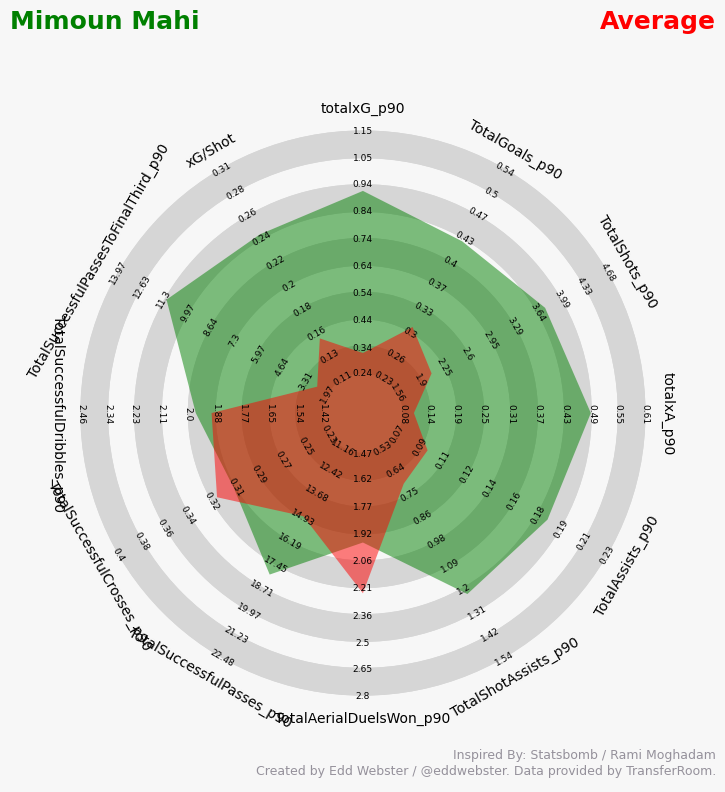

In [93]:
lst_metrics_forward = ['totalxG_p90',
                       'TotalGoals_p90',
                       'TotalShots_p90',
                       'totalxA_p90',
                       'TotalAssists_p90',
                       'TotalShotAssists_p90',
                       'TotalAerialDuelsWon_p90',
                       'TotalSuccessfulPasses_p90',
                       'TotalSuccessfulCrosses_p90',
                       'TotalSuccessfulDribbles_p90',
                       'TotalSuccessfulPassesToFinalThird_p90',
                       'xG/Shot'
                      ]

# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df=df_players_fw_age_budget_tp,
                lst_metrics=lst_metrics_forward,
                player_name='Mimoun Mahi',
                player_colour='green',
                player_average_name='Average',
                player_average_colour='red'
               )

##### Percentile Rank bar chart

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator


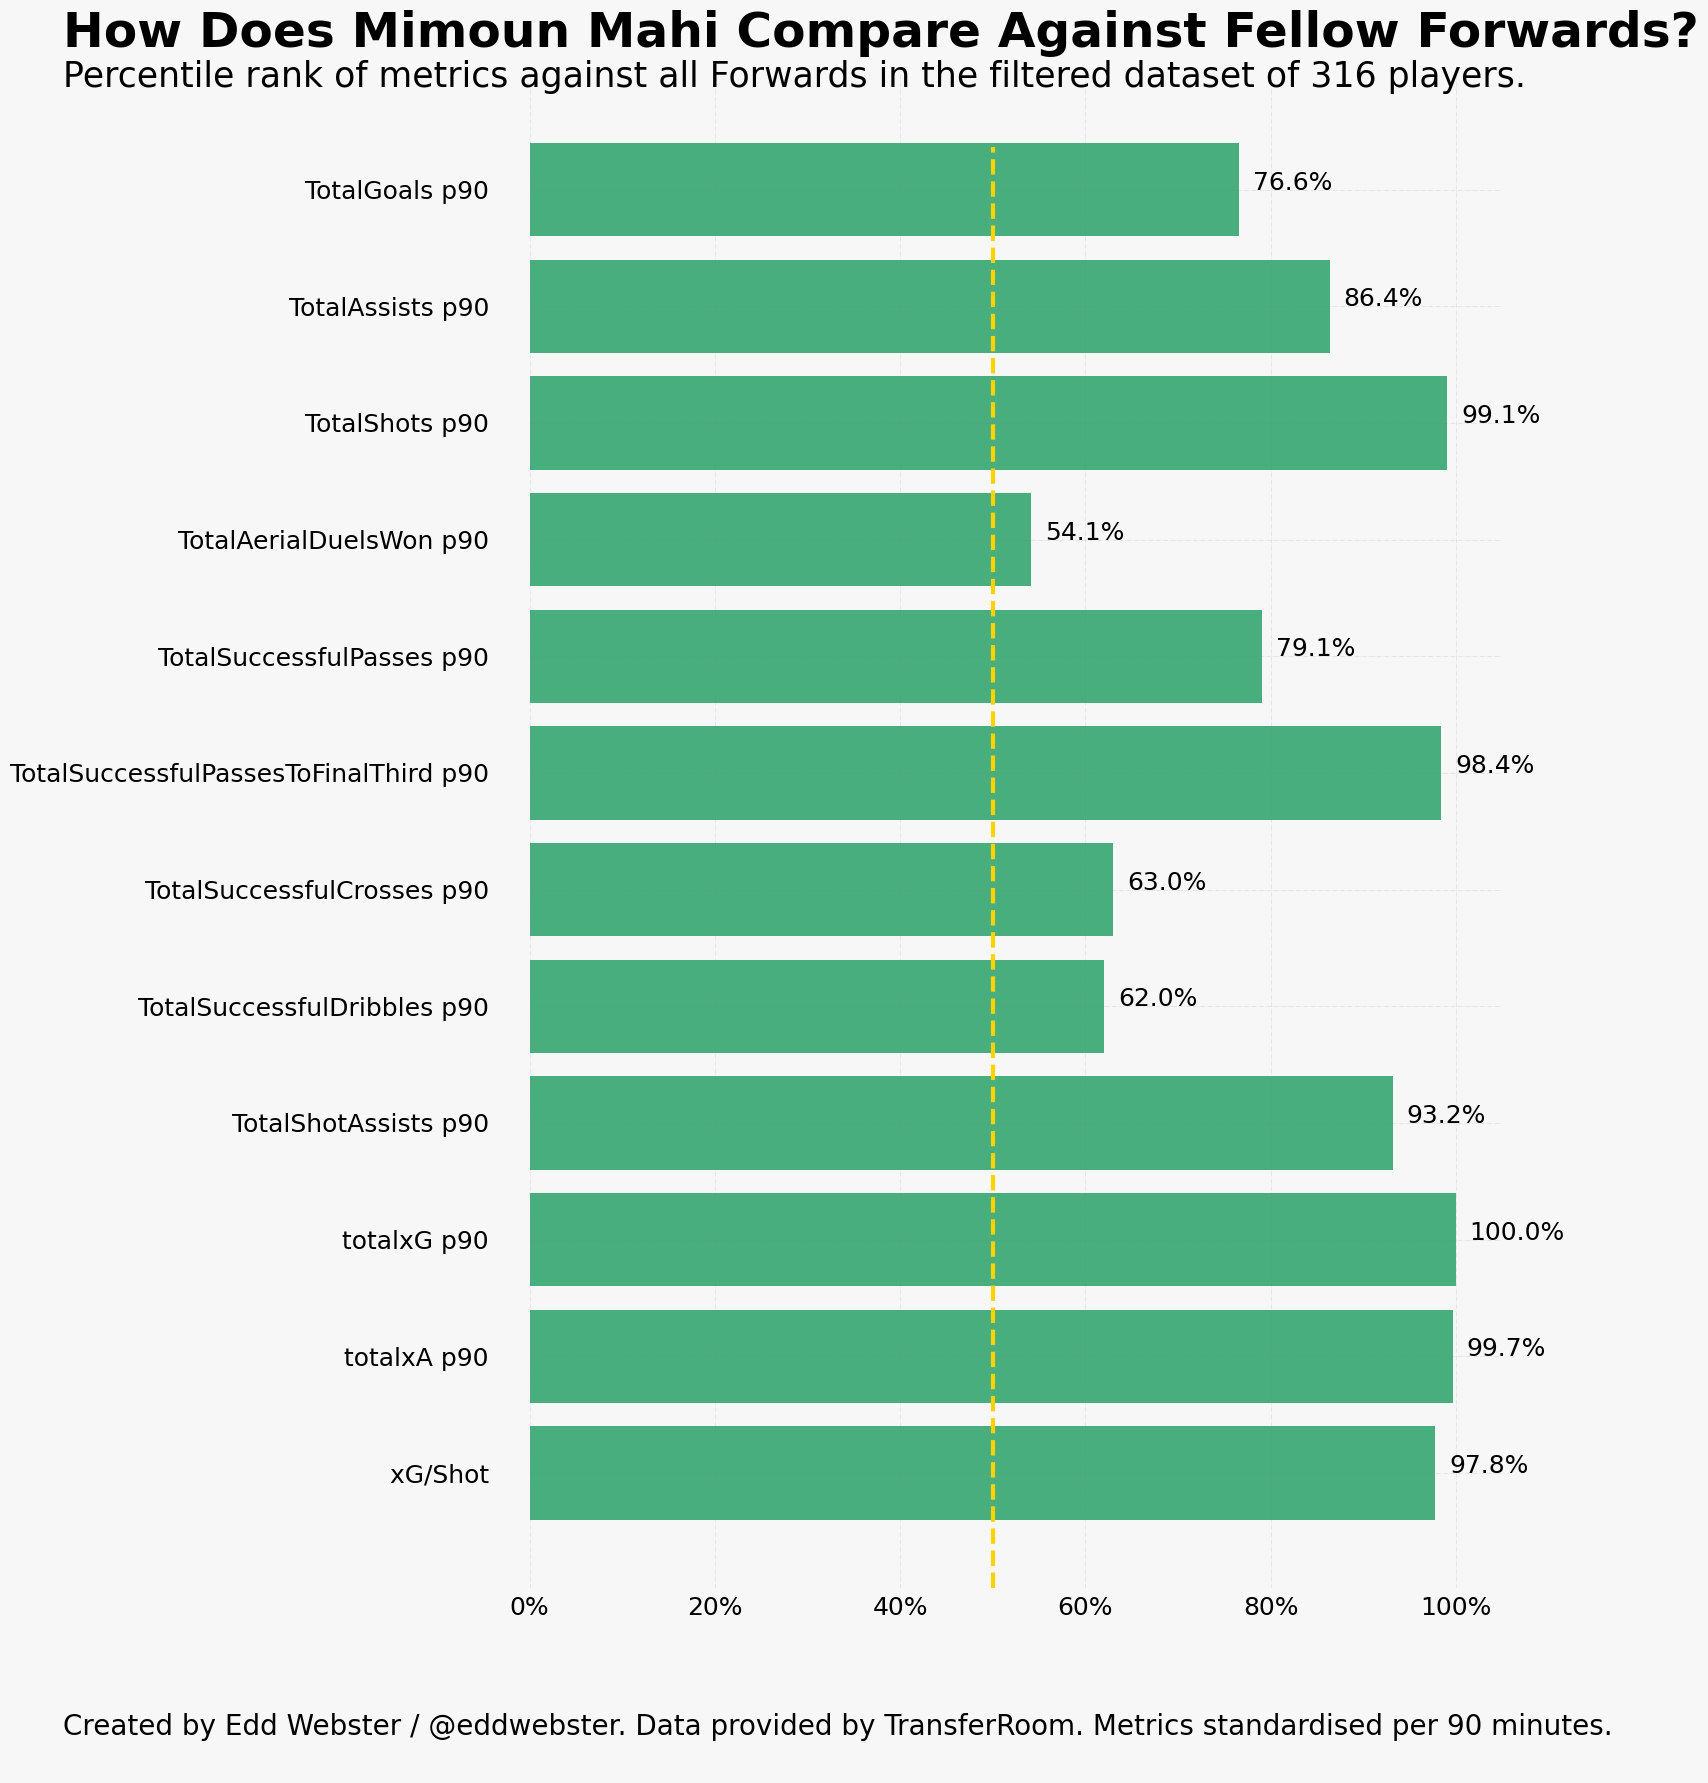

In [94]:
create_pr_bar_chart(df=df_players_fw_age_budget_tp,
                    player_name='Mimoun Mahi',
                    player_colour='#0d9655',
                    position='Forward',
                    total_players=316
                   )

##### Analysis
*    
*    
*    

<a id='section5.2.4.2'></a>

##### <a id='#section5.2.4.2'>5.2.4.2. Romell Quioto

##### Player data

In [95]:
create_player_df(df=df_players_fw_age_budget_tp,
                 player_name='Romell Quioto',
                )

playerid      ShortName  age nationality first_position second_position  \
1944     36327  Romell Quioto   30    Honduras         Winger         Forward   

     preferred_foot  expected_transfer_cost_euros  est_weekly_wages_euro  \
1944          right                       1800000                20000.0   

               parent_squad          current_squad  \
1944  Club de Foot Montréal  Club de Foot Montréal   

      recent_mins_played_percentage season  StartDate    EndDate competition  \
1944                       0.775245   2021 2021-04-17 2021-12-11         MLS   

            country  TotalMinutesOnField  TotalGoals  TotalAssists  \
1944  United States                 1161           8             4   

      TotalShots  totalheadshots  TotalDuels  TotalDuelsWon  \
1944          42               6         284             95   

      TotalDefensiveDuels  TotalDefensiveDuelsWon  TotalAerialDuels  \
1944                   23                       9                29   

      TotalAerialDuelsWon  TotalPasses  TotalSuccessfulPasses  \
1944                    9          274                    216   

      TotalPassesToFinalThird  TotalSuccessfulPassesToFinalThird  \
1944                       19                                 13   

      TotalCrosses  TotalSuccessfulCrosses  TotalDribbles  \
1944            22                       8             50   

      TotalSuccessfulDribbles  TotalInterceptions  TotalShotAssists  \
1944                       36                  11                15   

      TotalRecoveries  TotalOpponentHalfRecoveries  totalxG  totalxA  \
1944               19                           16     8.11     2.45   

      expected_transfer_cost_usd  est_weekly_wages_usd  \
1944                   1544799.0               17164.0   

      expected_transfer_cost_gbp  est_weekly_wages_gbp  TotalGoals_p90  \
1944                   1391138.0               15457.0            0.62   

      TotalAssists_p90  TotalShots_p90  totalheadshots_p90  TotalDuels_p90  \
1944              0.31           3.256               0.465          22.016   

      TotalDuelsWon_p90  TotalDefensiveDuels_p90  TotalDefensiveDuelsWon_p90  \
1944              7.364                    1.783                       0.698   

      TotalAerialDuels_p90  TotalAerialDuelsWon_p90  TotalPasses_p90  \
1944                 2.248                    0.698            21.24   

      TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
1944                     16.744                        1.473   

      TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
1944                                  1.008             1.705   

      TotalSuccessfulCrosses_p90  TotalDribbles_p90  \
1944                        0.62              3.876   

      TotalSuccessfulDribbles_p90  TotalInterceptions_p90  \
1944                        2.791                   0.853   

      TotalShotAssists_p90  TotalRecoveries_p90  \
1944                 1.163                1.473   

      TotalOpponentHalfRecoveries_p90  totalxG_p90  totalxA_p90  \
1944                             1.24        0.629         0.19   

      expected_transfer_cost_gbp_pm  est_weekly_wages_gbp_pm  \
1944                  115928.166667             66980.333333   

      monthly_loan_budget_gbp   xG/Shot  TotalGoals_p90_pr  \
1944                 182908.5  0.193095           0.955696   

      TotalAssists_p90_pr  TotalShots_p90_pr  TotalAerialDuelsWon_p90_pr  \
1944             0.977848           0.946203                    0.136076   

      TotalSuccessfulPasses_p90_pr  TotalSuccessfulPassesToFinalThird_p90_pr  \
1944                      0.737342                                  0.370253   

      TotalSuccessfulCrosses_p90_pr  TotalSuccessfulDribbles_p90_pr  \
1944                       0.878165                         0.81962   

      TotalShotAssists_p90_pr  totalxG_p90_pr  totalxA_p90_pr  xG/Shot_pr  \
1944                 0.924051        0.977848         0.89557    0.844937   

   

*    **Name**: Romell Quioto
*    **Age**: 30
*    **First Position**: Winger
*    **Second Position**: Forward
*    **Team**: Club de Foot Montréal
*    **League**: MLS
*    **Nationality**: Honduran
*    **Preferred Foot**: Right
*    **Minutes Played**: 1,161 (77.5% of total minutes available)
*    **Expected Transfer Cost**: $1.54M
*    **Estimated Weekly Wages**: $17.2k

##### Radar

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


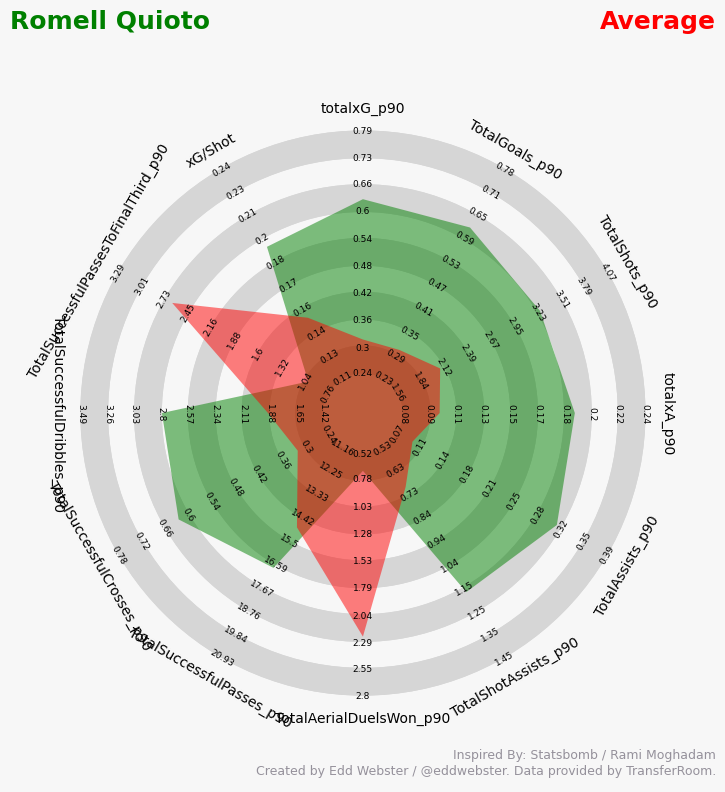

In [96]:
lst_metrics_forward = ['totalxG_p90',
                       'TotalGoals_p90',
                       'TotalShots_p90',
                       'totalxA_p90',
                       'TotalAssists_p90',
                       'TotalShotAssists_p90',
                       'TotalAerialDuelsWon_p90',
                       'TotalSuccessfulPasses_p90',
                       'TotalSuccessfulCrosses_p90',
                       'TotalSuccessfulDribbles_p90',
                       'TotalSuccessfulPassesToFinalThird_p90',
                       'xG/Shot'
                      ]

# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df=df_players_fw_age_budget_tp,
                lst_metrics=lst_metrics_forward,
                player_name='Romell Quioto',
                player_colour='green',
                player_average_name='Average',
                player_average_colour='red'
               )

##### Percentile Rank bar chart

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator


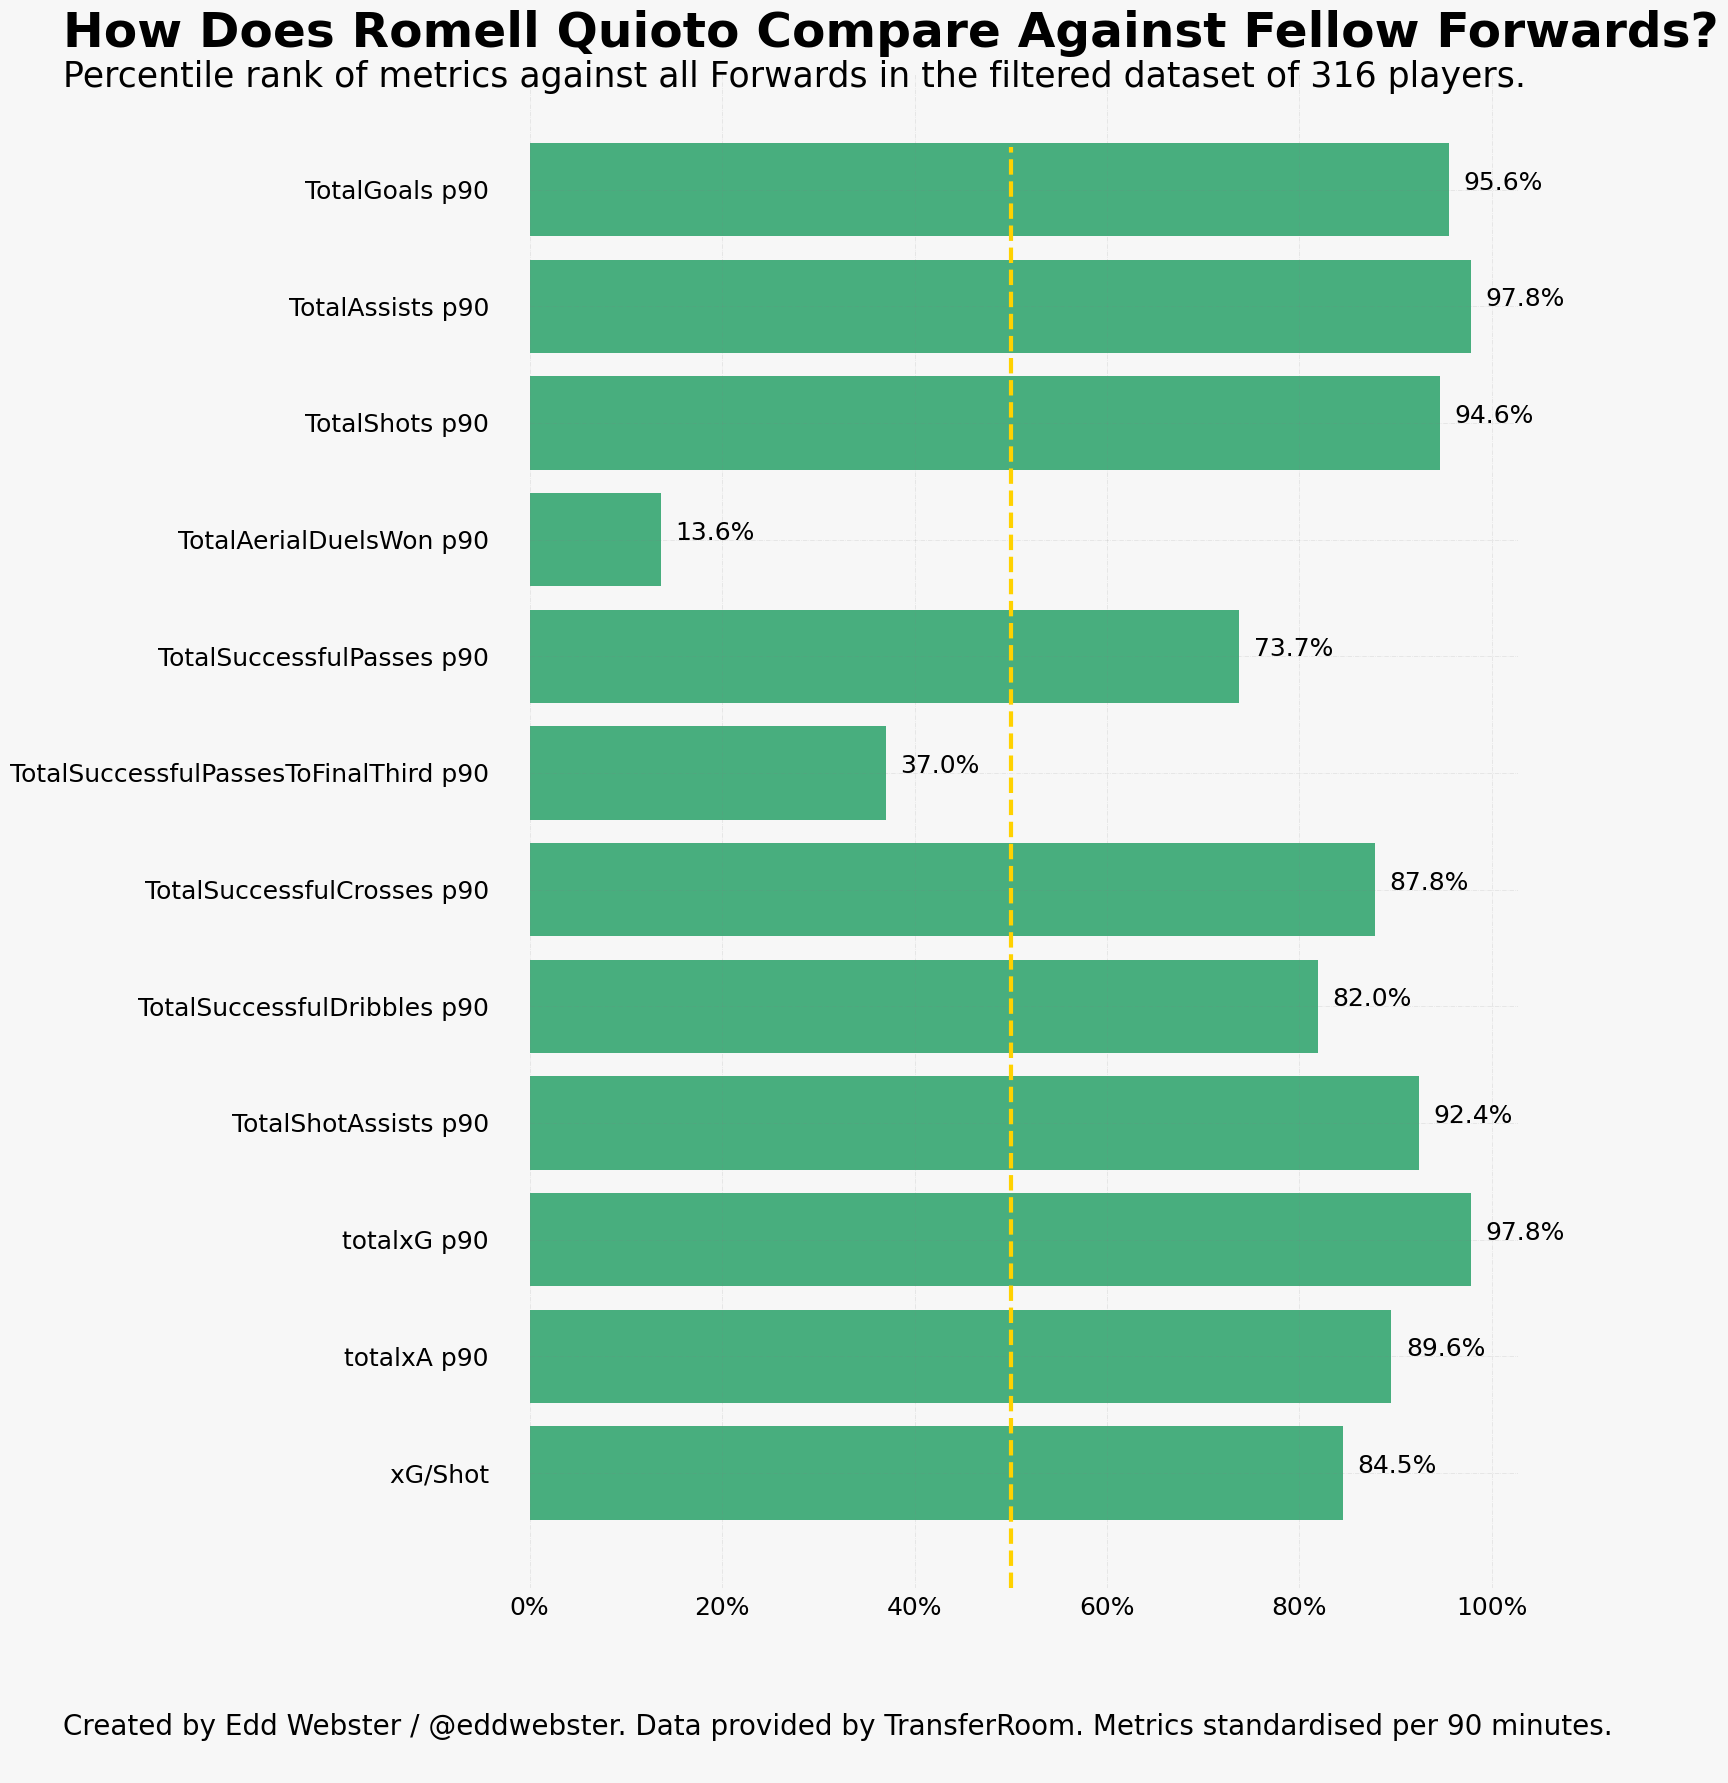

In [97]:
create_pr_bar_chart(df=df_players_fw_age_budget_tp,
                    player_name='Romell Quioto',
                    player_colour='#0d9655',
                    position='Forward',
                    total_players=316
                   )

##### Analysis
*    
*    
*    

<a id='section5.1.4.3'></a>

##### <a id='#section5.2.4.3'>5.2.4.3. Michael McKenna</a>

##### Player data

In [98]:
create_player_df(df=df_players_fw_age_budget_tp,
                 player_name='Michael McKenna',
                )

playerid        ShortName  age nationality        first_position  \
18851    284373  Michael McKenna   30    Scotland  Attacking Midfielder   

      second_position preferred_foot  expected_transfer_cost_euros  \
18851         Forward          right                             0   

       est_weekly_wages_euro parent_squad current_squad  \
18851                    NaN  Arbroath FC   Arbroath FC   

       recent_mins_played_percentage     season  StartDate    EndDate  \
18851                       0.959829  2021/2022 2021-07-31 2022-04-30   

        competition   country  TotalMinutesOnField  TotalGoals  TotalAssists  \
18851  Championship  Scotland                 1594          12             2   

       TotalShots  totalheadshots  TotalDuels  TotalDuelsWon  \
18851          35               5         453            174   

       TotalDefensiveDuels  TotalDefensiveDuelsWon  TotalAerialDuels  \
18851                   94                      51               109   

       TotalAerialDuelsWon  TotalPasses  TotalSuccessfulPasses  \
18851                   40          598                    450   

       TotalPassesToFinalThird  TotalSuccessfulPassesToFinalThird  \
18851                       94                                 64   

       TotalCrosses  TotalSuccessfulCrosses  TotalDribbles  \
18851            47                      17             48   

       TotalSuccessfulDribbles  TotalInterceptions  TotalShotAssists  \
18851                       29                  41                41   

       TotalRecoveries  TotalOpponentHalfRecoveries  totalxG  totalxA  \
18851              103                           65     6.63     4.11   

       expected_transfer_cost_usd  est_weekly_wages_usd  \
18851                         0.0                   NaN   

       expected_transfer_cost_gbp  est_weekly_wages_gbp  TotalGoals_p90  \
18851                         0.0                   NaN           0.678   

       TotalAssists_p90  TotalShots_p90  totalheadshots_p90  TotalDuels_p90  \
18851             0.113           1.976               0.282          25.577   

       TotalDuelsWon_p90  TotalDefensiveDuels_p90  TotalDefensiveDuelsWon_p90  \
18851              9.824                    5.307                        2.88   

       TotalAerialDuels_p90  TotalAerialDuelsWon_p90  TotalPasses_p90  \
18851                 6.154                    2.258           33.764   

       TotalSuccessfulPasses_p90  TotalPassesToFinalThird_p90  \
18851                     25.408                        5.307   

       TotalSuccessfulPassesToFinalThird_p90  TotalCrosses_p90  \
18851                                  3.614             2.654   

       TotalSuccessfulCrosses_p90  TotalDribbles_p90  \
18851                        0.96               2.71   

       TotalSuccessfulDribbles_p90  TotalInterceptions_p90  \
18851                        1.637                   2.315   

       TotalShotAssists_p90  TotalRecoveries_p90  \
18851                 2.315                5.816   

       TotalOpponentHalfRecoveries_p90  totalxG_p90  totalxA_p90  \
18851                             3.67        0.374        0.232   

       expected_transfer_cost_gbp_pm  est_weekly_wages_gbp_pm  \
18851                            0.0                      0.0   

       monthly_loan_budget_gbp   xG/Shot  TotalGoals_p90_pr  \
18851                      0.0  0.189429            0.96519   

       TotalAssists_p90_pr  TotalShots_p90_pr  TotalAerialDuelsWon_p90_pr  \
18851              0.65981           0.490506                    0.601266   

       TotalSuccessfulPasses_p90_pr  TotalSuccessfulPassesToFinalThird_p90_pr  \
18851                      0.952532                                  0.756329   

       TotalSuccessfulCrosses_p90_pr  TotalSuccessfulDribbles_p90_pr  \
18851                       0.962025                             0.5   

       TotalShotAssists_p90_pr  totalxG_p90_pr  totalxA_p90_pr  xG/Shot_pr  \
18851                      1.0        0.723

*    **Name**: Michael McKenna
*    **Age**: 30
*    **First Position**: Attacking Midfielder
*    **Second Position**: Forward
*    **Team**: Arbroath FC
*    **League**: Scottish Championship
*    **Nationality**: Scottish
*    **Preferred Foot**: Right
*    **Minutes Played**: 1,594 (96.0% of total minutes available)
*    **Expected Transfer Cost**: $0M

*    **Estimated Weekly Wages**: NaN

##### Radar

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


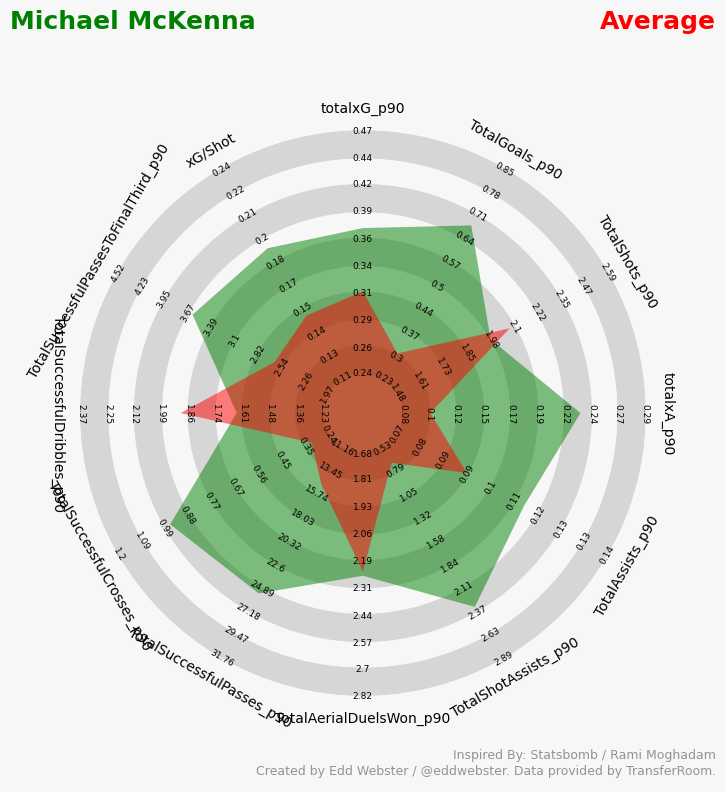

In [99]:
lst_metrics_forward = ['totalxG_p90',
                       'TotalGoals_p90',
                       'TotalShots_p90',
                       'totalxA_p90',
                       'TotalAssists_p90',
                       'TotalShotAssists_p90',
                       'TotalAerialDuelsWon_p90',
                       'TotalSuccessfulPasses_p90',
                       'TotalSuccessfulCrosses_p90',
                       'TotalSuccessfulDribbles_p90',
                       'TotalSuccessfulPassesToFinalThird_p90',
                       'xG/Shot'
                      ]

# Create a radar using the custom 'create_2p_radar' function (defined at start of notebook)
create_2p_radar(df=df_players_fw_age_budget_tp,
                lst_metrics=lst_metrics_forward,
                player_name='Michael McKenna',
                player_colour='green',
                player_average_name='Average',
                player_average_colour='red'
               )

##### Percentile Rank bar chart

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator


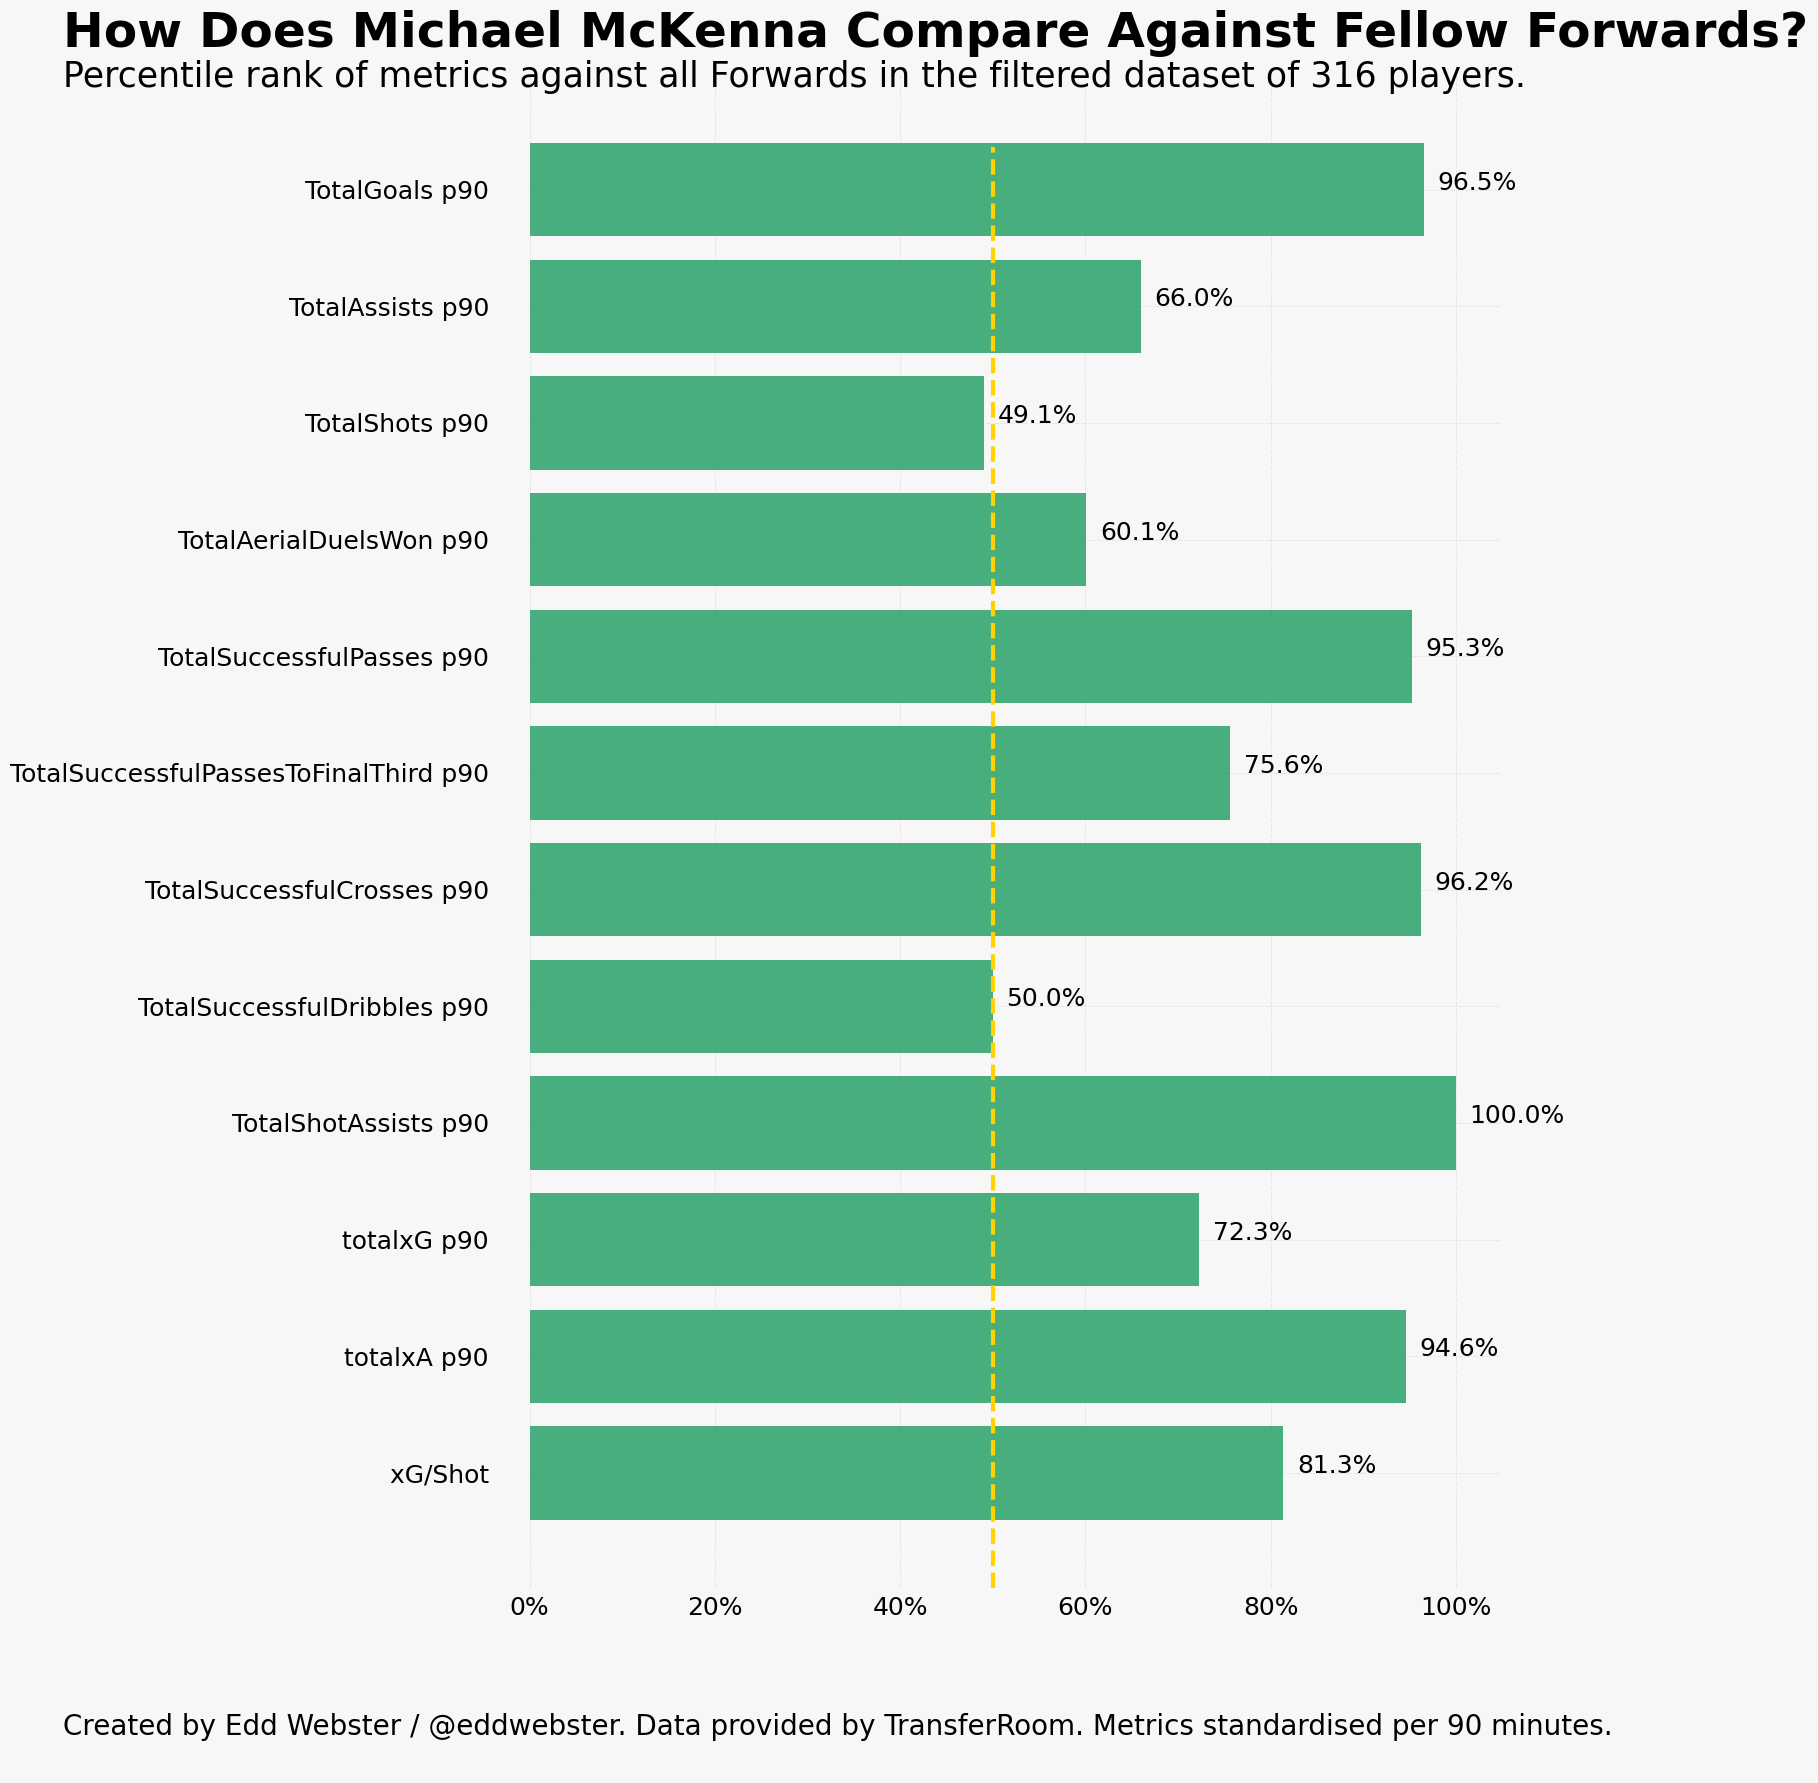

In [100]:
create_pr_bar_chart(df=df_players_fw_age_budget_tp,
                    player_name='Michael McKenna',
                    player_colour='#0d9655',
                    position='Forward',
                    total_players=316
                   )

##### Analysis
*    
*    
*    

<a id='section5.2.5'></a>

#### <a id='#section5.2.5'>5.2.5. Shortlisted Players</a>

The resulting filtration of players produces a three man shortlist:
1.    Aleksandar Simcevic [[TransferMarkt](https://www.transfermarkt.co.uk/jort-van-der-sande/profil/spieler/330909)] [[FotMob](https://www.fotmob.com/players/561826/jort-van-der-sande)]
2.    Morgan Guilavogui [[TransferMarkt](https://www.transfermarkt.co.uk/morgan-guilavogui/profil/spieler/691786)] [[FotMob](https://www.fotmob.com/players/1092680/morgan-guilavogui)]
3.     Michael McKenna [[TransferMarkt](https://www.transfermarkt.co.uk/michael-mckenna/profil/spieler/150848)] [[FotMob](https://www.fotmob.com/players/564536/michael-mckenna)]

---

<a id='section6'></a>

## <a id='#section6'>6. Export Final Dataset</a>
Final dataset made available for future analysis and external analysis such as Tableau visualisation:

In [101]:
# Export final dataset
#df_players.to_csv(os.path.join(data_dir_export, 'transferroom_players.csv'), index=None, header=True)


---

<a id='section7'></a>

## <a id='#section7'>7. Summary</a>
This notebook analyses a dataset ....

The outcome of this analysis was to identify the following three candidates that produce similar data points to Gerard Piqué, whilst also meeting age, playing time, and budget requirements.
1.    
2.    
3.    

Of the three players shortlisted, ... is the one player recommended due to his performance metrics and viability, as well as meeting the age and playing time requirements.

---

<a id='section8'></a>

## <a id='#section8'>8. Next Steps</a>
Suggested next steps for this analysis with more time and data include:
Video analysis. Work with the performance analysts to compare what is seen in the data with the footage. 
*    Video analysis. Work with the performance analysts to compare what is seen in the data with the footage.
*    Implement more, nuanced metrics such as Expected Threat (xT) and Completed Passes Greater than Expected.

---

<a id='section9'></a>

## <a id='#section9'>9. References</a>

#### Data Visualisation
*    soccerplots Python package by [Anmol Durgapal](https://twitter.com/slothfulwave612): [github.com/Slothfulwave612/soccerplots](https://github.com/Slothfulwave612/soccerplots).

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)